<h1 align='center'> <font color='Green'><font size=6.8> 🚸🎓Jamboree - Business CaseStudy🎓🚸 </font> </font></h1>
<h1 align='center'><font color='gold'><font size=6>Linear Regression - Machine Learning </font> </font></h1>
<h2 align='right'>Analysed by : <font color='green'><b> KASI</b></font></h2>


<kbd>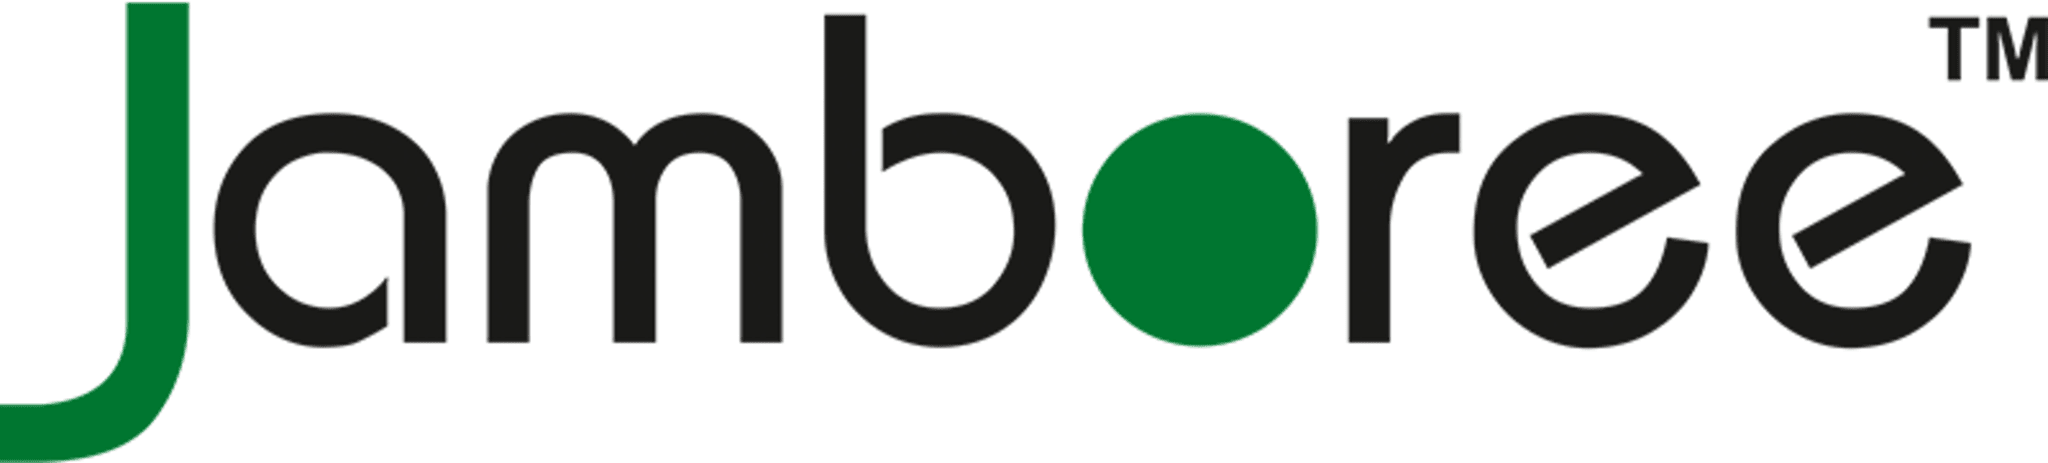</kbd>

## 🔹ABOUT:

* Jamboree is a renowned educational institution that has successfully assisted numerous students in gaining admission to top colleges abroad. With their proven problem-solving methods, they have helped students achieve exceptional scores on exams like GMAT, GRE, and SAT with minimal effort.

* To further support students, Jamboree has recently introduced a new feature on their website. This feature enables students to assess their probability of admission to Ivy League colleges, considering the unique perspective of Indian applicants.

* By conducting a thorough analysis, we can assist Jamboree in understanding the crucial factors impacting graduate admissions and their interrelationships. Additionally, we can provide predictive insights to determine an individual's admission chances based on various variables.


## 🔹Why this Case study?

* Solving this business case holds immense importance for aspiring data scientists and ML engineers.

* Building predictive models using machine learning is widely popular among the data scientists/ML engineers. By working through this case study, individuals gain hands-on experience and practical skills in the field.

* Additionally, it will enhance one's ability to communicate with the stakeholders involved in data-related projects and help the organization take better, data-driven decisions.


### 🤞Work that has to be done:

> As a data scientist/ML engineer hired by Jamboree, your primary objective is toanalyze the given dataset and derive valuable insights from it. Additionally, utilize the dataset to construct a predictive model capable of estimating an applicant's likelihood of admission based on the available features.

----

### 📃 Features of the dataset:

> Column Profiling:

| Feature | Description |
|:--------|:------------|
|Serial No.| This column represents the unique row identifier for each applicant in the dataset.|
|GRE Scores| This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.|
|TOEFL Scores| This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.|
|University Rating| This column indicates the rating or reputation of the university that the applicants are associated with , & The rating is based on a scale of 0 to 5, with 5 representing the highest rating.|
|SOP|This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.|
|LOR| This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.|
|CGPA| This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.|
|Research| This column indicates whether the applicant has research experience (1) or not (0).|
|Chance of Admit| This column represents the estimated probability or chance of admission for each applicant, ranging from 0 to 1.|


These columns provide relevant information about the applicants' academic qualifications, testscores, university ratings, and other factors that may influence their chances of admission.


In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler , MinMaxScaler , PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE

from scipy import stats 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import statsmodels.stats.api as sms

import warnings
warnings.filterwarnings('ignore')

In [3]:
jm_data = pd.read_csv('Jamboree_Admission.csv')
df = jm_data.copy()
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### 🧐**Exploration of data :**

In [4]:
df = df.rename(columns={'Chance of Admit ': 'Chance_of_Admit'})

In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


----
### 📝 Statistical Summary

In [7]:
df.cov()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,20875.000000,-169.458918,-124.511022,-11.175351,-19.666333,-0.493988,-6.491703,-0.382766,0.173437
GRE Score,-169.458918,127.580377,56.825026,8.206605,6.867206,5.484521,5.641944,3.162004,1.291862
TOEFL Score,-124.511022,56.825026,36.989114,4.519150,3.883960,3.048168,2.981607,1.411303,0.680046
University Rating,-11.175351,8.206605,4.519150,1.307619,0.825014,0.644112,0.487761,0.242645,0.111384
SOP,-19.666333,6.867206,3.883960,0.825014,0.982088,0.608701,0.426845,0.200962,0.095691
LOR,-0.493988,5.484521,3.048168,0.644112,0.608701,0.856457,0.356807,0.171303,0.084296
CGPA,-6.491703,5.641944,2.981607,0.487761,0.426845,0.356807,0.365799,0.150655,0.075326
Research,-0.382766,3.162004,1.411303,0.242645,0.200962,0.171303,0.150655,0.246894,0.038282
Chance_of_Admit,0.173437,1.291862,0.680046,0.111384,0.095691,0.084296,0.075326,0.038282,0.019921


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance_of_Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [9]:
df = df.drop(columns='Serial No.')
df.sample()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
173,323,113,4,4.0,4.5,9.23,1,0.89


In [10]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

### 📜📜**Duplicate Detection**

In [11]:
df[df.duplicated()]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit


### 🏷️ Insights

- The dataset does not contain any duplicates.
-----
### 🔸❓**Null Detection**

In [12]:
df.isna().any()

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance_of_Admit      False
dtype: bool

In [13]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

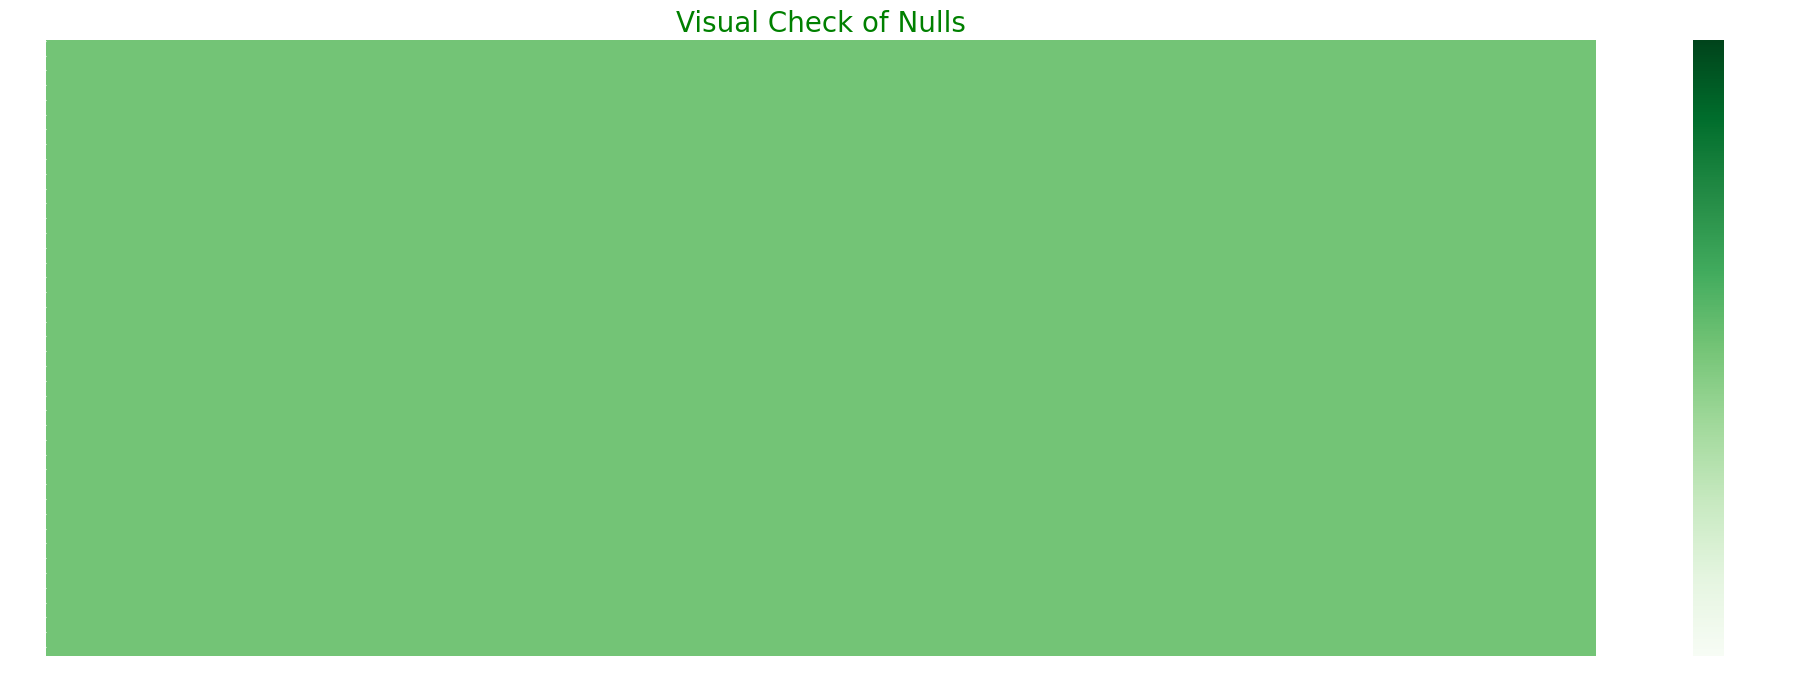

In [14]:
plt.figure(figsize=(25,8))
plt.style.use('dark_background')
sns.heatmap(df.isnull(),cmap='Greens')
plt.title('Visual Check of Nulls',fontsize=20,color='g')
plt.show()

In [15]:
for _ in df.columns:
    print()
    print(f'Total Unique Values in {_} column are :- {df[_].nunique()}')
    print(f'Value counts in {_} column are :-\n {df[_].value_counts(normalize=True)}')
    print()
    print('-'*120)


Total Unique Values in GRE Score column are :- 49
Value counts in GRE Score column are :-
 GRE Score
312    0.048
324    0.046
316    0.036
321    0.034
322    0.034
327    0.034
311    0.032
320    0.032
314    0.032
317    0.030
325    0.030
315    0.026
308    0.026
323    0.026
326    0.024
319    0.024
313    0.024
304    0.024
300    0.024
318    0.024
305    0.022
301    0.022
310    0.022
307    0.020
329    0.020
299    0.020
298    0.020
331    0.018
340    0.018
328    0.018
309    0.018
334    0.016
332    0.016
330    0.016
306    0.014
302    0.014
297    0.012
296    0.010
295    0.010
336    0.010
303    0.010
338    0.008
335    0.008
333    0.008
339    0.006
337    0.004
290    0.004
294    0.004
293    0.002
Name: proportion, dtype: float64

------------------------------------------------------------------------------------------------------------------------

Total Unique Values in TOEFL Score column are :- 29
Value counts in TOEFL Score column are :-
 TOEFL Scor

In [16]:
for _ in df.columns:
    print()
    print(f'Range of {_} column is from {df[_].min()} to {df[_].max()}')
    print()
    print('-'*120)


Range of GRE Score column is from 290 to 340

------------------------------------------------------------------------------------------------------------------------

Range of TOEFL Score column is from 92 to 120

------------------------------------------------------------------------------------------------------------------------

Range of University Rating column is from 1 to 5

------------------------------------------------------------------------------------------------------------------------

Range of SOP column is from 1.0 to 5.0

------------------------------------------------------------------------------------------------------------------------

Range of LOR  column is from 1.0 to 5.0

------------------------------------------------------------------------------------------------------------------------

Range of CGPA column is from 6.8 to 9.92

------------------------------------------------------------------------------------------------------------------------

R

In [17]:
#df['Research'] = df.Research.astype('category')

In [18]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

----

### 📈Graphical Analysis:

In [19]:
cp = 'Greens'

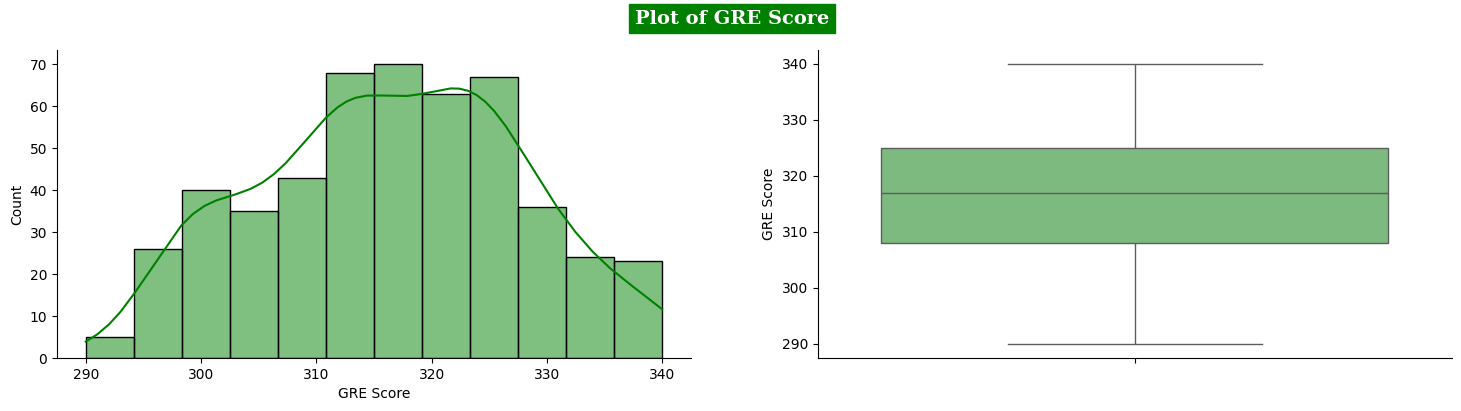

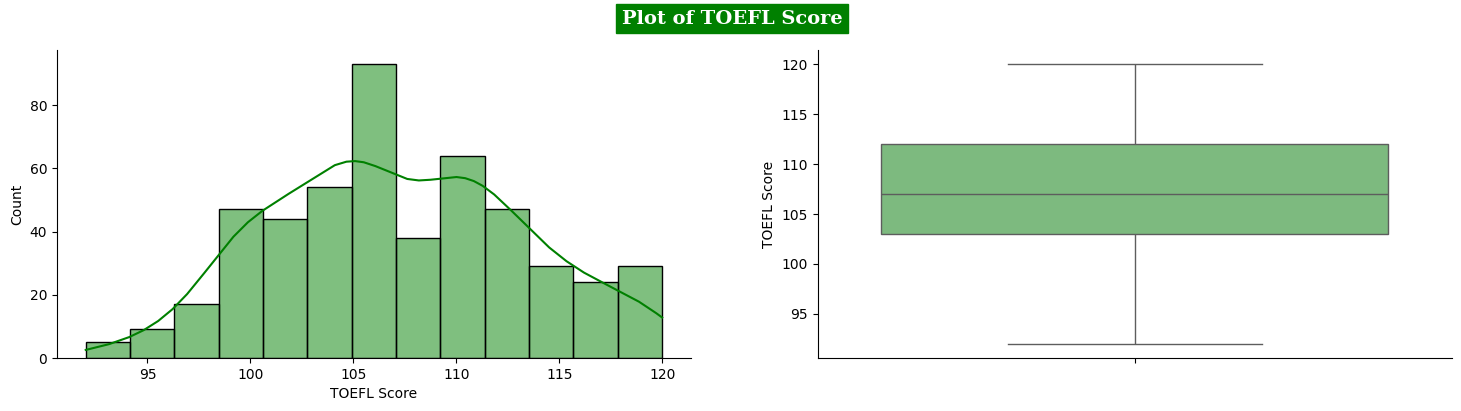

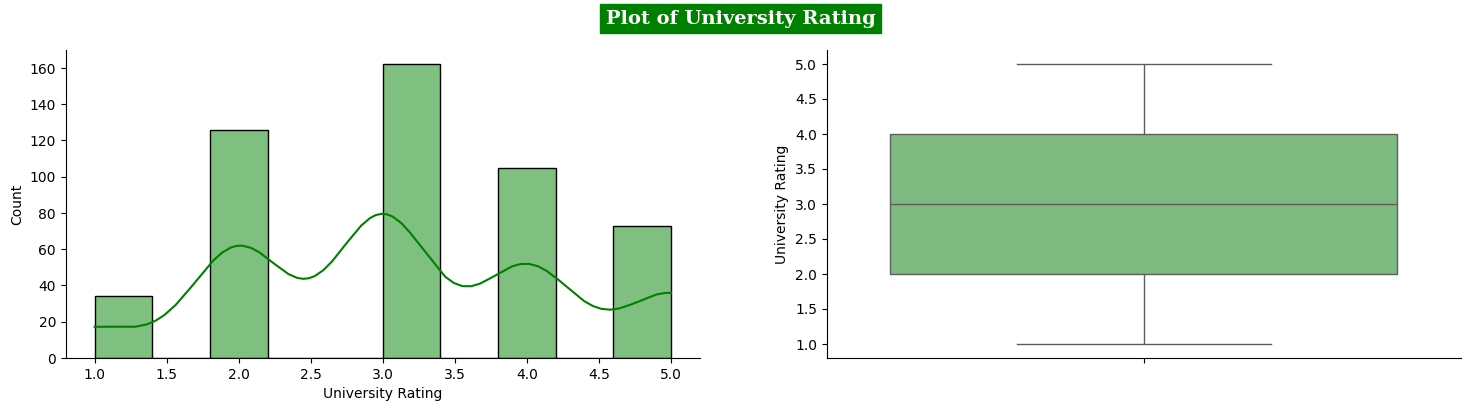

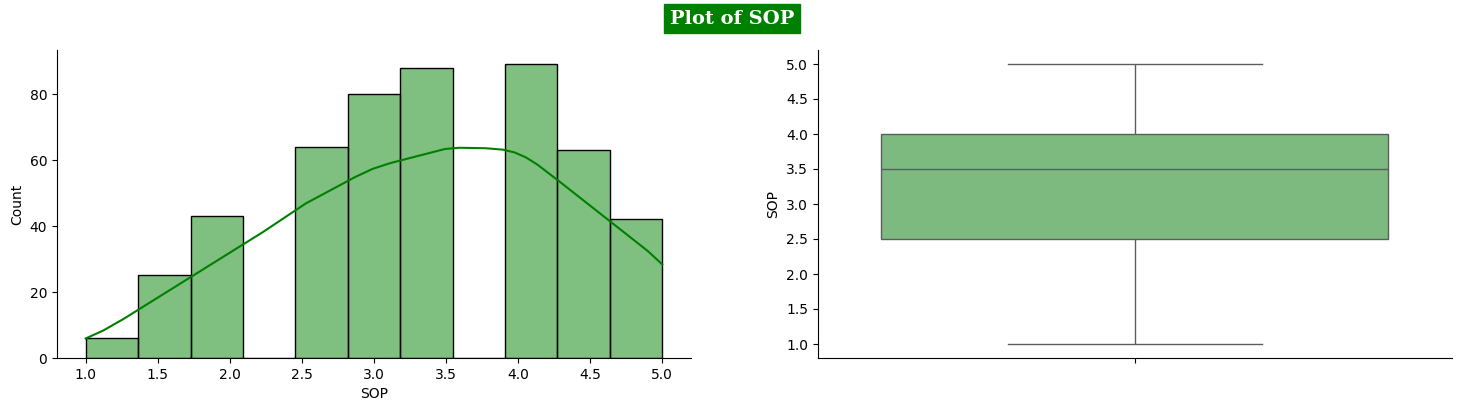

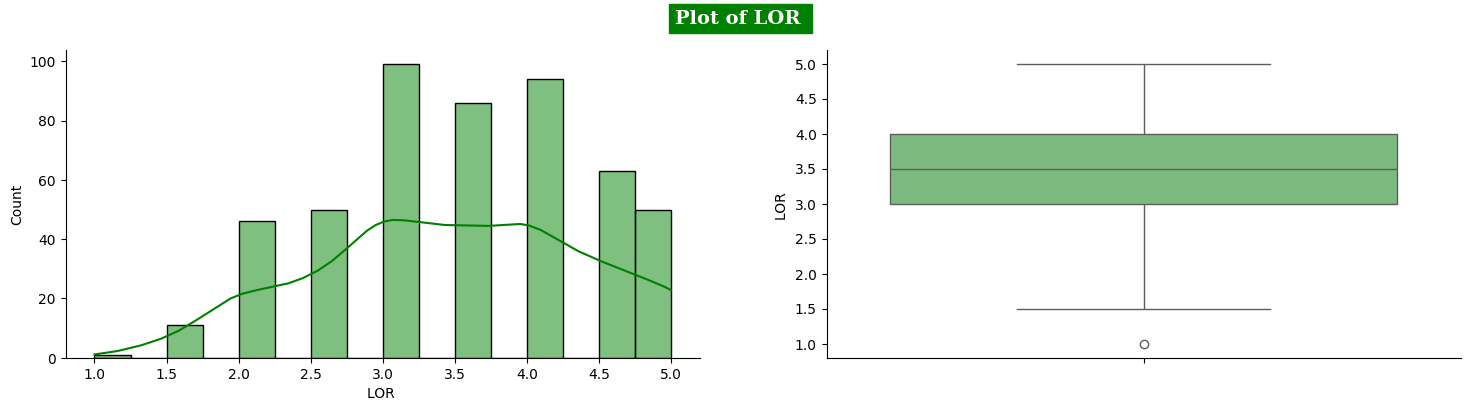

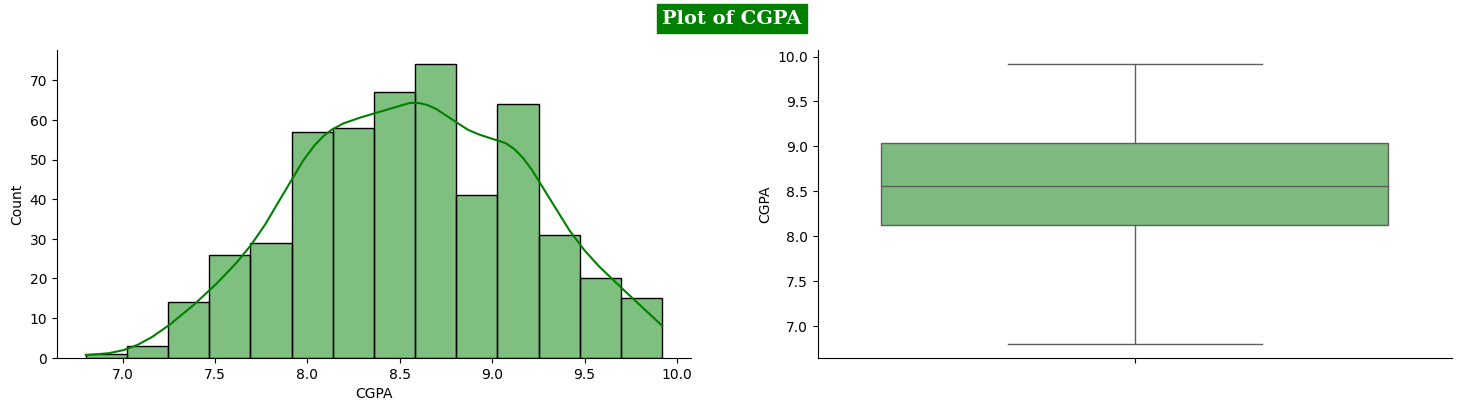

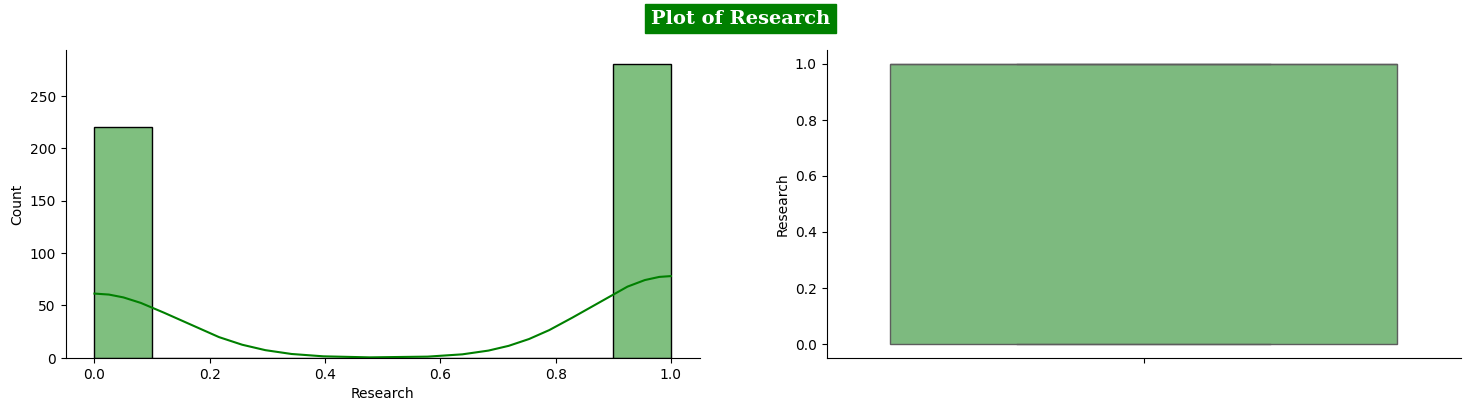

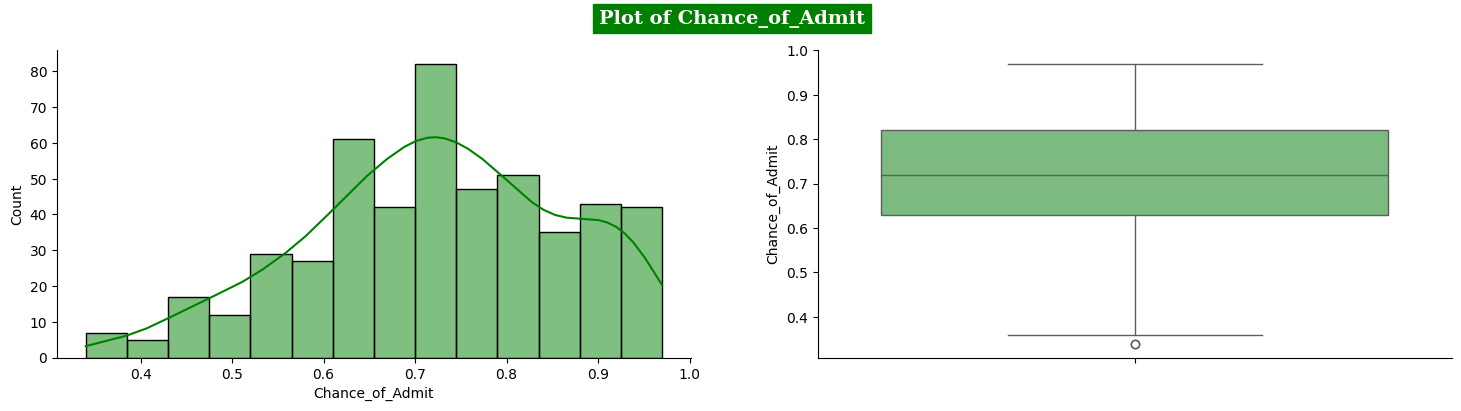

In [20]:
for _ in df.columns:
    plt.style.use('default')
    plt.style.use('fast')
    plt.figure(figsize = (18,4))
    plt.subplot(122)
    sns.boxplot(df[_],palette=cp)
    plt.subplot(121)
    sns.histplot(df[_],kde=True,color='g')
    plt.suptitle(f'Plot of {_}',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    sns.despine()
    plt.show()

#### 🏷️Insights:
    
- Other than LOR there no outliers found in other features. And there is no need for treating LOR as it is one of the ratings given on scale 0-5.

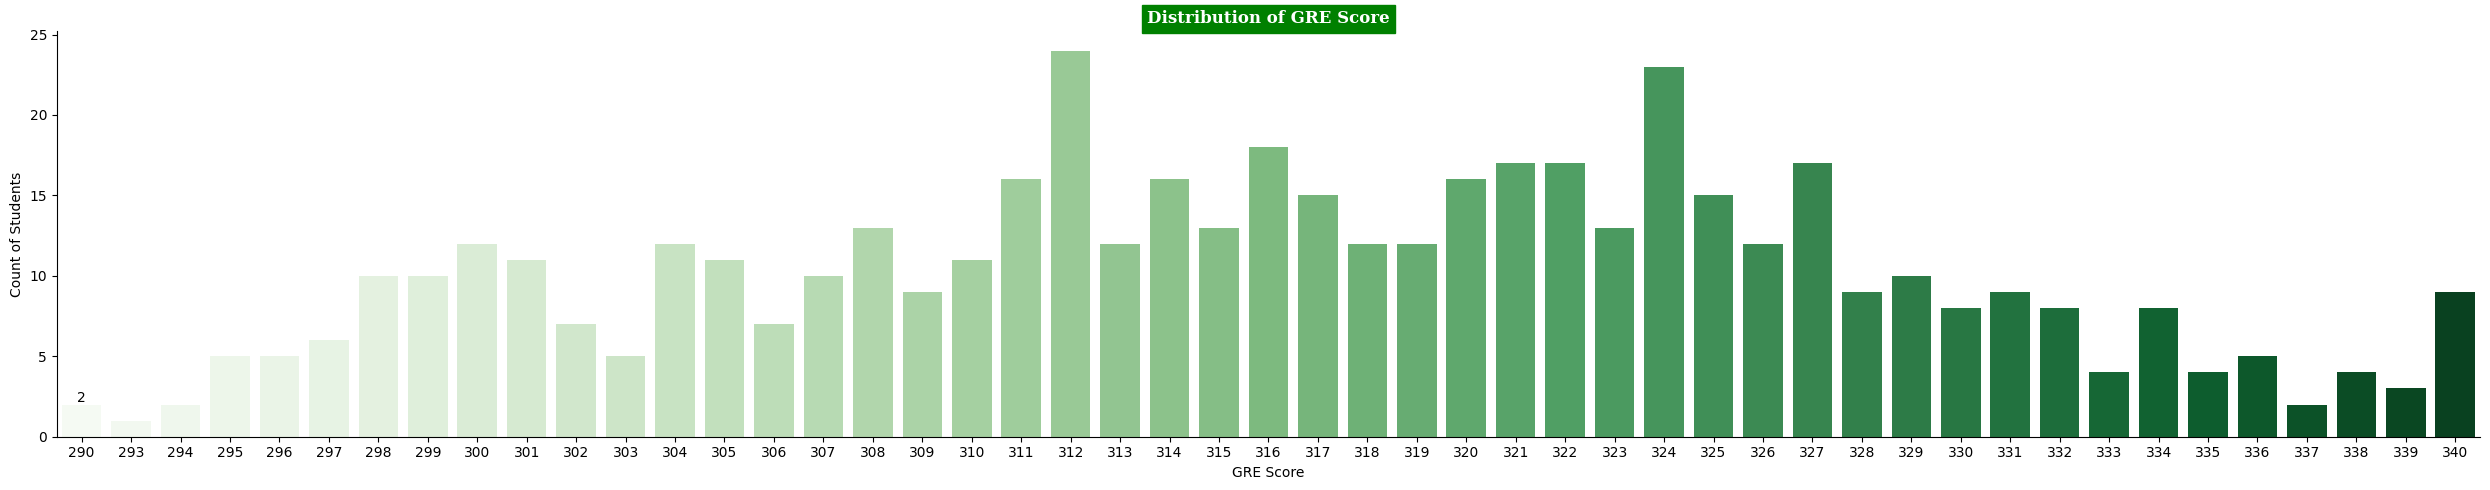

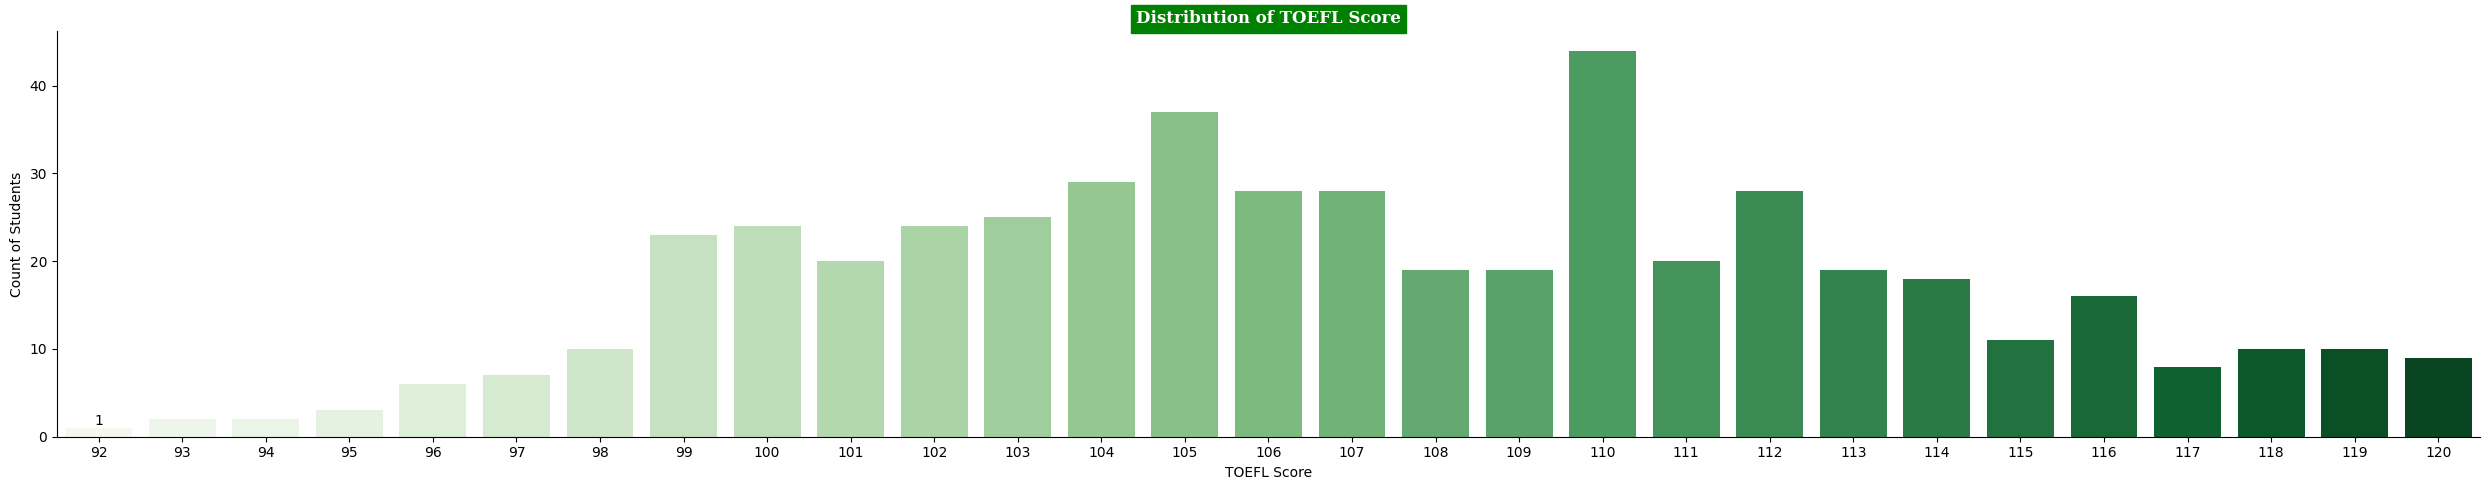

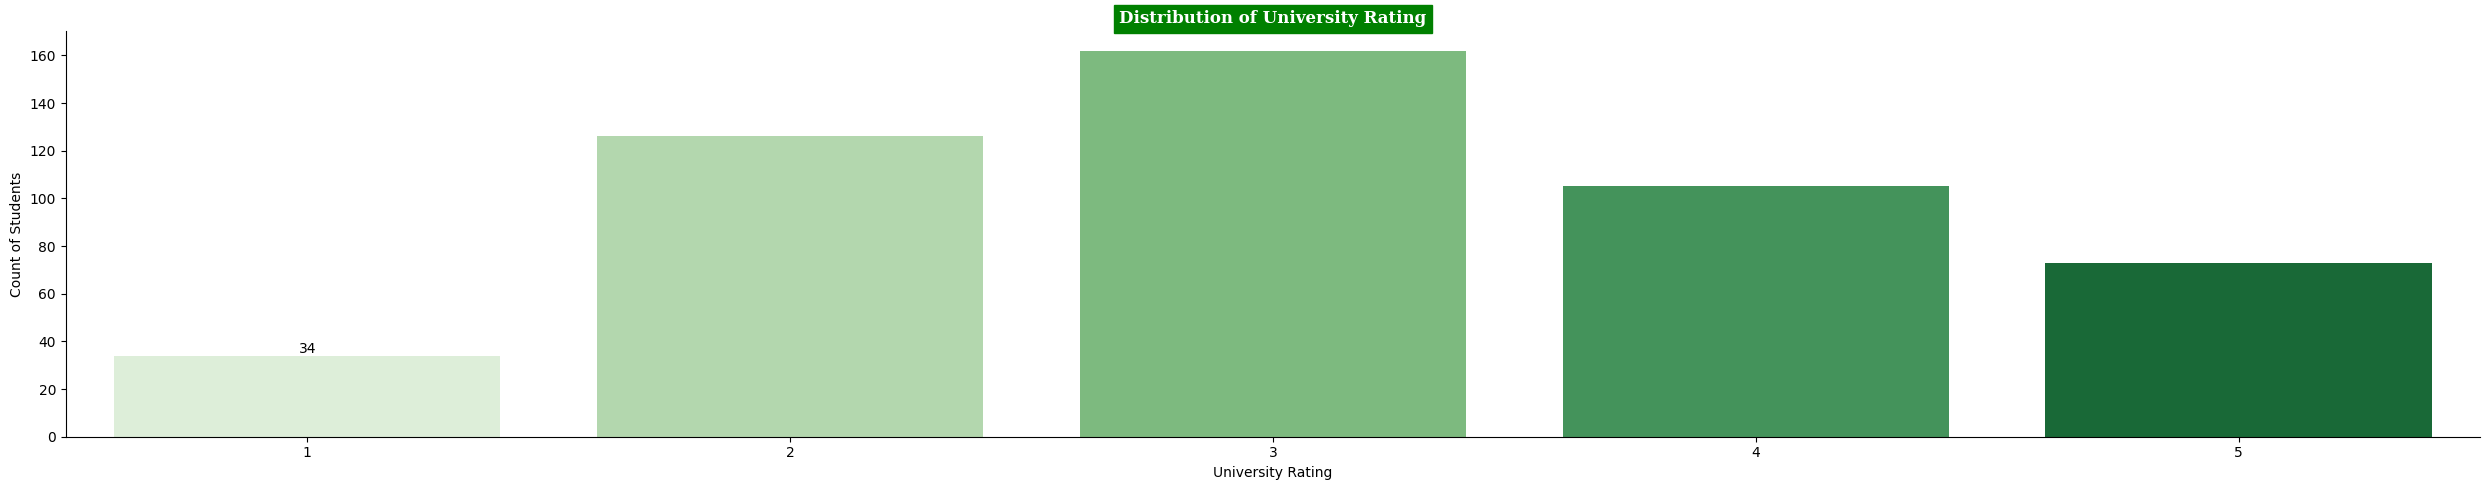

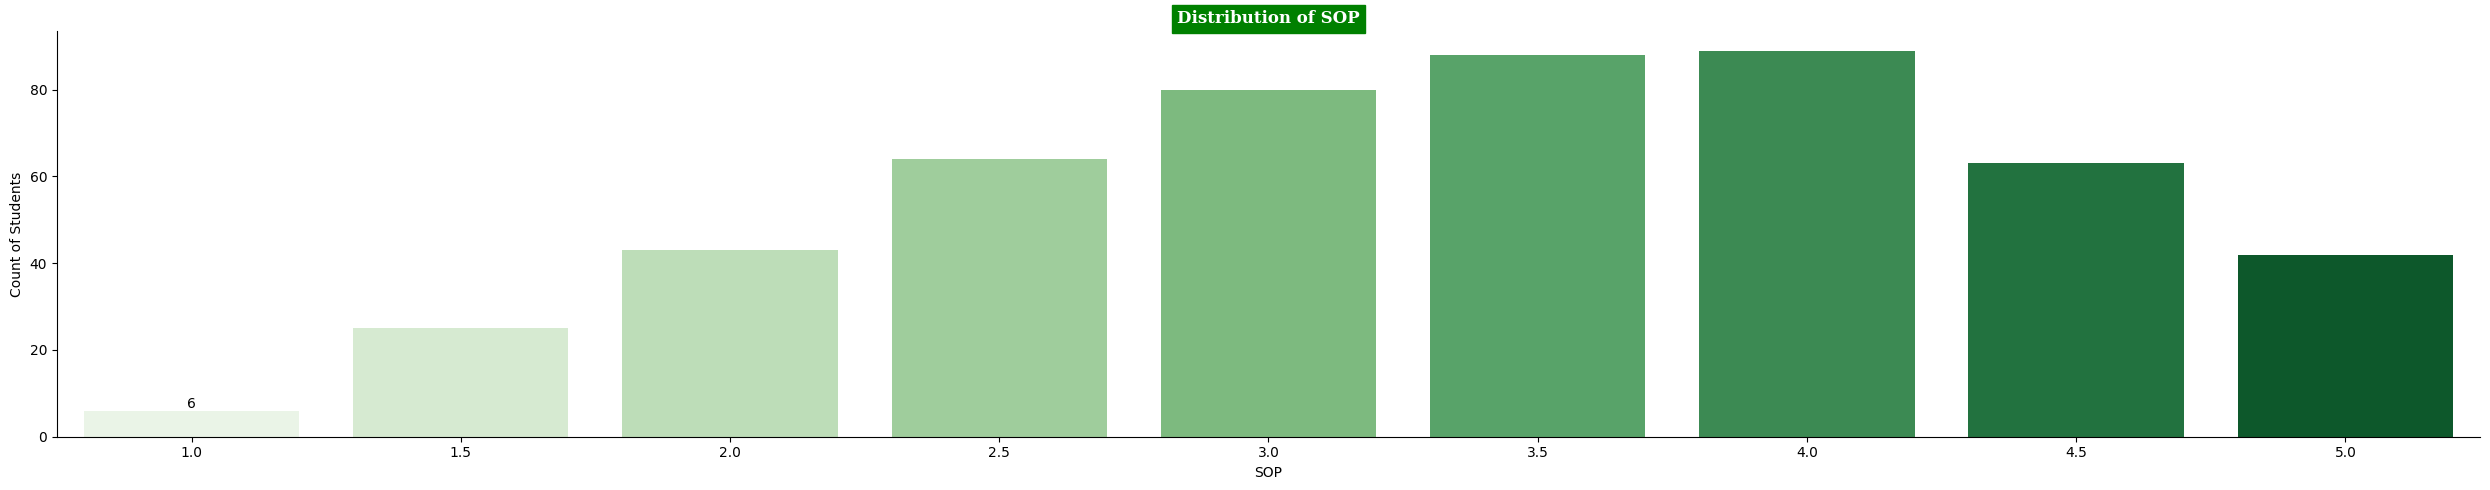

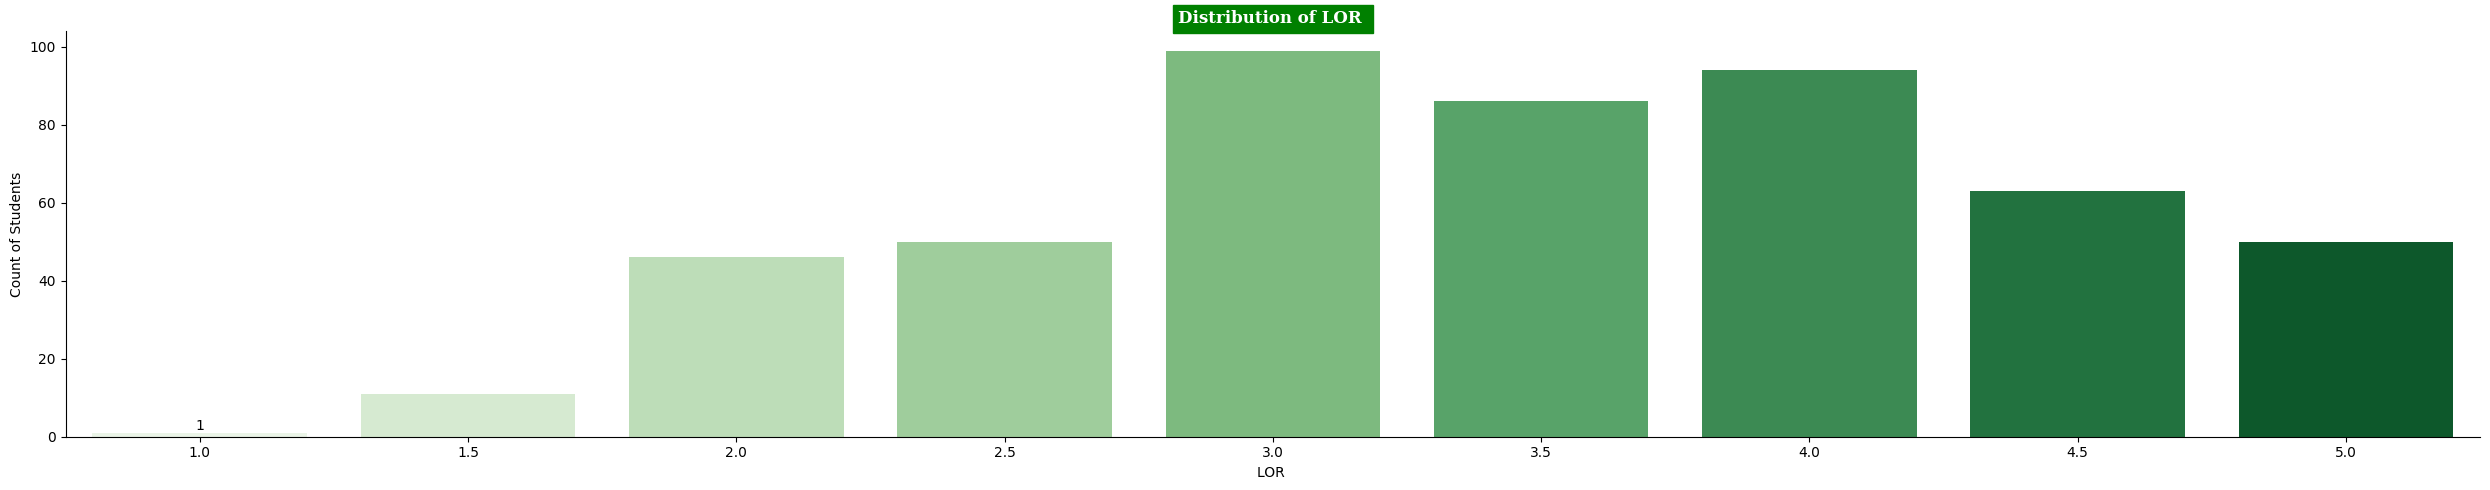

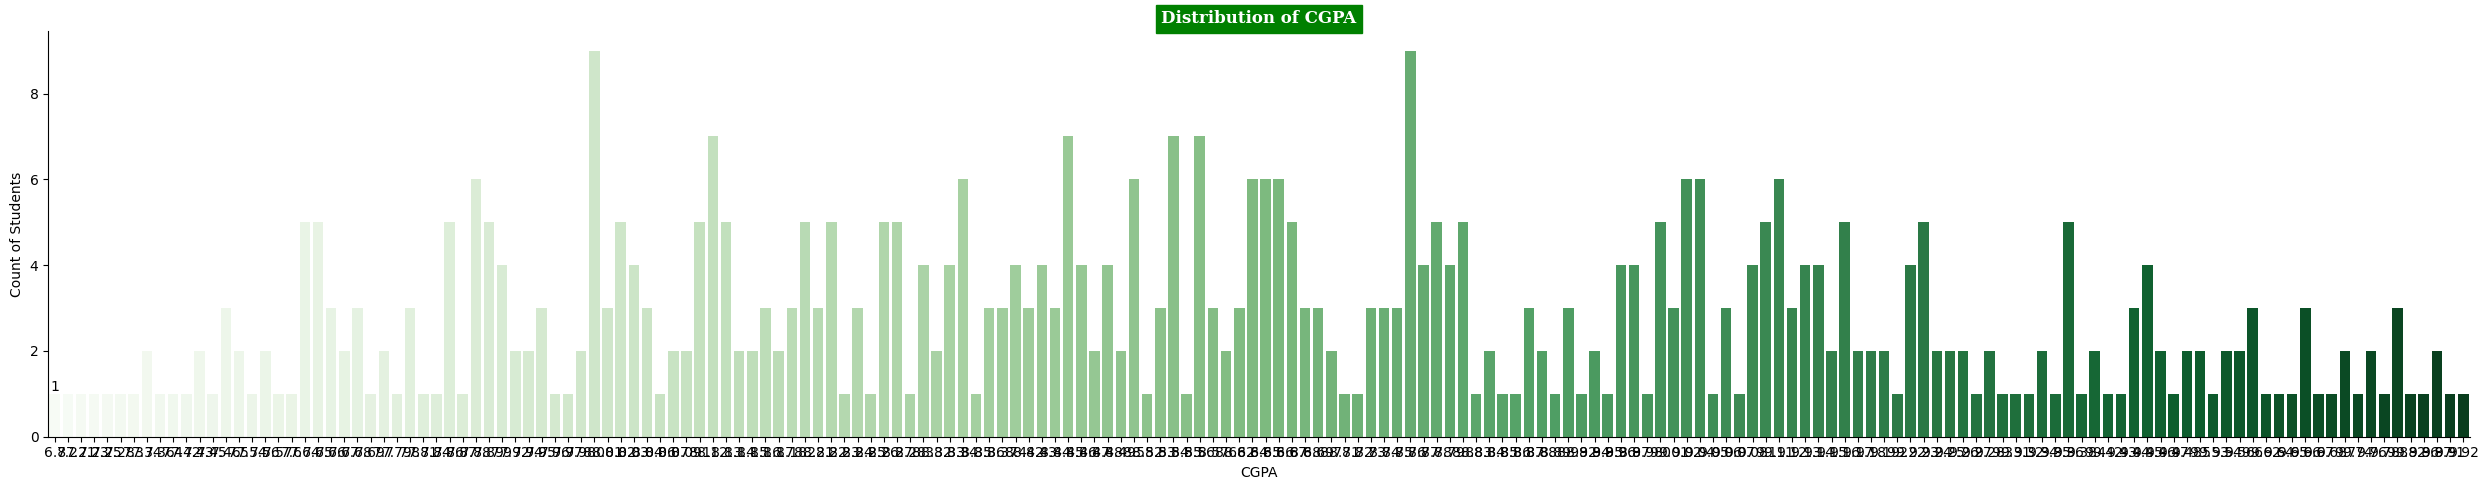

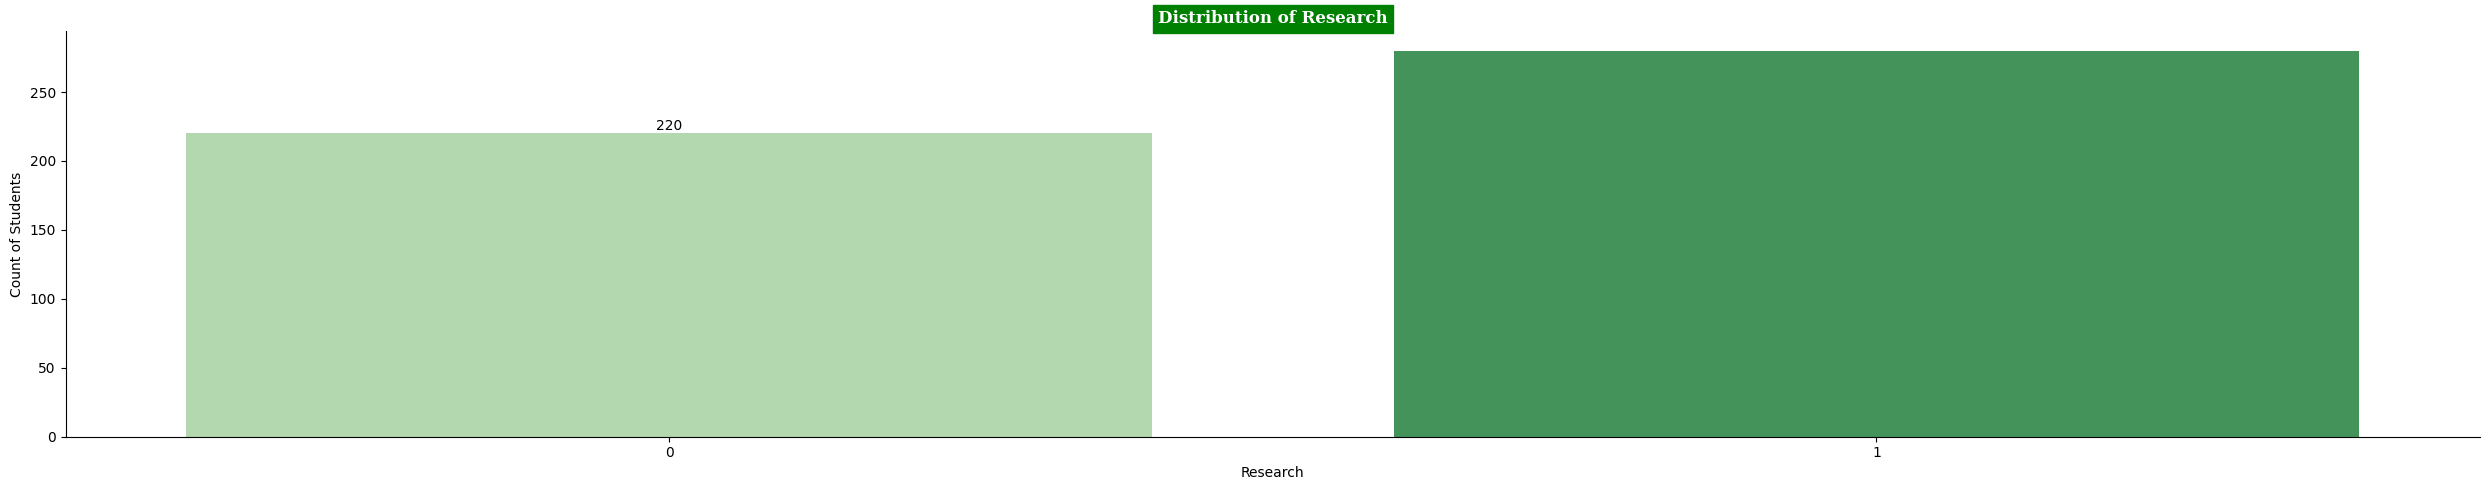

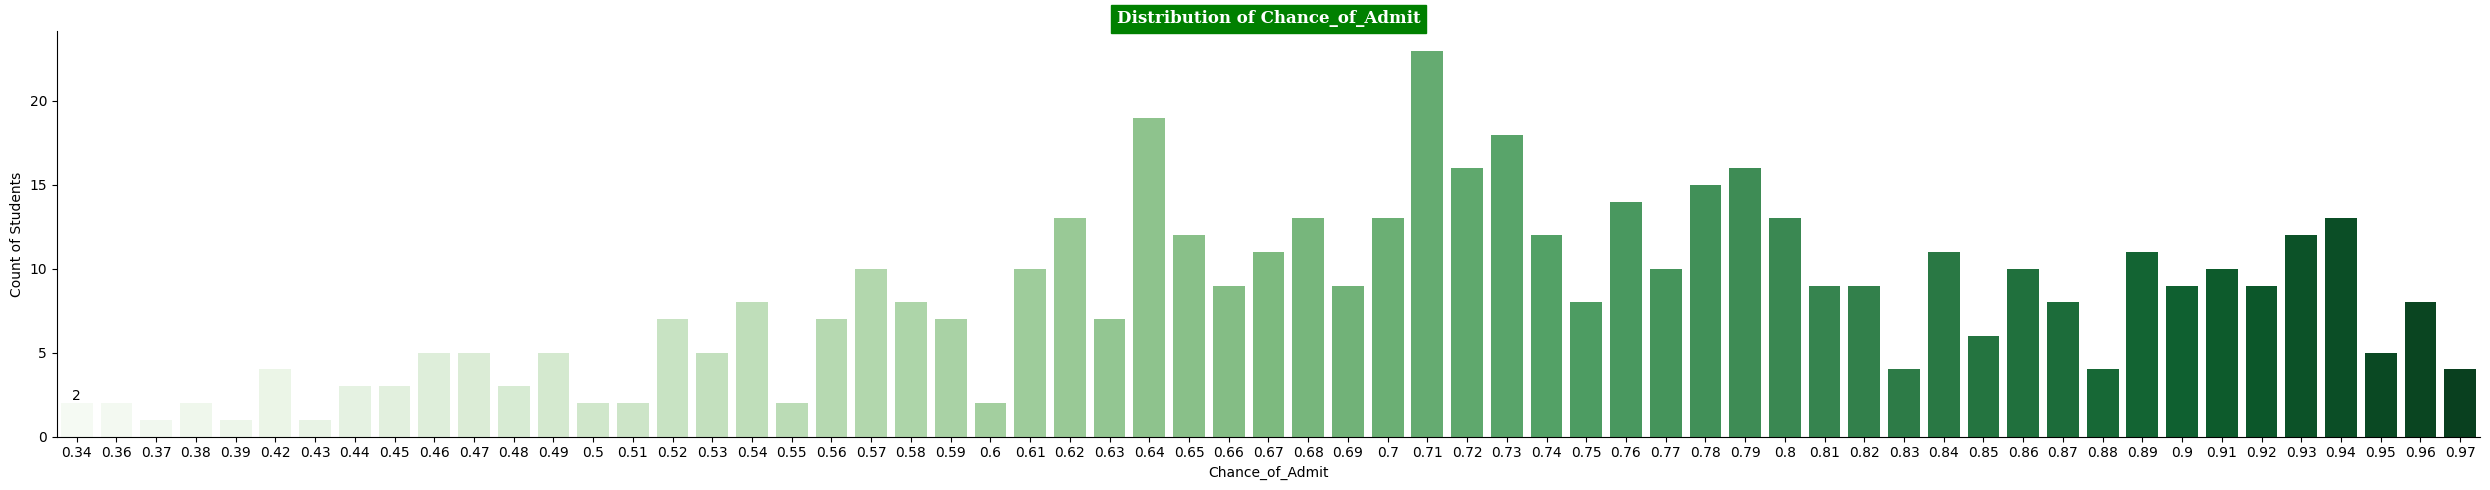

In [21]:
for col in df.columns:
    plt.figure(figsize=(25,5))
    plt.style.use('default')
    plt.style.use('fast')
    b = sns.countplot(x=df[col],palette=cp)
    plt.title(f'Distribution of {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    b.bar_label(b.containers[0], label_type='edge',fmt='%d')
    plt.xlabel(col)
    plt.ylabel('Count of Students')
    plt.tight_layout()
    sns.despine()
    plt.show();

In [22]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

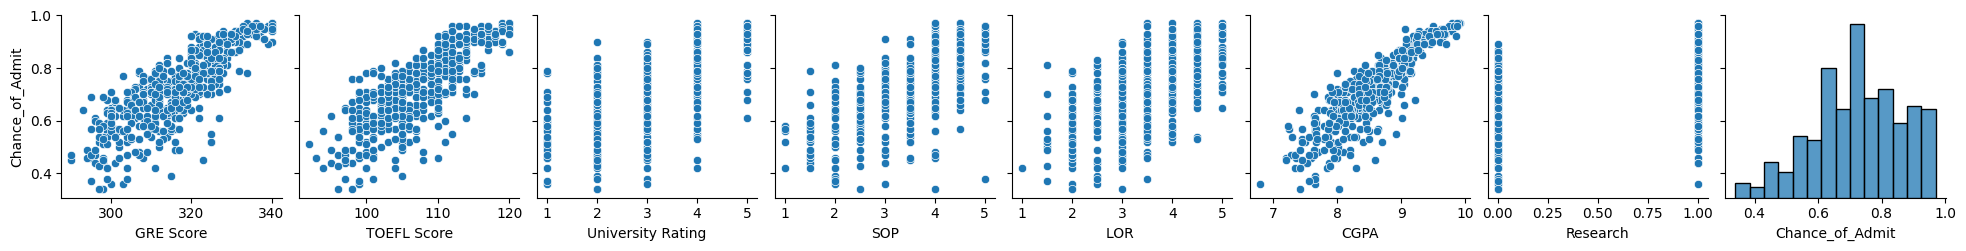

In [23]:
sns.pairplot(data=df, y_vars='Chance_of_Admit')
plt.show()

#### 🏷️Insights:

* Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit
* While university ranking, rating of SOP and LOR also have an impact on chances of admit, research is the only variable which doesn't have much of an impact
* We can see from the scatterplot that the values of university ranking, SOP, LOR and research are not continuous. We can convert these columns to categorical variables

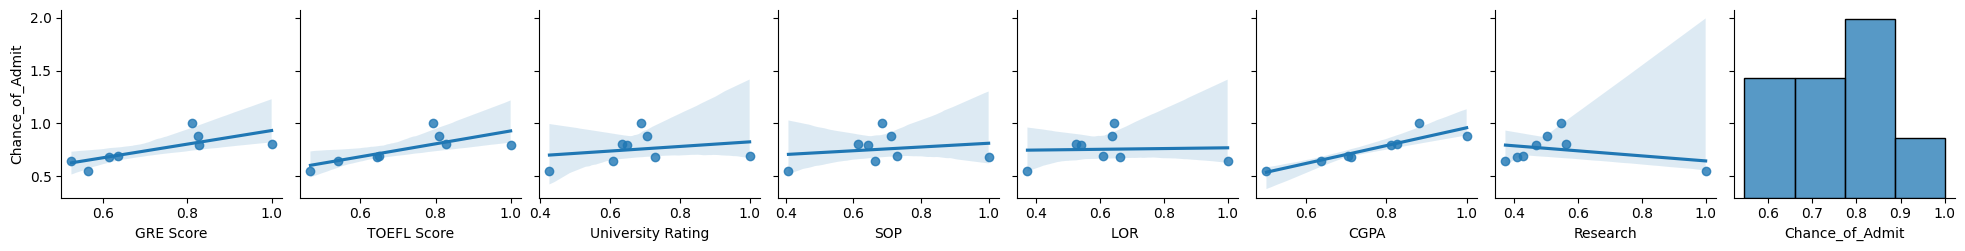

In [24]:
sns.pairplot(df.corr(),y_vars='Chance_of_Admit',kind= 'reg')

In [25]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

GRE Score


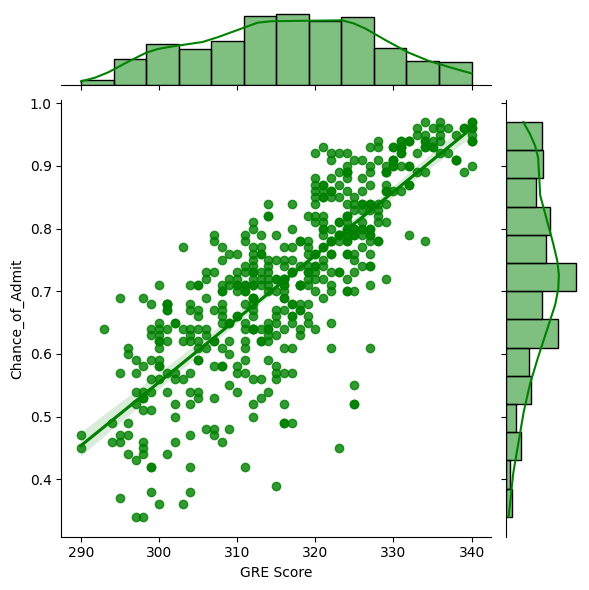

TOEFL Score


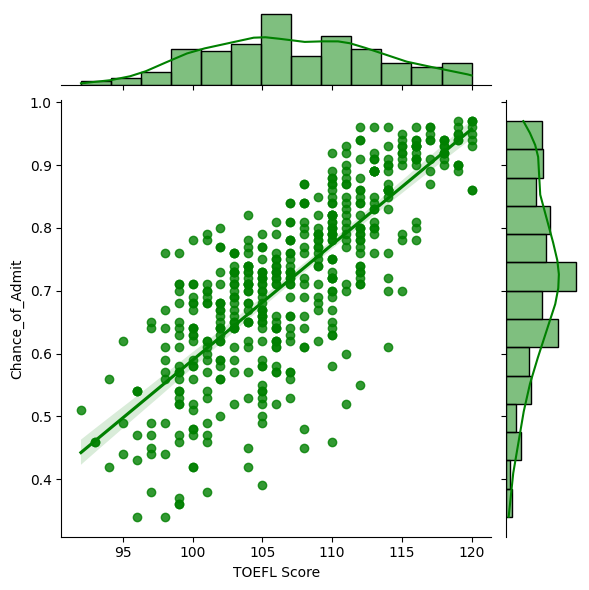

University Rating


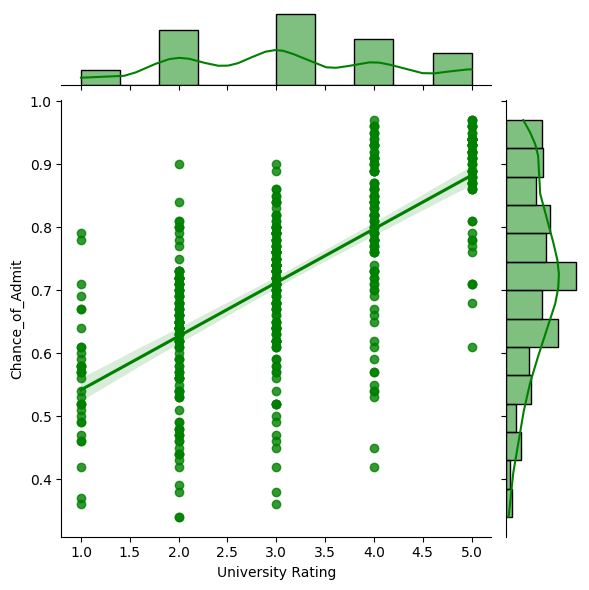

SOP


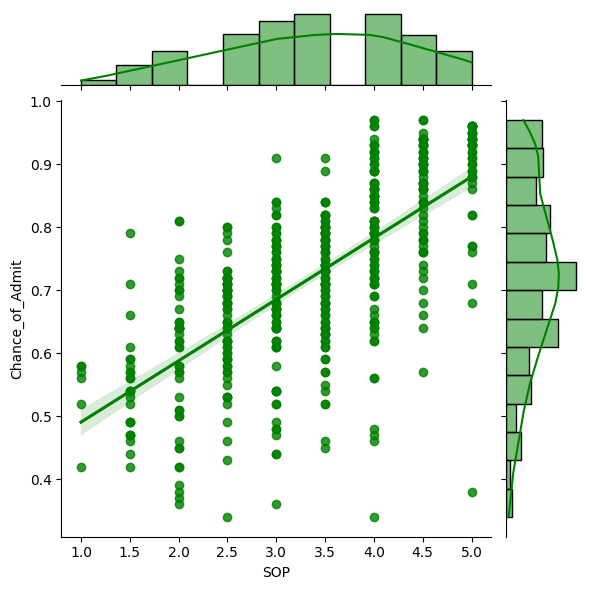

LOR 


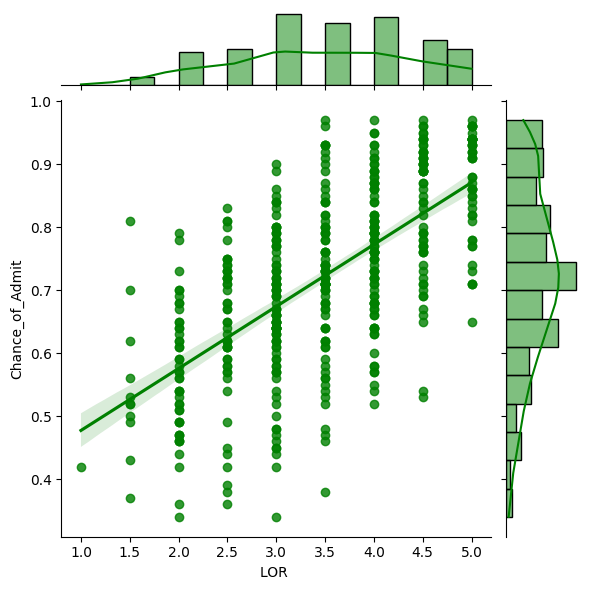

CGPA


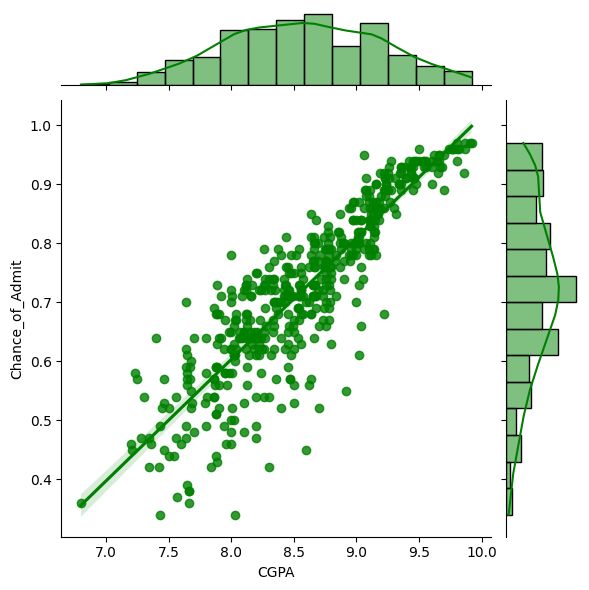

Research


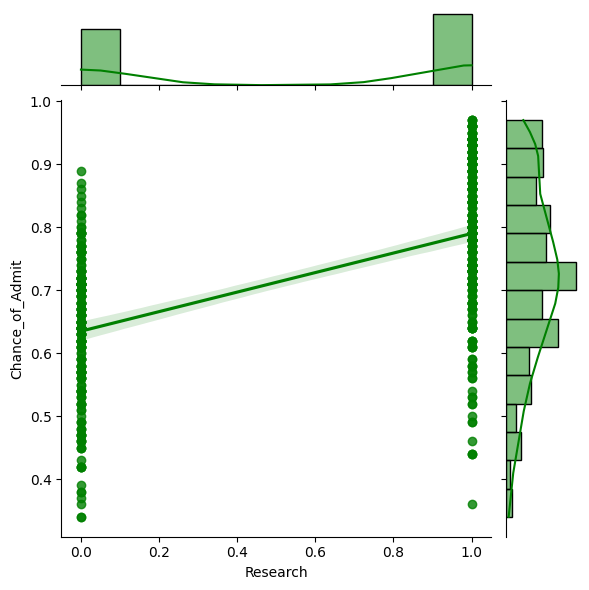

In [26]:
for col in df.columns[:-1]:
    print(col)
    sns.jointplot(data=df,x=df[col],y=df["Chance_of_Admit"],kind="reg",color='g')
    plt.show()

#### 🏷️Insights:

- with higher GRE score , there is high probability of getting an admition.

- Students having high toefl score , has higher probability of getting admition . 

Plotting regression plot for: GRE Score


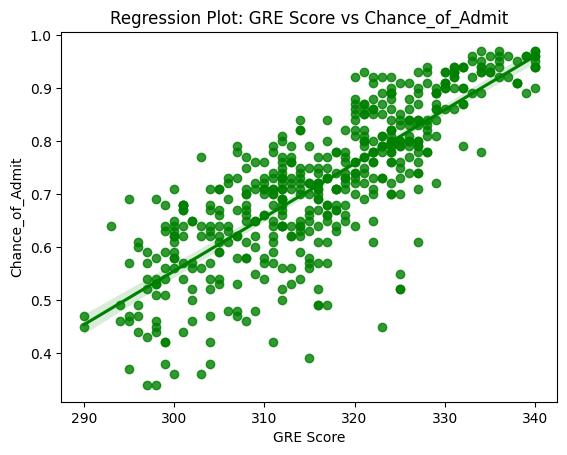

Plotting regression plot for: TOEFL Score


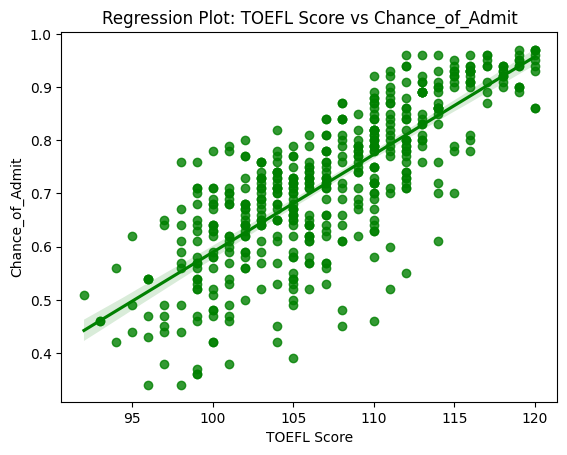

Plotting regression plot for: University Rating


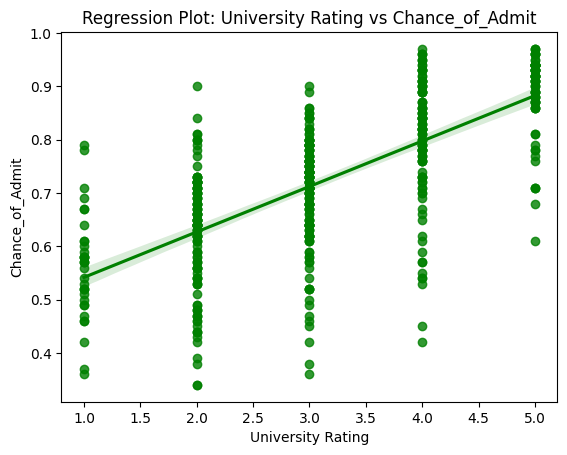

Plotting regression plot for: SOP


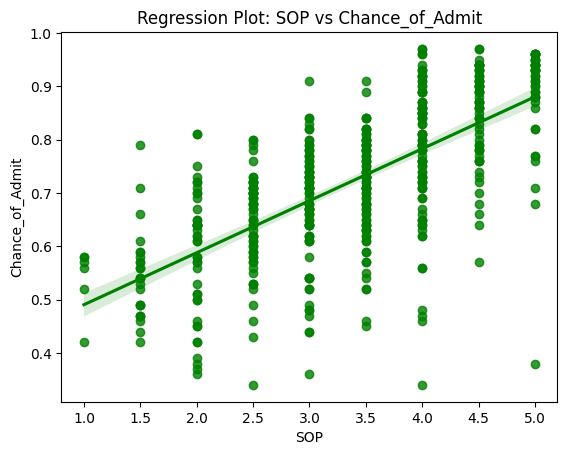

Plotting regression plot for: LOR 


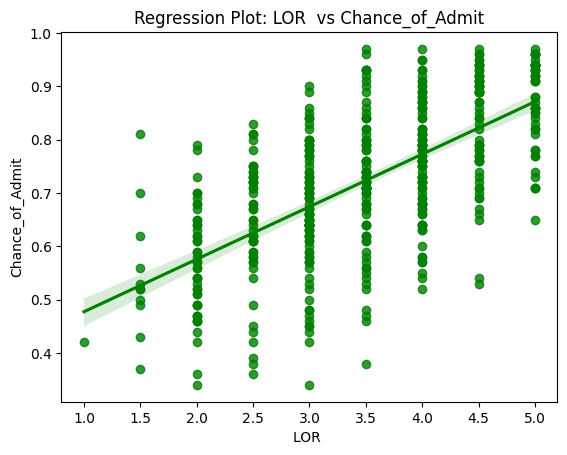

Plotting regression plot for: CGPA


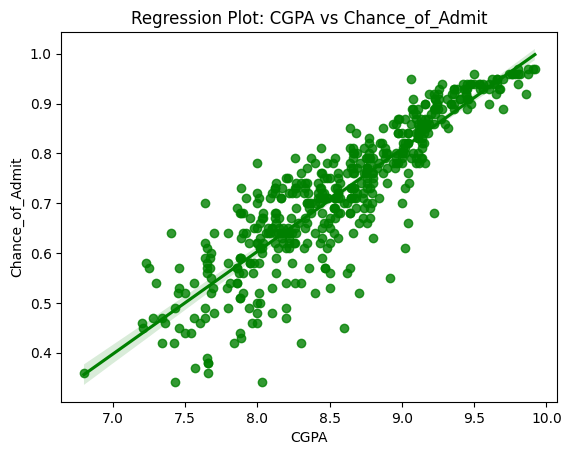

Plotting regression plot for: Research


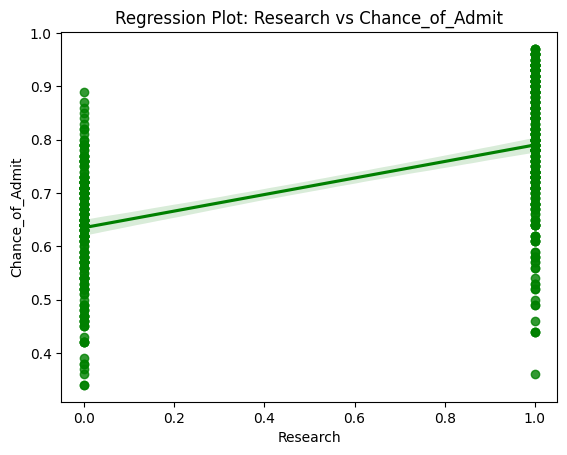

In [27]:
for col in df.columns[:-1]:
    print(f"Plotting regression plot for: {col}")
    sns.regplot(data=df, x=col, y="Chance_of_Admit", color='g')
    plt.title(f'Regression Plot: {col} vs Chance_of_Admit')
    plt.show()

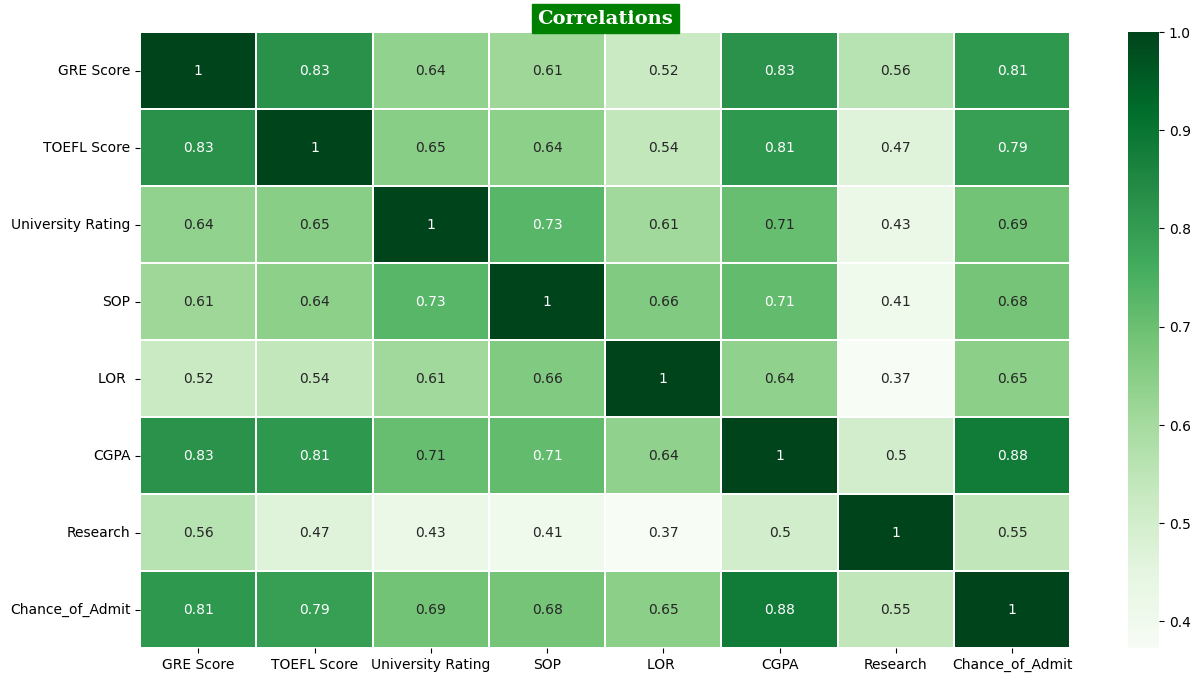

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens', linewidths = 0.1)#mask=np.triu(df.corr()))
plt.title(f'Correlations',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.yticks(rotation=0)
plt.show()

### Outlier detection:

In [33]:
from sklearn.neighbors import LocalOutlierFactor

# Initialize the LocalOutlierFactor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the model and predict outliers
outliers = lof.fit_predict(df)

# Add the outlier column to the dataframe
df['Outlier'] = outliers

# Display the outliers
outliers_df = df[df['Outlier'] == -1]
outliers_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Outlier
28,295,93,1,2.0,2.0,7.20,0,0.46,-1
31,327,103,3,4.0,4.0,8.30,1,0.74,-1
36,299,106,2,4.0,4.0,8.40,0,0.64,-1
37,300,105,1,1.0,2.0,7.80,0,0.58,-1
71,336,112,5,5.0,5.0,9.76,1,0.96,-1
79,294,93,1,1.5,2.0,7.36,0,0.46,-1
117,290,104,4,2.0,2.5,7.46,0,0.45,-1
119,327,104,5,3.0,3.5,8.84,1,0.71,-1
145,320,113,2,2.0,2.5,8.64,1,0.81,-1
204,298,105,3,3.5,4.0,8.54,0,0.69,-1


In [41]:
# Function to evaluate the model
def model_evaluation(y_true, y_pred, model):
    print(f"Model: {model}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print()

# Remove outliers from the dataset
df_no_outliers = df[df['Outlier'] != -1]

# Statistical summary comparison
print("Statistical Summary with Outliers:")
display(df.describe()) 

print("\nStatistical Summary without Outliers:")
display(df_no_outliers.describe())

# Split the data into features and target variable
x_with_outliers = df.drop(columns=['Chance_of_Admit', 'Outlier'])
y_with_outliers = df['Chance_of_Admit']

x_without_outliers = df_no_outliers.drop(columns=['Chance_of_Admit', 'Outlier'])
y_without_outliers = df_no_outliers['Chance_of_Admit']

# Split the data into training and test sets
x_train_with, x_test_with, y_train_with, y_test_with = train_test_split(
    x_with_outliers, y_with_outliers, test_size=0.2, random_state=42
)
x_train_without, x_test_without, y_train_without, y_test_without = train_test_split(
    x_without_outliers, y_without_outliers, test_size=0.2, random_state=42
)

# Standardize the data
scaler_with_outliers = StandardScaler()
x_train_with = scaler_with_outliers.fit_transform(x_train_with)  # Fit and transform training data
x_test_with = scaler_with_outliers.transform(x_test_with)        # Only transform test data

scaler_without_outliers = StandardScaler()
x_train_without = scaler_without_outliers.fit_transform(x_train_without)  # Fit and transform training data
x_test_without = scaler_without_outliers.transform(x_test_without)        # Only transform test data

# Train a Linear Regression model on the data with outliers
lr_with_outliers = LinearRegression()
lr_with_outliers.fit(x_train_with, y_train_with)

# Train a Linear Regression model on the data without outliers
lr_without_outliers = LinearRegression()
lr_without_outliers.fit(x_train_without, y_train_without)

# Predict and evaluate the model performance with outliers
y_pred_train_with = lr_with_outliers.predict(x_train_with)
y_pred_test_with = lr_with_outliers.predict(x_test_with)
print("\nModel Performance with Outliers:")
model_evaluation(y_train_with, y_pred_train_with, "Linear Regression (with outliers)")
model_evaluation(y_test_with, y_pred_test_with, "Linear Regression (with outliers)")
print()

# Predict and evaluate the model performance without outliers
y_pred_train_without = lr_without_outliers.predict(x_train_without)
y_pred_test_without = lr_without_outliers.predict(x_test_without)
print("\nModel Performance without Outliers:")
model_evaluation(y_train_without, y_pred_train_without, "Linear Regression (without outliers)")
model_evaluation(y_test_without, y_pred_test_without, "Linear Regression (without outliers)")
print()

Statistical Summary with Outliers:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Outlier
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174,0.900000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114,0.436326
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000,-1.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000,1.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000,1.000000



Statistical Summary without Outliers:


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Outlier
count,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.000000,475.0
mean,316.602105,107.307368,3.130526,3.386316,3.480000,8.583937,0.564211,0.723411,1.0
std,10.968482,5.988231,1.126875,0.971494,0.912362,0.597064,0.496383,0.139961,0.0
min,293.000000,94.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000,1.0
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.640000,1.0
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000,1.0
75%,324.000000,112.000000,4.000000,4.000000,4.000000,9.055000,1.000000,0.825000,1.0
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000,1.0



Model Performance with Outliers:
Model: Linear Regression (with outliers)
R2 Score: 0.8210671369321554
Mean Absolute Error: 0.04253334061164314
Mean Squared Error: 0.003526555478455758
Root Mean Squared Error: 0.05938480848210052

Model: Linear Regression (with outliers)
R2 Score: 0.8188432567829628
Mean Absolute Error: 0.04272265427705369
Mean Squared Error: 0.0037046553987884127
Root Mean Squared Error: 0.060865880415783134



Model Performance without Outliers:
Model: Linear Regression (without outliers)
R2 Score: 0.823959552500243
Mean Absolute Error: 0.04267380899796672
Mean Squared Error: 0.003534047947499459
Root Mean Squared Error: 0.05944785906573473

Model: Linear Regression (without outliers)
R2 Score: 0.7608112232260131
Mean Absolute Error: 0.04603771126142746
Mean Squared Error: 0.004169056403733858
Root Mean Squared Error: 0.06456823060711714




#### 🕵🏽‍♂️Insights:

Model Performance with Outliers:  
Model: LinearRegression()  
train data:  
R2 Score: 0.8210671369321554  
Mean Absolute Error: 0.042533340611643135  
Mean Squared Error: 0.0035265554784557574  
Root Mean Squared Error: 0.059384808482100516  
  
Test data:  
Model: LinearRegression()  
R2 Score: 0.8188432567829628  
Mean Absolute Error: 0.04272265427705368  
Mean Squared Error: 0.0037046553987884123  
Root Mean Squared Error: 0.06086588041578313  

  
Model Performance without Outliers:  
Model: LinearRegression()  
Train data:  
R2 Score: 0.823959552500243  
Mean Absolute Error: 0.04267380899796672  
Mean Squared Error: 0.0035340479474994593  
Root Mean Squared Error: 0.059447859065734736  

test data:  
Model: LinearRegression()  
R2 Score: 0.7608112232260131  
Mean Absolute Error: 0.04603771126142746  
Mean Squared Error: 0.004169056403733858  
Root Mean Squared Error: 0.06456823060711714   

> From the results, the model's performance with and without outliers reveals several insights related to bias, variance, and underfitting/overfitting:

* Model Performance with Outliers

    * Training Error:

        * R² = 0.821: The model explains 82.1% of the variance in the training data, which is reasonably high.
        * Low MAE and RMSE indicate that the model is fitting the training data well without over-complicating.
    
    * Testing Error:

        * R² = 0.819: The model explains 81.9% of the variance in the test data, closely matching the training performance.
        * Low MAE and RMSE indicate consistent predictive power on unseen data.

* Insights:

    * Bias: The bias is low because the model is accurately capturing the patterns in the data.
Variance: The variance is also low, as the gap between training and testing performance is minimal, implying good generalization.
Underfitting/Overfitting: The model is neither underfitting nor overfitting—it balances bias and variance well.


* Model Performance without Outliers

    * Training Error:

        * R² = 0.824: The model explains slightly more variance (82.4%) in the training data compared to the model with outliers.
        * The performance metrics (MAE, MSE, RMSE) are similar to the model with outliers, indicating no significant improvement in the training fit.

    * Testing Error:

        * R² = 0.761: The model explains only 76.1% of the variance in the test data, which is noticeably lower than the performance on training data.
        * The higher MAE and RMSE indicate reduced predictive accuracy on unseen data.

* Insights:

    * Bias: The model exhibits slightly higher bias on the test set, suggesting it may not fully capture all patterns in the dataset after removing outliers.
    * Variance: The larger gap between training and testing R² indicates higher variance, meaning the model overfits the training data when outliers are removed.
    * Underfitting/Overfitting: Removing outliers has led to overfitting on the training set, reducing the model's ability to generalize to unseen data.

* General Observations
    * Training Error < Testing Error:
        * This is expected because the model is trained to minimize error on the training data. However, a small gap between training and testing errors, as seen with the model with outliers, indicates good generalization and a balanced bias-variance tradeoff.

> Impact of Outliers:

* The model with outliers performs slightly better on the test set, suggesting the outliers may hold valuable information for prediction. Removing them increased variance and led to overfitting.
* Since outliers have minimal impact and the dataset is small, it is reasonable to retain them to avoid loss of information. 
* Linear regression is sensitive to outliers. However, in this case, since the outliers have minimal impact and the dataset contains fewer data points, we proceed with the outliers included.

*****

```python
# **MANUAL Implementation including GD: 

class LinearRegression:

  def __init__(self, learning_rate = 0.1, iteration = 5):
    self.learning_rate = learning_rate
    self.iteration = iteration

  def predict(self, X):
    return np.dot(X, self.W) + self.b

  def r2_score(self, X, y):
    y_ = self.predict(X) # I have not created this yet, will come later
    ss_res = np.sum((y - y_) ** 2)
    ss_total = np.sum((y - y.mean()) ** 2)

    return 1 - (ss_res/ss_total)

  def update_weights(self):

    Y_pred = self.predict(self.X)

    dW = - ((2 * self.X.T).dot(self.Y - Y_pred))/ self.m

    db = - ( 2 * np.sum(self.Y - Y_pred)) / self.m

    self.W = self.W - (self.learning_rate  * dW)
    self.b = self.b - (self.learning_rate * db)

    return self


  def fit(self, X, Y):

    self.m, self.d = X.shape

    # weight initialization

    self.W = np.zeros(self.d)
    self.b = 0
    self.X = X
    self.Y = Y

    self.error_list = []

    for i in range(self.iteration):
      self.update_weights()
      Y_pred = X.dot(self.W) + self.b
      error = np.square(np.subtract(Y, Y_pred)).mean()
      self.error_list.append(error)
    return self

pass the data after scaling
model = LinearRegression(iteration=1200)
```


#### Data Preprocessing - Standardization ! done ...

#### Scaling done after split only for x_train(fit_transform), x-test - no scaling just transforming ... note only 500 riws so go for K-fold cross validation . shuffle data was done random state...

In [42]:
x_with_outliers , y_with_outliers

(     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
 0          337          118                  4  4.5   4.5  9.65         1
 1          324          107                  4  4.0   4.5  8.87         1
 2          316          104                  3  3.0   3.5  8.00         1
 3          322          110                  3  3.5   2.5  8.67         1
 4          314          103                  2  2.0   3.0  8.21         0
 ..         ...          ...                ...  ...   ...   ...       ...
 495        332          108                  5  4.5   4.0  9.02         1
 496        337          117                  5  5.0   5.0  9.87         1
 497        330          120                  5  4.5   5.0  9.56         1
 498        312          103                  4  4.0   5.0  8.43         0
 499        327          113                  4  4.5   4.5  9.04         0
 
 [500 rows x 7 columns],
 0      0.92
 1      0.76
 2      0.72
 3      0.80
 4      0.65
        

In [43]:
x_train_with , y_train_with

(array([[ 0.38998634,  0.6024183 , -0.09829757, ...,  0.56498381,
          0.4150183 ,  0.89543386],
        [-0.06640493,  0.6024183 ,  0.7754586 , ...,  1.65149114,
         -0.06785154, -1.11677706],
        [-1.25302222, -0.87691722, -0.09829757, ..., -0.52152352,
         -0.13445427, -1.11677706],
        ...,
        [-1.34430047, -1.37002906, -1.8458099 , ..., -1.60803084,
         -2.2157898 , -1.11677706],
        [-0.7053527 , -0.38380538, -0.97205374, ...,  0.56498381,
         -1.49981038, -1.11677706],
        [-0.24896144, -0.21943477, -0.97205374, ...,  0.02173015,
         -0.55072138, -1.11677706]]),
 249    0.77
 433    0.71
 19     0.62
 322    0.72
 332    0.75
        ... 
 106    0.87
 270    0.72
 348    0.57
 435    0.55
 102    0.62
 Name: Chance_of_Admit, Length: 400, dtype: float64)

In [44]:
x_test_with , y_test_with

(array([[ 1.57660363,  1.42427137,  0.7754586 ,  0.63397891,  0.02173015,
          1.59721688,  0.89543386],
        [-0.24896144,  0.10930646,  0.7754586 ,  1.14116204,  0.56498381,
          0.76468267,  0.89543386],
        [-0.15768318, -0.38380538, -0.97205374, -1.39475361, -1.06477718,
         -1.54976243, -1.11677706],
        [-0.43151794,  0.27367707, -0.09829757, -0.38038735, -0.52152352,
          0.18190872, -1.11677706],
        [ 0.8463776 ,  0.76678891, -0.09829757,  0.12679578, -0.52152352,
          0.78133336,  0.89543386],
        [ 1.12021236,  0.6024183 ,  0.7754586 ,  1.14116204,  0.56498381,
          1.08104567,  0.89543386],
        [-2.43963951, -1.20565845, -1.8458099 , -1.90193674, -1.60803084,
         -1.69961859, -1.11677706],
        [-1.43557873, -0.21943477,  0.7754586 , -0.88757048, -0.52152352,
         -0.18440633, -1.11677706],
        [ 0.11615158,  0.27367707, -0.09829757,  0.12679578,  0.56498381,
          1.06439499,  0.89543386],
        [ 

In [86]:
# Note : Train is fit_transformed & test is just transformed
x_train_scaled = x_train_with
y_train = y_train_with
x_test_scaled = x_test_with
y_test = y_test_with 

In [29]:
# scaler = StandardScaler()
# scaled_df = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [30]:
# scaled_df

In [87]:
# x = scaled_df.iloc[:,:-1]
# y = scaled_df.iloc[:,-1]
print(x_train_scaled.shape , y_train.shape)
print(x_test_scaled.shape , y_test.shape)

(400, 7) (400,)
(100, 7) (100,)


In [88]:
print(f'Shape of x_train: {x_train_scaled.shape}')
print(f'Shape of x_test: {x_test_scaled.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (400, 7)
Shape of x_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [49]:
# Predicting values for the training and test data
y_pred_train = lr_model.predict(x_train_scaled)
y_pred_test = lr_model.predict(x_test_scaled)

### r2 score on train data : 

In [50]:
r2_score(y_train,y_pred_train)

0.8210671369321554

In [51]:
lr_model.score(x_train_scaled,y_train)

0.8210671369321554

### r2 score on test data : 

In [52]:
r2_score(y_test,y_pred_test)

0.8188432567829628

In [53]:
lr_model.score(x_test_scaled,y_test)

0.8188432567829628

### All the feature's coefficients and Intercept : 

In [58]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,Outlier
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,1
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,1
4,314,103,2,2.0,3.0,8.21,0,0.65,1
...,...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87,-1
496,337,117,5,5.0,5.0,9.87,1,0.96,1
497,330,120,5,4.5,5.0,9.56,1,0.93,1
498,312,103,4,4.0,5.0,8.43,0,0.73,1


In [59]:
lr_model_weights = pd.DataFrame([lr_model.coef_], columns=df.columns[:-2])
lr_model_weights['Intercept'] = lr_model.intercept_
lr_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.026671,0.018226,0.00294,0.001788,0.015866,0.067581,0.01194,0.724175


#### 🏷️Insights:

* Key Predictors: CGPA, LOR, and GRE scores are the strongest predictors of admission chances, with CGPA having the highest impact on the outcome.

* Modest Effects: Features like University Rating, SOP, and Research have smaller impacts on the admission probability, with Research slightly increasing the chance of admission.

* Intercept Interpretation: The intercept of 0.724175 suggests that in the absence of strong qualifications, the model still predicts a high baseline admission probability, indicating a generally positive admission trend in the dataset.


In [60]:
def adjusted_r2_score(y_true, y_pred, model):
    # Get the number of data points (n) and the number of features (p)
    n = len(y_true)
    p = x_train_scaled.shape[1]  # Use the number of features from training data (x_train_with)

    # Calculate R² score
    r2 = r2_score(y_true, y_pred)
    
    # Calculate Adjusted R²
    adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    
    return adj_r2

def model_evaluation(y_true, y_pred, model, x_train):
    print(f"Model: {model}")
    print(f"R2 Score: {r2_score(y_true, y_pred)}")
    print(f"Adjusted R2 Score: {adjusted_r2_score(y_true, y_pred, model)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_true, y_pred)}")
    print(f"Mean Squared Error: {mean_squared_error(y_true, y_pred)}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_true, y_pred))}")
    print()



In [63]:
print("Model Performance of training data:")
model_evaluation(y_train, y_pred_train, lr_model, x_train_scaled)

Model Performance of training data:
Model: LinearRegression()
R2 Score: 0.8210671369321554
Adjusted R2 Score: 0.8178719072345153
Mean Absolute Error: 0.04253334061164314
Mean Squared Error: 0.003526555478455758
Root Mean Squared Error: 0.05938480848210052



In [62]:
print("Model Performance of test data:")
model_evaluation(y_test, y_pred_test, lr_model, x_train_scaled)

Model Performance of test data:
Model: LinearRegression()
R2 Score: 0.8188432567829628
Adjusted R2 Score: 0.8050595915381882
Mean Absolute Error: 0.04272265427705369
Mean Squared Error: 0.0037046553987884127
Root Mean Squared Error: 0.060865880415783134



#### 🏷️Insights:

1. **Good Model Fit with Low Bias**:
   - The **R² and Adjusted R² scores** are quite close between the training (R² = 0.821) and test data (R² = 0.819), indicating that the model is performing similarly on both. The low difference between R² and Adjusted R² for both datasets suggests that the model is not overfitting or underfitting and is capturing the underlying patterns effectively. This implies **low bias** and **balanced variance**.

2. **Low Overfitting or Underfitting Risk**:
   - The performance metrics, such as **Mean Absolute Error** (MAE) and **Root Mean Squared Error** (RMSE), are quite similar between the training and test sets. This indicates the model is generalizing well to unseen data, suggesting **minimal overfitting**. Since the metrics are not excessively high, the model is not overly simplistic, indicating **low underfitting** as well. The bias-variance tradeoff is well balanced, as the model exhibits good predictive power without excessive complexity.


## Linear Regression using OLS

In [69]:
new_x_train = sm.add_constant(x_with_outliers)
model = sm.OLS(y_with_outliers, new_x_train)
results = model.fit()

# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          8.21e-180
Time:                        10:24:15   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

In [67]:
new_x_train = sm.add_constant(x_train_scaled)
model = sm.OLS(y_train, new_x_train)
results = model.fit()

# statstical summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance_of_Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Mon, 30 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        10:21:33   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

#### 💡OBSERVATION: 

* Conidering the very low p_valued Features and highly weighted coef features as the major contributers of Model Prediction, `CGPA,GRE,TOEFL,LOR` are the features contributing to model building...


1. Multicollinearity (VIF > 5) and SOP Correlation:
    * P-value and Multicollinearity: A very high p-value for SOP suggests that it has no significant relationship with the dependent variable (Chance of Admit). However, since considering the possibility of multicollinearity, we need to examine the Variance Inflation Factor (VIF) for the predictor variables.
    * VIF > 5: If VIF for SOP is greater than 5, it indicates strong multicollinearity with other features (like GRE, CGPA, etc.). This could mean that SOP is highly correlated with other features and doesn't provide much unique information. You may want to remove SOP if it has a high VIF to reduce redundancy in the model.
2. Durbin-Watson Test:
    * Durbin-Watson around 2: The Durbin-Watson statistic tests for autocorrelation in residuals. A value near 2 suggests that there is no significant autocorrelation in the residuals. In this case, since your Durbin-Watson statistic is around 2, it suggests that the model is not suffering from issues related to autocorrelation of residuals, which is a good sign for model validity.
3. Omnibus and Jarque-Bera Tests:
    * Omnibus Test (p-value = 0): The Omnibus test checks for normality of residuals. A p-value of 0 indicates strong evidence against the null hypothesis of normality. This suggests that the residuals are not normally distributed.
    * Jarque-Bera Test (p-value = 5.25e^-42): The Jarque-Bera test also tests for normality, specifically checking for skewness and kurtosis in the residuals. A very small p-value (5.25e^-42) strongly rejects the null hypothesis of normality, indicating that the residuals deviate significantly from normal distribution. This suggests that the data might be non-normally distributed.
4. Skewness (-1.107):
    * Skewness of -1.107 indicates slight left skew (negative skewness). This means the distribution of the data is slightly asymmetric with a longer tail on the left. However, since it's not extreme, this skewness is not a significant concern, but it is worth noting in terms of model assumptions.
5. Kurtosis (5.551):
    * Kurtosis of 5.551 suggests that the distribution of the data has heavy tails (leptokurtic distribution). This indicates that the data may have more outliers than a normal distribution. It also implies greater peak around the mean and heavier tails (extreme values), which could affect model performance if outliers are not addressed.
    * Leptokurtic Distribution: Kurtosis values greater than 3 (in this case, 5.551) suggest a leptokurtic distribution, which has fatter tails and a more pronounced peak than a normal distribution.

------
## 📂Testing Assumptions of Linear Regression Model

1. **No multicolinearity:** 
    >   Multicollinearity check by VIF(Variance Inflation Factor) score.   
    >   Variables are dropped one-by-one till none has a VIF>5.
    
    
2. **Mean of Residuals** should be close to zero.


3. Linear relationship between independent & dependent variables.

    - This can be checked using the following methods:  
        - Scatter plots  
        - Regression plots  
        - Pearson Correlation  
    
    
4. Test for **Homoscedasticity**

    - Create a scatterplot of residuals against predicted values.
    - Perform a Goldfeld-Quandt test to check the presence of
    
    >- **Heteroscedasticity** in the data.  
        - If the obtained `p-value > 0.05`, there is no strong evidence of heteroscedasticity.
    
    
5. Normality of Residuals

    - Almost bell-shaped curve in residuals distribution.
      
        
    
6. Impact of **Outliers**

###  🔹Multicolinearity check:

*VIF (Variance Inflation Factor)* is a measure that quantifies the severity of multicollinearity in a regression analysis.  
It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

`VIF(j) = 1 / (1 - R(j)^2)`

Where:
- j represents the jth predictor variable.
- R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

"
- Calculate the VIF for each variable.
- Identify variables with VIF greater than 5.
- Drop the variable with the highest VIF.
- Repeat steps 1-3 until no variable has a VIF greater than 5.  
"

In [75]:
vif = pd.DataFrame()
vif['Variable'] = x_with_outliers.columns
vif['VIF'] = [variance_inflation_factor(x_train_scaled, i) for i in range(x_train_scaled.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.654540
0,GRE Score,4.489983
1,TOEFL Score,3.664298
3,SOP,2.785764
2,University Rating,2.572110
4,LOR,1.977698
6,Research,1.518065


Note: This is for Standard scaled but it might differ for mInmax scaling... its better to remove SOP as it has higher p-value. check the heatmap / corr to SOp and find if it highly correlated feature.

In [84]:
# Define the features and target variable for the data with outliers
x_with_outliers = df.drop(columns=['Chance_of_Admit', 'Outlier'])
y_with_outliers = df['Chance_of_Admit']

# Apply MinMax Scaling to the data with outliers
scaler_with_outliers = MinMaxScaler()
x_train_with_minmax = scaler_with_outliers.fit_transform(x_with_outliers)  # Fit and transform training data
x_test_with_minmax = scaler_with_outliers.transform(x_with_outliers)  # Only transform test data

# Convert the scaled data into a DataFrame for easier manipulation
x_train_with_minmax_df = pd.DataFrame(x_train_with_minmax, columns=x_with_outliers.columns)

# Calculate the VIF for each variable in the training set (with outliers)
vif = pd.DataFrame()
vif['Variable'] = x_train_with_minmax_df.columns
vif['VIF'] = [variance_inflation_factor(x_train_with_minmax_df.values, i) for i in range(x_train_with_minmax_df.shape[1])]
vif = vif.sort_values(by="VIF", ascending=False)

# Display the VIF values for the data with outliers
print(vif)


            Variable        VIF
5               CGPA  41.461741
0          GRE Score  29.024693
1        TOEFL Score  28.124993
3                SOP  19.007718
4               LOR   15.048490
2  University Rating  11.101366
6           Research   3.344455


Notes:
MinMax scaling is more sensitive to outliers, so if your data contains extreme outliers, it could affect the scaling, unlike StandardScaler which is less sensitive to outliers.
Make sure you check the VIF values carefully. High VIFs suggest that certain features might be multicollinear, and it would be a good idea to consider removing them or using dimensionality reduction techniques like PCA.

In [85]:
# Filter out the outliers from the dataframe
df_no_outliers = df[df['Outlier'] != -1]

# Define features and target variable for the data with and without outliers
x_without_outliers = df_no_outliers.drop(columns=['Chance_of_Admit', 'Outlier'])
y_without_outliers = df_no_outliers['Chance_of_Admit']

x_with_outliers = df.drop(columns=['Chance_of_Admit', 'Outlier'])
y_with_outliers = df['Chance_of_Admit']

# Apply MinMax Scaling to the data with outliers
scaler_with_outliers = MinMaxScaler()
x_train_with_minmax = scaler_with_outliers.fit_transform(x_with_outliers)  # Fit and transform training data
x_test_with_minmax = scaler_with_outliers.transform(x_with_outliers)  # Only transform test data

# Convert the scaled data into a DataFrame for easier manipulation
x_train_with_minmax_df = pd.DataFrame(x_train_with_minmax, columns=x_with_outliers.columns)

# Calculate the VIF for each variable in the training set (with outliers)
vif_with_outliers = pd.DataFrame()
vif_with_outliers['Variable'] = x_train_with_minmax_df.columns
vif_with_outliers['VIF'] = [variance_inflation_factor(x_train_with_minmax_df.values, i) for i in range(x_train_with_minmax_df.shape[1])]
vif_with_outliers = vif_with_outliers.sort_values(by="VIF", ascending=False)

# Display the VIF values for the data with outliers
print("VIF for data with outliers:")
print(vif_with_outliers)

# Apply MinMax Scaling to the data without outliers
scaler_without_outliers = MinMaxScaler()
x_train_without_minmax = scaler_without_outliers.fit_transform(x_without_outliers)  # Fit and transform training data
x_test_without_minmax = scaler_without_outliers.transform(x_without_outliers)  # Only transform test data

# Convert the scaled data into a DataFrame for easier manipulation
x_train_without_minmax_df = pd.DataFrame(x_train_without_minmax, columns=x_without_outliers.columns)

# Calculate the VIF for each variable in the training set (without outliers)
vif_without_outliers = pd.DataFrame()
vif_without_outliers['Variable'] = x_train_without_minmax_df.columns
vif_without_outliers['VIF'] = [variance_inflation_factor(x_train_without_minmax_df.values, i) for i in range(x_train_without_minmax_df.shape[1])]
vif_without_outliers = vif_without_outliers.sort_values(by="VIF", ascending=False)

# Display the VIF values for the data without outliers
print("VIF for data without outliers:")
print(vif_without_outliers)


VIF for data with outliers:
            Variable        VIF
5               CGPA  41.461741
0          GRE Score  29.024693
1        TOEFL Score  28.124993
3                SOP  19.007718
4               LOR   15.048490
2  University Rating  11.101366
6           Research   3.344455
VIF for data without outliers:
            Variable        VIF
5               CGPA  38.331716
1        TOEFL Score  28.277479
0          GRE Score  27.491578
3                SOP  19.192913
4               LOR   15.345239
2  University Rating  11.681369
6           Research   3.303547


#### 🏷️Insights:
    
- This show minmax scaling is not optimum. so we proceed with standard scaling.
- As the Variance Inflation Factor(VIF) score is less than 5 for all the features we can say that there is no much multicolinearity between the features.

------
### 🔹Mean of Residuals:

- The mean of residuals represents the average of residual values in a regression model.
- Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.  
- The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. 
- However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.
- **The mean of residuals being close to zero indicates that, on average, the predictions made by the linear regression model are accurate, with an equal balance of overestimations and underestimations. This is a desirable characteristic of a well-fitted regression model.**

In [89]:
residuals = y_test.values - y_pred_test

In [90]:
residuals_train = y_train.values - y_pred_train
residuals_train.mean()

1.494637746901617e-16

In [91]:
residuals.mean()

-0.005453623717661247

#### Residual mean is closer to zero.

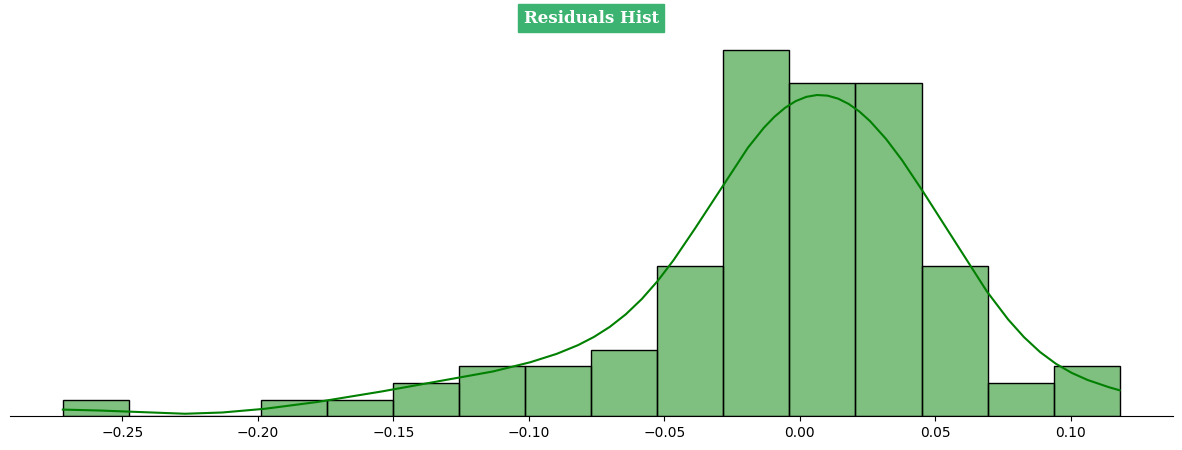

In [92]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

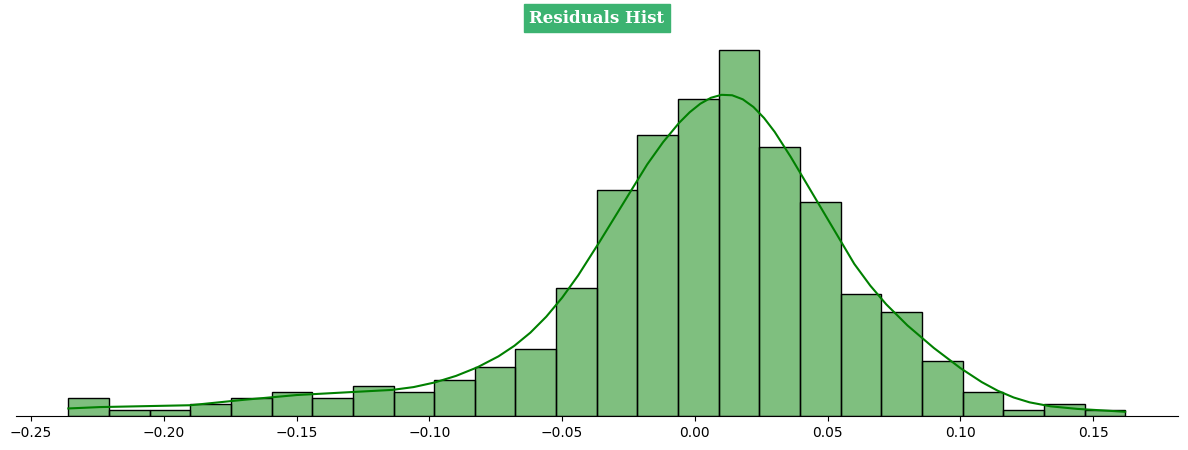

In [93]:
plt.figure(figsize=(15,5))
sns.histplot(residuals_train, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

### 🏷️Insights:

- Since the mean of residuals is very close to 0, we can say that the model is `UnBiased`.

-----

### 🔹Linear Relationships:

Linearity of variables refers to the assumption that there is a linear relationship between the independent variables and the dependent variable in a regression model. It means that the effect of the independent variables on the dependent variable is constant across different levels of the independent variables.

When we talk about "no pattern in the residual plot" in the context of linearity, we are referring to the plot of the residuals (the differences between the observed and predicted values of the dependent variable) against the predicted values or the independent variables.

Ideally, in a linear regression model, the residuals should be randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.

If there is a visible pattern in the residual plot, it suggests a violation of the linearity assumption. Common patterns that indicate non-linearity include:

1. Curved or nonlinear shape: The residuals form a curved or nonlinear pattern instead of a straight line.
2. U-shaped or inverted U-shaped pattern: The residuals show a U-shape or inverted U-shape, indicating a nonlinear relationship.
3. Funnel-shaped pattern: The spread of residuals widens or narrows as the predicted values or independent variables change, suggesting heteroscedasticity.
4. Clustering or uneven spread: The residuals show clustering or uneven spread across different levels of the predicted values or independent variables.  

If a pattern is observed in the residual plot, it may indicate that the linear regression model is not appropriate, and nonlinear regression or other modeling techniques should be considered. Additionally, transformations of variables, adding interaction terms, or using polynomial terms can sometimes help capture nonlinear relationships and improve linearity in the residual plot.


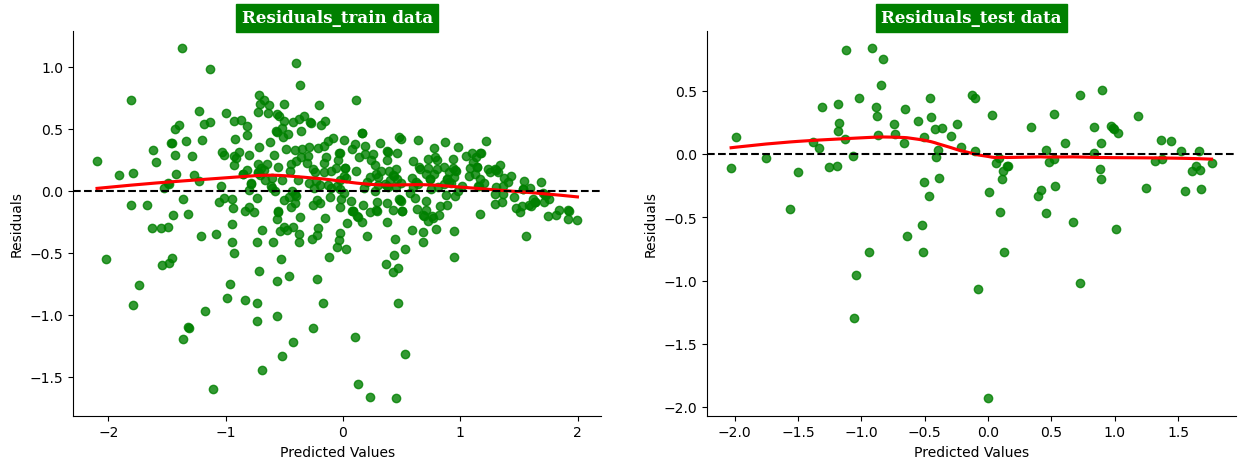

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.title('Residuals_train data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_train, y=residuals_train, lowess=True, color='g',line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.subplot(122)
plt.title('Residuals_test data',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
sns.regplot(x=y_pred_test, y=residuals, lowess=True,color='g' ,line_kws={'color': 'red'})
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
sns.despine()
plt.show()

#### 🏷️Insights:
    
- From the Joint plot & pairplot in the graphical analysis, we can say that there is linear relationship between dependent variable and independent variables.

- As we can observe, GRE Score, TOEFL Score and CGPA have a linear relationship with the Chance of Admit. Although GRE score and TOEFL score are more scattered, CGPA has a much more more linear relationship with the Chance of Admit.

- In a linear regression model, the residuals are randomly scattered around zero, without any clear patterns or trends. This indicates that the model captures the linear relationships well and the assumption of linearity is met.
-----

### 🔹Homoscedasticity

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables. In simpler terms, it means that the spread of the residuals should be similar across different values of the predictors.

When homoscedasticity is violated, it indicates that the variability of the errors is not consistent across the range of the predictors, which can lead to unreliable and biased regression estimates.

To test for homoscedasticity, there are several graphical and statistical methods that you can use:

1. Residual plot: Plot the residuals against the predicted values or the independent variables. Look for any systematic patterns or trends in the spread of the residuals. If the spread appears to be consistent across all levels of the predictors, then homoscedasticity is likely met.

2. Scatterplot: If you have multiple independent variables, you can create scatter plots of the residuals against each independent variable separately. Again, look for any patterns or trends in the spread of the residuals.

3. Breusch-Pagan Test: This is a statistical test for homoscedasticity. It involves regressing the squared residuals on the independent variables and checking the significance of the resulting model. If the p-value is greater than a chosen significance level (e.g., 0.05), it suggests homoscedasticity. However, this test assumes that the errors follow a normal distribution.

4. Goldfeld-Quandt Test: This test is used when you suspect heteroscedasticity due to different variances in different parts of the data. It involves splitting the data into two subsets based on a specific criterion and then comparing the variances of the residuals in each subset. If the difference in variances is not significant, it suggests homoscedasticity.

It's important to note that the visual inspection of plots is often the first step to identify potential violations of homoscedasticity. Statistical tests can provide additional evidence, but they may have assumptions or limitations that need to be considered.

### **Scatterplot of residuals with each independent variable to check for Homoscedasticity**

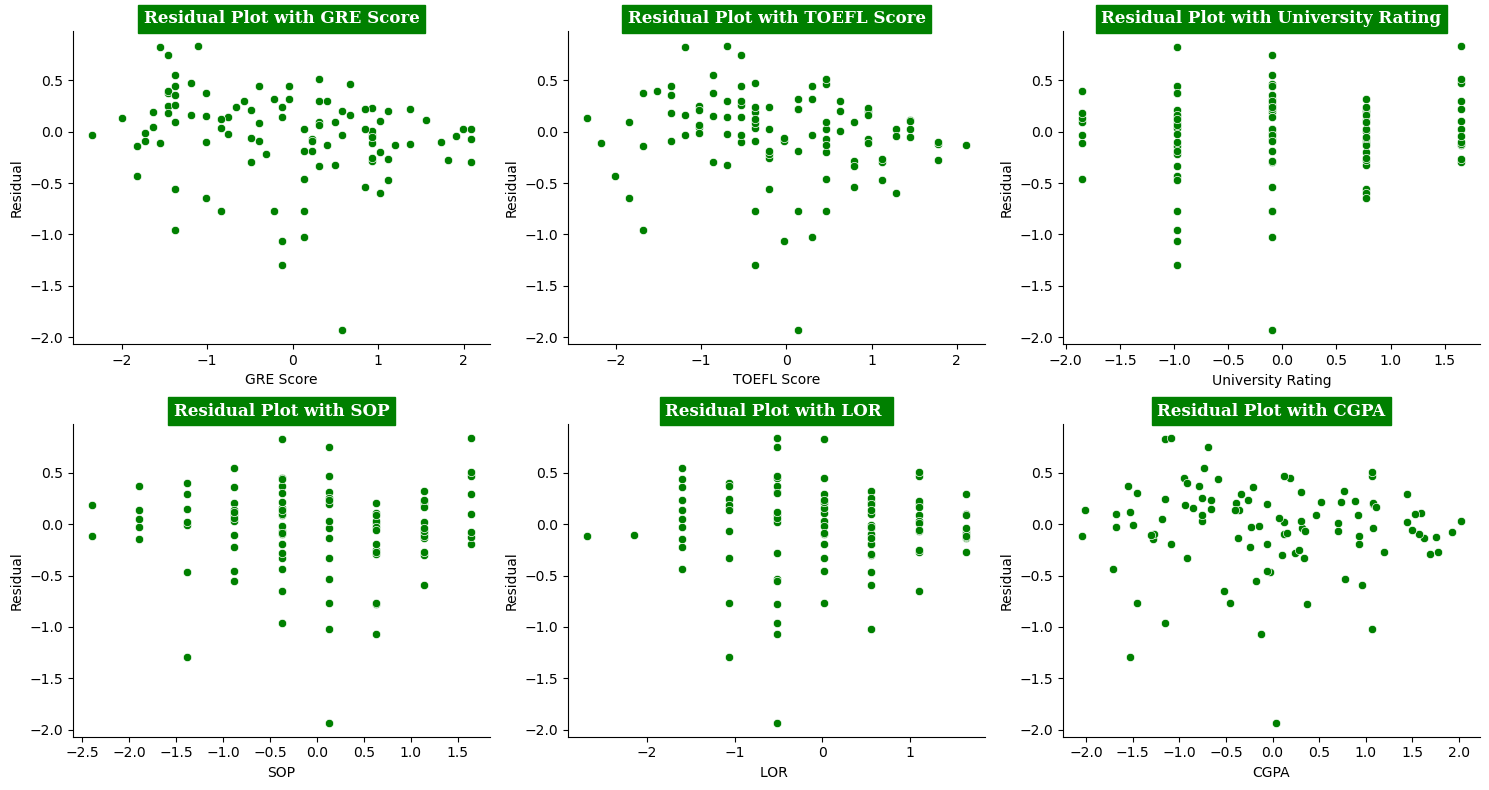

In [50]:
# Scatterplot of residuals with each independent variable to check for Homoscedasticity
plt.figure(figsize=(15,8))
i=1
for col in x_test.columns[:-1]:
    plt.subplot(2,3,i)
    sns.scatterplot(x=x_test[col].values.reshape((-1,)), y=residuals.reshape((-1,)),color='g')
    plt.title(f'Residual Plot with {col}',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    plt.xlabel(col)
    plt.ylabel('Residual')
    i+=1

plt.tight_layout()
sns.despine()
plt.show();

In [95]:
ols_model = results
predicted = ols_model.predict()
residuals = ols_model.resid

#### ```Breusch-Pagan test for Homoscedasticity```

Null Hypothesis -- H0 : Homoscedasticity is present in residuals.    
Alternate Hypothesis --  Ha : Heteroscedasticity is present in residuals.  
alpha : 0.05

In [100]:
gq_test_results = sms.het_goldfeldquandt(residuals, ols_model.model.exog)
gq_test_results

(0.4494044330462439, 0.9999999995739839, 'increasing')

In [104]:
# 1. Breusch-Pagan Test for Homoscedasticity
residuals = ols_model.resid
bp_test_results = sms.het_breuschpagan(residuals, ols_model.model.exog)

# Creating DataFrame for Breusch-Pagan Test results
bp_test = pd.DataFrame(bp_test_results, 
                       columns=['value'], 
                       index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

# 2. Goldfeld-Quandt Test for Homoscedasticity
gq_test_results = sms.het_goldfeldquandt(residuals, ols_model.model.exog)
gq_test_df = pd.DataFrame([gq_test_results], columns=['Test Statistic', 'p-value','Trend'])

# Print Breusch-Pagan Test results
print("Breusch-Pagan Test Results:")
print(bp_test)

# Print Goldfeld-Quandt Test results
print("\nGoldfeld-Quandt Test Results:")
print(gq_test_df)

# Interpretation for Breusch-Pagan Test
bp_p_value = bp_test.loc['p-value', 'value']
if bp_p_value < 0.05:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")

# Interpretation for Goldfeld-Quandt Test
gq_p_value = gq_test_df.loc[0, 'p-value']
if gq_p_value < 0.05:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")



Breusch-Pagan Test Results:
                                   value
Lagrange multiplier statistic  30.516109
p-value                         0.000076
f-value                         4.568520
f p-value                       0.000059

Goldfeld-Quandt Test Results:
   Test Statistic  p-value       Trend
0        0.449404      1.0  increasing

Breusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).
Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).


Yes, ideally, both the **Breusch-Pagan Test** and the **Goldfeld-Quandt Test** should provide consistent conclusions when assessing heteroscedasticity, but they do have different methods of detecting it. The inconsistency in your results suggests that the two tests may be responding to different aspects of your data.

Here’s why they may give differing results:

1. **Breusch-Pagan Test**:
   - This test checks for a linear relationship between the squared residuals and the independent variables. It works under the assumption that the heteroscedasticity is linked to the independent variables and can be detected through a regression model of the residuals.
   - **If the relationship between the residual variance and predictors is complex**, this test might give a significant result indicating heteroscedasticity.

2. **Goldfeld-Quandt Test**:
   - The Goldfeld-Quandt test splits the dataset into two groups (based on a variable or an index) and checks for differences in variance between the two groups. It assumes that the heteroscedasticity is a result of a specific trend (increasing or decreasing variance based on the independent variable or time).
   - **If the data doesn’t show a clear division or trend in the variance**, it may fail to detect heteroscedasticity and report that the variance is constant.

### Why might they give different results?

- **Nature of heteroscedasticity**: If the heteroscedasticity is not strictly related to the trend or structure that Goldfeld-Quandt looks for, it might fail to detect it. The Breusch-Pagan test could still detect it, since it is more sensitive to general patterns of variance changes across all levels of the independent variables.
  
- **The trend in the Goldfeld-Quandt test**: You received a result of "increasing" for the trend in the Goldfeld-Quandt test. This suggests that there might be an increasing variance in the residuals for higher values of the independent variables, but the test could not confirm significant heteroscedasticity because the p-value was too high (1.0).

### How to reconcile these results:
1. **Visual Diagnostics**: To resolve this discrepancy, you can plot the residuals against the predicted values (or one of the independent variables). If the plot shows a clear pattern of increasing or decreasing variance, this could help explain why the Breusch-Pagan test detected heteroscedasticity, while the Goldfeld-Quandt test didn’t.
  
2. **Consider using a more robust test**: The **White Test** is another popular test for heteroscedasticity. It doesn’t assume any particular form for the relationship between residual variance and predictors, so it may give a result that better matches the Breusch-Pagan test.

3. **Model adjustments**: If heteroscedasticity is confirmed, you could consider using heteroscedasticity-robust standard errors (like **Huber-White standard errors**) in your regression model to adjust for it.

---

If you want to further investigate or reconcile the results, I’d recommend starting with **residual plots** and visual diagnostics, or trying the **White Test** for another check. Let me know how you'd like to proceed or if you need code to generate the plots or run another test!


The **White Test** is another statistical test used to detect **heteroscedasticity** in regression models. It is more general and robust than the **Breusch-Pagan** and **Goldfeld-Quandt tests**, as it does not assume a specific functional form for the heteroscedasticity and can be used to test for both heteroscedasticity and model misspecification (e.g., omitted variables or incorrect functional form). 

### Why Perform the White Test?
You might use the **White Test** for the following reasons:
1. **Robust to Model Misspecification**: Unlike the Breusch-Pagan and Goldfeld-Quandt tests, which assume a certain relationship between the residuals and the predictors, the White Test does not rely on a specific structure and can detect more general forms of heteroscedasticity.
2. **General Detection of Heteroscedasticity**: It tests for heteroscedasticity in the presence of a broader class of alternative models. It does not require the variance to change in a specific direction (like the Goldfeld-Quandt Test).
3. **Model Diagnostics**: It helps assess whether the residual variance is constant across observations, which is a critical assumption in ordinary least squares (OLS) regression models. If this assumption is violated, standard errors and hypothesis tests can become unreliable.

### Hypotheses for White Test:
- **Null Hypothesis (H₀)**: **Homoscedasticity is present** (the residuals have constant variance).
- **Alternative Hypothesis (H₁)**: **Heteroscedasticity is present** (the residuals have non-constant variance).

### Performing the White Test in Python

To perform the **White Test**, you can use the `het_white` function from **statsmodels**. Here’s how you can implement it:

```python
import statsmodels.api as sm
import statsmodels.stats.api as sms

# 1. White Test for Homoscedasticity
white_test_results = sms.het_white(lr_model.resid, lr_model.model.exog)

# 2. Creating DataFrame for White Test results
white_test_df = pd.DataFrame(white_test_results, 
                             columns=['value'], 
                             index=['Test Statistic', 'p-value', 'f-value', 'f p-value'])

# Print White Test results
print("\nWhite Test Results:")
print(white_test_df)

# Interpretation for White Test
white_p_value = white_test_df.loc['p-value', 'value']
if white_p_value < 0.05:
    print("\nWhite Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nWhite Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")
```

### Explanation of the Code:
- `sms.het_white(lr_model.resid, lr_model.model.exog)`: This function performs the White test, where `lr_model.resid` represents the residuals from the regression model and `lr_model.model.exog` refers to the independent variables (predictors).
  - **Test Statistic**: The test statistic from the White test.
  - **p-value**: The p-value for testing heteroscedasticity.
  - **f-value**: The F-statistic associated with the test.
  - **f p-value**: The p-value corresponding to the F-statistic.
- The results are then stored in a DataFrame and printed.

### Conclusion:
- If the **p-value** from the White Test is **less than 0.05**, it indicates that heteroscedasticity is present, meaning the residuals' variance is not constant across the data.
- If the **p-value** is **greater than or equal to 0.05**, the null hypothesis of homoscedasticity is not rejected, suggesting the residuals have constant variance.

This test can be an important part of your model diagnostics to confirm whether the assumption of homoscedasticity holds or if corrections (e.g., robust standard errors) are needed.

Let me know if you'd like help running this or interpreting the results!

In [106]:
# 1. White Test for Homoscedasticity
white_test_results = sms.het_white(ols_model.resid, ols_model.model.exog)

# 2. Creating DataFrame for White Test results
white_test_df = pd.DataFrame(white_test_results, 
                             columns=['value'], 
                             index=['Test Statistic', 'p-value', 'f-value', 'f p-value'])

# Print White Test results
print("\nWhite Test Results:")
print(white_test_df)

# Interpretation for White Test
white_p_value = white_test_df.loc['p-value', 'value']
if white_p_value < 0.05:
    print("\nWhite Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nWhite Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")


White Test Results:
                    value
Test Statistic  71.481679
p-value          0.000178
f-value          2.281389
f p-value        0.000082

White Test Interpretation: Heteroscedasticity is present (p-value < 0.05).


#### 🏷️Insights:

- Since we do not see any significant change in the spread of residuals with respect to change in independent variables, we can conclude that `Homoscedasticity is met`.

- Since the p-value is much lower than the alpha value, we can conclude that ***`Heteroscedasticity is present`*** from both tests.

- Since the p-value is significantly less than the conventional significance level (e.g., 0.05), we reject the null hypothesis of homoscedasticity. This suggests that there is evidence of heteroscedasticity in the residuals, indicating that the variance of the residuals is not constant across all levels of the independent variables.

- This violation of the homoscedasticity assumption may affect the validity of the linear regression model's results.

> It's important to consider alternative modeling approaches or corrective measures to address this issue.

>> Conflict in Results:
    * In your case, the Breusch-Pagan test indicates heteroscedasticity (p-value < 0.05), while the Goldfeld-Quandt test does not (p-value = 1.0). This discrepancy may be due to the different assumptions and sensitivities of the tests:

    * Breusch-Pagan Test: More sensitive to general forms of heteroscedasticity, often detecting issues when variance varies with the predictors.
    * Goldfeld-Quandt Test: More specific to a change in variance that might depend on the ordering or grouping of observations. In your case, the p-value of 1.0 suggests no evidence of heteroscedasticity according to this test.
>> Why the Difference?
    * Data Structure: The Goldfeld-Quandt test assumes a structure of data that could cause heteroscedasticity, such as trends in variance. If no such trend is apparent, the test may not detect heteroscedasticity, as indicated by the p-value of 1.0.
    * Test Sensitivity: The Breusch-Pagan test might be detecting heteroscedasticity in your data that the Goldfeld-Quandt test is not sensitive to, based on the structure of the residuals.
* Conclusion:
In general, when different tests give conflicting results, it's important to look at the broader context of the data, such as:

Visual Diagnostics: Consider using plots such as residual vs. fitted values to visually assess heteroscedasticity.
Model Refinements: Check if your model has omitted important variables or if there are non-linear relationships not captured by the current specification.
-----

In [103]:
# 1. Breusch-Pagan Test for Homoscedasticity
residuals = lr_model.resid
bp_test_results = sms.het_breuschpagan(residuals, lr_model.model.exog)

# Creating DataFrame for Breusch-Pagan Test results
bp_test = pd.DataFrame(bp_test_results, 
                       columns=['value'], 
                       index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

# 2. Goldfeld-Quandt Test for Homoscedasticity
gq_test_results = sms.het_goldfeldquandt(residuals, lr_model.model.exog)
gq_test_df = pd.DataFrame([gq_test_results], columns=['Test Statistic', 'p-value','Trend'])

# Print Breusch-Pagan Test results
print("Breusch-Pagan Test Results:")
print(bp_test)

# Print Goldfeld-Quandt Test results
print("\nGoldfeld-Quandt Test Results:")
print(gq_test_df)

# Interpretation for Breusch-Pagan Test
bp_p_value = bp_test.loc['p-value', 'value']
if bp_p_value < 0.05:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("\nBreusch-Pagan Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")

# Interpretation for Goldfeld-Quandt Test
gq_p_value = gq_test_df.loc[0, 'p-value']
if gq_p_value < 0.05:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is present (p-value < 0.05).")
else:
    print("Goldfeld-Quandt Test Interpretation: Heteroscedasticity is not present (p-value >= 0.05).")


AttributeError: 'LinearRegression' object has no attribute 'resid'

### Why This Works:
> statsmodels’ OLS model provides residuals through lr_model.resid, which is required for performing heteroscedasticity tests.
By using sm.add_constant(X), you're adding the intercept term to the regression model, which is required for these tests.
With this approach, you should be able to avoid the AttributeError and successfully perform the heteroscedasticity tests.

### 🔹Normality of Residuals:

Normality of residuals refers to the assumption that the residuals (or errors) in a statistical model are normally distributed. Residuals are the differences between the observed values and the predicted values from the model.

The assumption of normality is important in many statistical analyses because it allows for the application of certain statistical tests and the validity of confidence intervals and hypothesis tests. When residuals are normally distributed, it implies that the errors are random, unbiased, and have consistent variability.

To check for the normality of residuals, you can follow these steps:

> `Residual Histogram`: Create a histogram of the residuals and visually inspect whether the shape of the histogram resembles a bell-shaped curve. If the majority of the residuals are clustered around the mean with a symmetric distribution, it suggests normality.

> `Q-Q Plot (Quantile-Quantile Plot)`: This plot compares the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points in the Q-Q plot are reasonably close to the diagonal line, it indicates that the residuals are normally distributed. Deviations from the line may suggest departures from normality.

> `Shapiro-Wilk Test`: This is a statistical test that checks the null hypothesis that the residuals are normally distributed. The Shapiro-Wilk test calculates a test statistic and provides a p-value. If the p-value is greater than the chosen significance level (e.g., 0.05), it suggests that the residuals follow a normal distribution. However, this test may not be reliable for large sample sizes.  
    >> **`Anderson-Darling or Jarque_Bera`** can also be done as data size increases.
  
> `Skewness and Kurtosis`: Calculate the skewness and kurtosis of the residuals. Skewness measures the asymmetry of the distribution, and a value close to zero suggests normality. Kurtosis measures the heaviness of the tails of the distribution compared to a normal distribution, and a value close to zero suggests similar tail behavior.

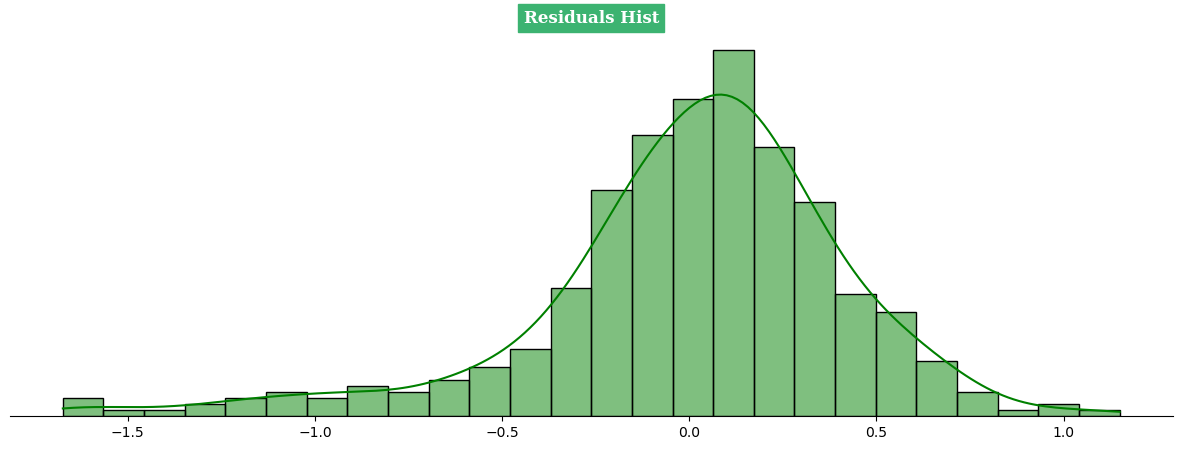

In [53]:
plt.figure(figsize=(15,5))
sns.histplot(residuals, kde= True,color='g')
plt.title('Residuals Hist',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='mediumseagreen',color='w')
sns.despine(left=True)
plt.ylabel("")
plt.yticks([])
plt.show()

<Figure size 1500x500 with 0 Axes>

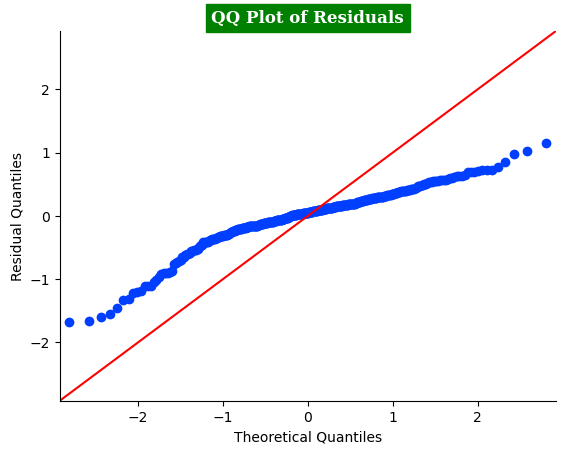

In [54]:
# QQ-Plot of residuals
plt.figure(figsize=(15,5))
sm.qqplot(residuals,line='45')
plt.title('QQ Plot of Residuals',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.ylabel('Residual Quantiles')
sns.despine()
plt.show();

### JARQUE BERA test:

In [55]:
jb_stat, jb_p_value = stats.jarque_bera(residuals)


print("Jarque-Bera Test Statistic:", jb_stat)
print("p-value:", jb_p_value)

if jb_p_value < 0.05:
    print("Reject the null hypothesis: Residuals are not normally distributed.")
else:
    print("Fail to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera Test Statistic: 190.09887364276878
p-value: 5.2547744604325314e-42
Reject the null hypothesis: Residuals are not normally distributed.


#### 🏷️Insights:

- From the Histplot & kdeplot , we can see that the Residuals are `left skewed` and not perfectly normally distributed. 

- The QQ plot shows that residuals are slightly deviating from the straight diagonal , thus not `Gaussian`.

- From Jarque Bera test , we conclude that the Residuals are `Not Normally distributed`.

> Hence this assumption is not met.

### what to do if assumptions are not met in linear regression ?

If the assumptions of linear regression are not met, it can lead to biased or inefficient estimates. Here’s how to address each issue when specific assumptions are violated:

---

### 1. **Violation of Linearity**
   - **Problem**: The relationship between predictors and the dependent variable is not linear.
   - **Solutions**:
     - Transform the dependent or independent variables (e.g., logarithmic, square root).
     - Add polynomial or interaction terms to the model.
     - Use a more flexible model like decision trees, random forests, or neural networks.

---

### 2. **Violation of Independence (Autocorrelation)**
   - **Problem**: Residuals are correlated, often in time-series data.
   - **Detection**:
     - Use the Durbin-Watson test.
   - **Solutions**:
     - Add lagged variables or use differencing.
     - Use time-series models like ARIMA or state-space models.
     - Consider mixed-effects or hierarchical models for panel data.

---

### 3. **Violation of Homoscedasticity**
   - **Problem**: Variance of residuals is not constant (heteroscedasticity).
   - **Detection**:
     - Breusch-Pagan or Goldfeld-Quandt test.
     - Residuals vs. fitted values plot.
   - **Solutions**:
     - Transform the dependent variable (e.g., log, square root).
     - Use weighted least squares (WLS).
     - Use robust standard errors (e.g., Huber-White estimators).

---

### 4. **Violation of Normality of Residuals**
   - **Problem**: Residuals are not normally distributed (can affect hypothesis tests).
   - **Detection**:
     - Shapiro-Wilk test, Anderson-Darling test, or Q-Q plot.
   - **Solutions**:
     - Transform the dependent variable (e.g., log, square root).
     - Use non-parametric methods if normality cannot be achieved.
     - Note: Normality is less critical with large sample sizes due to the Central Limit Theorem.

---

### 5. **Violation of No Multicollinearity**
   - **Problem**: Independent variables are highly correlated.
   - **Detection**:
     - Variance Inflation Factor (VIF) > 5 or > 10.
     - High pairwise correlations between predictors.
   - **Solutions**:
     - Remove one of the correlated predictors.
     - Combine correlated variables into a single composite variable.
     - Use regularization techniques like Ridge or Lasso regression.

---

### 6. **Violation of Outlier/Influential Point Assumption**
   - **Problem**: Outliers or high-leverage points unduly influence the model.
   - **Detection**:
     - Cook's Distance, Leverage Plot, or Mahalanobis Distance.
   - **Solutions**:
     - Remove or investigate outliers.
     - Use robust regression (e.g., Huber regression).
     - Transform the data to reduce the impact of outliers.

---

### 7. **Violation of Model Specification**
   - **Problem**: Missing important variables or including irrelevant ones.
   - **Detection**:
     - Residual plots showing unexplained patterns.
     - Comparing models using information criteria (AIC, BIC).
   - **Solutions**:
     - Include omitted variables if justified.
     - Exclude irrelevant variables through feature selection techniques (e.g., forward selection, Lasso).

---

### 8. **Violation of Data Stationarity (Time-Series Only)**
   - **Problem**: Mean, variance, or autocorrelation of the series changes over time.
   - **Detection**:
     - Augmented Dickey-Fuller (ADF) or KPSS test.
   - **Solutions**:
     - Difference the data or transform it to achieve stationarity.
     - Use time-series models like ARIMA, SARIMA, or VAR.

---

### 9. **Violation of Sufficient Sample Size**
   - **Problem**: Too few observations relative to the number of predictors.
   - **Solutions**:
     - Collect more data if possible.
     - Reduce the number of predictors (e.g., feature selection).
     - Use penalized regression (e.g., Ridge or Lasso).

---

### When to Consider Alternative Models:
   - If multiple assumptions are violated and cannot be resolved, consider switching to a different modeling approach:
     - **Generalized Linear Models (GLM)**: For non-linear relationships and non-constant variance.
     - **Tree-Based Models (e.g., Random Forests, Gradient Boosting)**: Non-parametric, robust to non-linear relationships and outliers.
     - **Support Vector Machines or Neural Networks**: For complex relationships.

By addressing these violations appropriately, you can improve the reliability and validity of your regression model.

-----

## 🔖Lasso and Ridge Regression - L1 & L2 Regularization

Ridge and Lasso regression are both regularization techniques used to prevent overfitting in linear regression models. They work by adding a penalty term to the cost function, which helps to control the complexity of the model by shrinking the coefficient values.

**Lasso Regression:**
Lasso regression uses L1 regularization, where the penalty term is the sum of the absolute values of the coefficients multiplied by a regularization parameter (lambda or alpha). Lasso regression has the ability to shrink some coefficients to exactly zero, effectively performing feature selection. This makes Lasso regression useful when dealing with high-dimensional data where only a few variables are relevant.

**Ridge Regression:**
Ridge regression uses L2 regularization, where the penalty term is the squared sum of the coefficients multiplied by a regularization parameter (lambda or alpha). The regularization term helps to reduce the impact of less important features on the model and prevents them from dominating the model. Ridge regression can help in reducing the variance of the model and is particularly useful when dealing with multicollinearity (high correlation between independent variables).

The main differences between Ridge and Lasso regression are:

* Ridge regression tends to shrink all coefficient values towards zero, but it rarely makes them exactly zero. On the other hand, Lasso regression can make coefficient values exactly zero, performing variable selection.
* Ridge regression is suitable when dealing with multicollinearity, as it will shrink correlated variables together. Lasso regression, however, can select one variable from a set of highly correlated variables and make the others zero.

Yes, you can use `LassoCV` (cross-validated Lasso) to automatically find the optimal `alpha` (regularization strength) without manually defining a search grid. Here's how to do it:

---

### **Using LassoCV**
The `LassoCV` class in `scikit-learn` performs cross-validation internally and identifies the best `alpha` by evaluating performance across multiple folds.

---

### **Code Implementation**
```python
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# --- LassoCV for Optimal Alpha ---
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 4, 100),  # Range of alpha values
    cv=5,  # 5-fold cross-validation
    max_iter=10000,
    random_state=42
)

# Fit LassoCV on training data
lasso_cv.fit(x_train_scaled, y_train)

# Get the optimal alpha
optimal_alpha_lassocv = lasso_cv.alpha_
print(f"Optimal alpha for Lasso (LassoCV): {optimal_alpha_lassocv}")

# Evaluate the model on the test data
y_pred_lassocv = lasso_cv.predict(x_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred_lassocv)
r2 = r2_score(y_test, y_pred_lassocv)
print(f"Test MSE: {mse}")
print(f"Test R2 Score: {r2}")
```

---

### **Key Points**
1. **`alphas`**:
   - You can define a range of alpha values to search.
   - `np.logspace(-4, 4, 100)` covers a wide range from `0.0001` to `10000`.

2. **`cv=5`**:
   - The cross-validation splits the data into 5 folds for evaluation.

3. **Optimal Alpha**:
   - `lasso_cv.alpha_` gives the alpha value that minimizes the mean squared error across the folds.

4. **Performance on Test Data**:
   - The fitted model (`lasso_cv`) is used to predict `y_test`, and metrics like MSE and \( R^2 \) are calculated.

---

### **Advantages of LassoCV**
- Automated and efficient alpha selection.
- Removes the need for `GridSearchCV` or `RandomizedSearchCV` explicitly.
- Directly returns the optimal model with the best regularization strength.

Let me know if you need to adapt this for Ridge or have further questions!

In [163]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score

# --- LassoCV for Optimal Alpha ---
lasso_cv = LassoCV(
    alphas=np.logspace(-4, 4, 100),  # Range of alpha values
    cv=5,  # 5-fold cross-validation
    max_iter=10000,
    random_state=42
)

# Fit LassoCV on training data
lasso_cv.fit(x_train_scaled, y_train)

# Get the optimal alpha
optimal_alpha_lassocv = lasso_cv.alpha_
print(f"Optimal alpha for Lasso (LassoCV): {optimal_alpha_lassocv}")

# Evaluate the model on the test data
y_pred_lassocv = lasso_cv.predict(x_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred_lassocv)
r2 = r2_score(y_test, y_pred_lassocv)
print(f"Test MSE: {mse}")
print(f"Test R2 Score: {r2}")


Optimal alpha for Lasso (LassoCV): 0.0006428073117284319
Test MSE: 0.003699643146432953
Test R2 Score: 0.8190883546976552


In [164]:
model_lasso = Lasso(alpha=0.0006428073117284319)
model_lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.0006428073117284319)

#### ***reason for (alpha) ... try giving just lasso()... Weights are all zero.. inorder to manipulate that we introduce an alpha...***
In Lasso regression, the alpha parameter (λ) controls the strength of regularization. It's typically written as a positive value greater than 0. The choice of alpha affects the amount of shrinkage applied to the coefficients. 

You would specify the alpha value when initializing the Lasso regression model. Typically, you would experiment with different alpha values to find the one that best balances model complexity and performance on your dataset through techniques like cross-validation. 

For example, if you're using scikit-learn in Python, you would set the alpha parameter when creating the Lasso regression model object, like this:

```python
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=λ)
```

Here, `alpha` is set to 0.1, but you can adjust it based on your experimentation and validation results. Lower values of alpha result in less regularization, potentially leading to overfitting, while higher values increase regularization, potentially improving generalization to unseen data.


Below is the Python code to find the optimal `alpha` (regularization strength) for **Lasso** and **Ridge Regression** using **GridSearchCV**, **RandomizedSearchCV**, and **AIC/BIC**. 

The code uses `x_test_scaled` for testing after finding the optimal alpha from the training set.

---

### **Code Implementation**
```python
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Define alpha range
alpha_range = np.logspace(-4, 4, 50)  # Small to large values of alpha

# --- LASSO with GridSearchCV ---
lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(
    lasso, 
    param_grid={"alpha": alpha_range}, 
    scoring="neg_mean_squared_error", 
    cv=5
)
grid_lasso.fit(x_train_scaled, y_train)

# Optimal alpha for Lasso
optimal_alpha_lasso = grid_lasso.best_params_['alpha']
print(f"Optimal alpha for Lasso (GridSearchCV): {optimal_alpha_lasso}")

# --- RIDGE with GridSearchCV ---
ridge = Ridge()
grid_ridge = GridSearchCV(
    ridge, 
    param_grid={"alpha": alpha_range}, 
    scoring="neg_mean_squared_error", 
    cv=5
)
grid_ridge.fit(x_train_scaled, y_train)

# Optimal alpha for Ridge
optimal_alpha_ridge = grid_ridge.best_params_['alpha']
print(f"Optimal alpha for Ridge (GridSearchCV): {optimal_alpha_ridge}")

# --- RandomizedSearchCV ---
random_lasso = RandomizedSearchCV(
    lasso, 
    param_distributions={"alpha": alpha_range}, 
    n_iter=20, 
    scoring="neg_mean_squared_error", 
    cv=5, 
    random_state=42
)
random_lasso.fit(x_train_scaled, y_train)
optimal_alpha_lasso_random = random_lasso.best_params_['alpha']
print(f"Optimal alpha for Lasso (RandomizedSearchCV): {optimal_alpha_lasso_random}")

random_ridge = RandomizedSearchCV(
    ridge, 
    param_distributions={"alpha": alpha_range}, 
    n_iter=20, 
    scoring="neg_mean_squared_error", 
    cv=5, 
    random_state=42
)
random_ridge.fit(x_train_scaled, y_train)
optimal_alpha_ridge_random = random_ridge.best_params_['alpha']
print(f"Optimal alpha for Ridge (RandomizedSearchCV): {optimal_alpha_ridge_random}")

# --- AIC / BIC Method ---
def calculate_aic_bic(model, x, y):
    # Fit the model
    model.fit(x, y)
    predictions = model.predict(x)
    residual_sum_of_squares = mean_squared_error(y, predictions) * len(y)
    n, p = x.shape  # Number of samples, number of predictors
    aic = n * np.log(residual_sum_of_squares / n) + 2 * p
    bic = n * np.log(residual_sum_of_squares / n) + p * np.log(n)
    return aic, bic

# Calculate AIC / BIC for Lasso
aic_lasso, bic_lasso = calculate_aic_bic(Lasso(alpha=optimal_alpha_lasso), x_test_scaled, y_test)
print(f"AIC for Lasso: {aic_lasso}, BIC for Lasso: {bic_lasso}")

# Calculate AIC / BIC for Ridge
aic_ridge, bic_ridge = calculate_aic_bic(Ridge(alpha=optimal_alpha_ridge), x_test_scaled, y_test)
print(f"AIC for Ridge: {aic_ridge}, BIC for Ridge: {bic_ridge}")

# --- Final Testing with Optimal Alphas ---
lasso_final = Lasso(alpha=optimal_alpha_lasso)
lasso_final.fit(x_train_scaled, y_train)
lasso_test_score = lasso_final.score(x_test_scaled, y_test)
print(f"Lasso Test Score with optimal alpha: {lasso_test_score}")

ridge_final = Ridge(alpha=optimal_alpha_ridge)
ridge_final.fit(x_train_scaled, y_train)
ridge_test_score = ridge_final.score(x_test_scaled, y_test)
print(f"Ridge Test Score with optimal alpha: {ridge_test_score}")
```

---

### **Explanation of the Steps**
1. **`GridSearchCV`**:
   - It evaluates multiple alpha values by exhaustive search over the range defined in `alpha_range`.
   - The cross-validation scoring is set to `neg_mean_squared_error`.

2. **`RandomizedSearchCV`**:
   - Similar to `GridSearchCV`, but it randomly samples `n_iter` combinations of alpha values, which is faster for large ranges.

3. **AIC and BIC**:
   - Used for model comparison and selection:
     - **AIC**: Accounts for goodness-of-fit while penalizing model complexity.
     - **BIC**: Similar to AIC but with a stronger penalty for models with more parameters.

4. **Testing on `x_test_scaled`**:
   - After determining the optimal alpha, the Lasso and Ridge models are trained on the training data and tested on the test data.

---

### **Output**
The script will print:
- Optimal alpha values for Lasso and Ridge found using `GridSearchCV` and `RandomizedSearchCV`.
- AIC and BIC for both models.
- Test scores on the test dataset for Lasso and Ridge models with optimal alphas.

In [165]:
model_ridge = Ridge()
model_ridge.fit(x_train_scaled, y_train)

Ridge()

In [166]:
y_pred_train_ridge = model_ridge.predict(x_train_scaled)
y_pred_test_ridge = model_ridge.predict(x_test_scaled)

y_pred_train_lasso = model_lasso.predict(x_train_scaled)
y_pred_test_lasso = model_lasso.predict(x_test_scaled)

In [167]:
lasso_model_weights = pd.DataFrame(model_lasso.coef_.reshape(1,-1),columns=df.columns[:-2])
lasso_model_weights["Intercept"] = model_lasso.intercept_
lasso_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.026627,0.018028,0.002816,0.001662,0.01556,0.067683,0.011569,0.724175


In [168]:
ridge_model_weights = pd.DataFrame(model_ridge.coef_.reshape(1,-1),columns=df.columns[:-2])
ridge_model_weights["Intercept"] = model_ridge.intercept_
ridge_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.026789,0.018355,0.003046,0.001937,0.015893,0.067011,0.011949,0.724175


In [169]:
print('Linear Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train, lr_model,x_train_scaled)
print('*'*25)
print('\nLinear Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test, lr_model,x_train_scaled)
print('---'*25)
print('\nRidge Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_ridge, model_ridge,x_train_scaled)
print('*'*25)
print('\n\nRidge Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_ridge, model_ridge,x_train_scaled)
print('---'*25)
print('\n\nLasso Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_lasso, model_lasso,x_train_scaled)
print('*'*25)
print('\n\nLasso Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_lasso, model_lasso,x_train_scaled)
print('---'*25)

Linear Regression Training Accuracy

Model: LinearRegression()
R2 Score: 0.8210671369321554
Adjusted R2 Score: 0.8178719072345153
Mean Absolute Error: 0.04253334061164314
Mean Squared Error: 0.003526555478455758
Root Mean Squared Error: 0.05938480848210052

*************************

Linear Regression Test Accuracy

Model: LinearRegression()
R2 Score: 0.8188432567829628
Adjusted R2 Score: 0.8050595915381882
Mean Absolute Error: 0.04272265427705369
Mean Squared Error: 0.0037046553987884127
Root Mean Squared Error: 0.060865880415783134

---------------------------------------------------------------------------

Ridge Regression Training Accuracy

Model: Ridge()
R2 Score: 0.8210631423824621
Adjusted R2 Score: 0.8178678413535776
Mean Absolute Error: 0.04252918493215779
Mean Squared Error: 0.0035266342063141453
Root Mean Squared Error: 0.05938547134033833

*************************


Ridge Regression Test Accuracy

Model: Ridge()
R2 Score: 0.8187885396675396
Adjusted R2 Score: 0.8050007111

### 📣observation:

* While Linear Regression and Ridge regression have similar scores, Lasso regression has not performed well on both training and test data

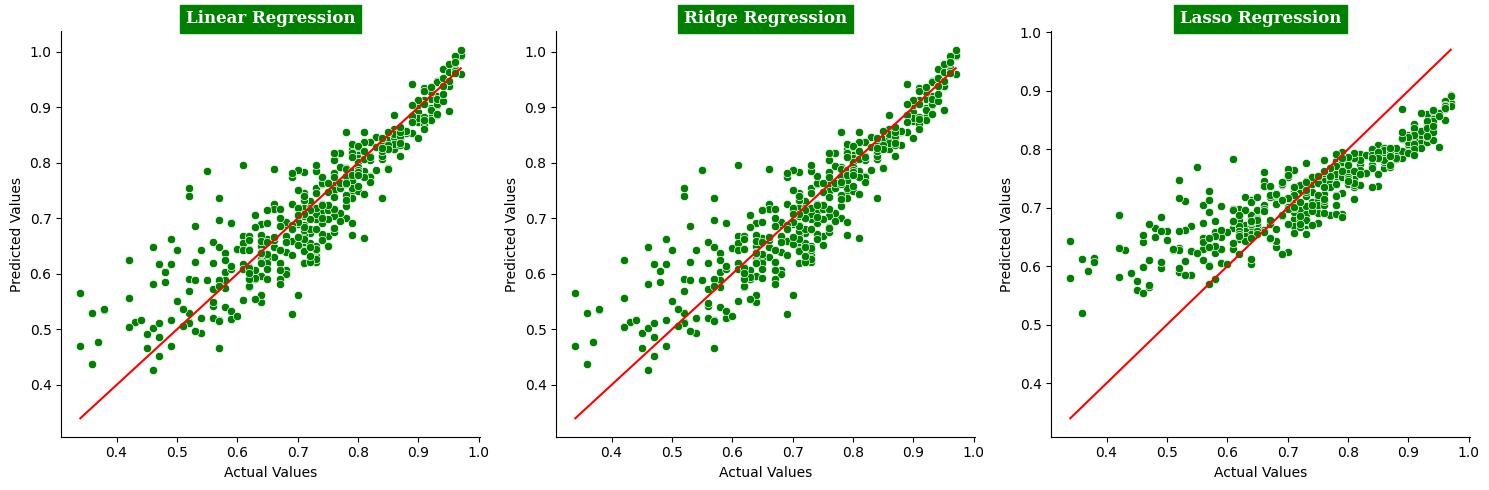

In [162]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), y_pred_train_lasso.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
plt.figure(figsize=(15,5))
i=1
for preds in predicted_values:
    plt.subplot(1,3,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

#### 🏷️Insights:
- We can observe that both `Linear Regression` and `Ridge Regression` have similar accuracy while Lasso regression has oversimplified the model.

- This is the reason that the r2 score of Lasso regression is 0. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.
----

In [170]:
import numpy as np
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Define alpha range
alpha_range = np.logspace(-4, 4, 50)  # Small to large values of alpha

# --- LASSO with GridSearchCV ---
lasso = Lasso(max_iter=10000)
grid_lasso = GridSearchCV(
    lasso, 
    param_grid={"alpha": alpha_range}, 
    scoring="neg_mean_squared_error", 
    cv=5
)
grid_lasso.fit(x_train_scaled, y_train)

# Optimal alpha for Lasso
optimal_alpha_lasso = grid_lasso.best_params_['alpha']
print(f"Optimal alpha for Lasso (GridSearchCV): {optimal_alpha_lasso}")

# --- RIDGE with GridSearchCV ---
ridge = Ridge()
grid_ridge = GridSearchCV(
    ridge, 
    param_grid={"alpha": alpha_range}, 
    scoring="neg_mean_squared_error", 
    cv=5
)
grid_ridge.fit(x_train_scaled, y_train)

# Optimal alpha for Ridge
optimal_alpha_ridge = grid_ridge.best_params_['alpha']
print(f"Optimal alpha for Ridge (GridSearchCV): {optimal_alpha_ridge}")

# --- RandomizedSearchCV ---
random_lasso = RandomizedSearchCV(
    lasso, 
    param_distributions={"alpha": alpha_range}, 
    n_iter=20, 
    scoring="neg_mean_squared_error", 
    cv=5, 
    random_state=42
)
random_lasso.fit(x_train_scaled, y_train)
optimal_alpha_lasso_random = random_lasso.best_params_['alpha']
print(f"Optimal alpha for Lasso (RandomizedSearchCV): {optimal_alpha_lasso_random}")

random_ridge = RandomizedSearchCV(
    ridge, 
    param_distributions={"alpha": alpha_range}, 
    n_iter=20, 
    scoring="neg_mean_squared_error", 
    cv=5, 
    random_state=42
)
random_ridge.fit(x_train_scaled, y_train)
optimal_alpha_ridge_random = random_ridge.best_params_['alpha']
print(f"Optimal alpha for Ridge (RandomizedSearchCV): {optimal_alpha_ridge_random}")

# --- AIC / BIC Method ---
def calculate_aic_bic(model, x, y):
    # Fit the model
    model.fit(x, y)
    predictions = model.predict(x)
    residual_sum_of_squares = mean_squared_error(y, predictions) * len(y)
    n, p = x.shape  # Number of samples, number of predictors
    aic = n * np.log(residual_sum_of_squares / n) + 2 * p
    bic = n * np.log(residual_sum_of_squares / n) + p * np.log(n)
    return aic, bic

# Calculate AIC / BIC for Lasso
aic_lasso, bic_lasso = calculate_aic_bic(Lasso(alpha=optimal_alpha_lasso), x_test_scaled, y_test)
print(f"AIC for Lasso: {aic_lasso}, BIC for Lasso: {bic_lasso}")

# Calculate AIC / BIC for Ridge
aic_ridge, bic_ridge = calculate_aic_bic(Ridge(alpha=optimal_alpha_ridge), x_test_scaled, y_test)
print(f"AIC for Ridge: {aic_ridge}, BIC for Ridge: {bic_ridge}")

# --- Final Testing with Optimal Alphas ---
lasso_final = Lasso(alpha=optimal_alpha_lasso)
lasso_final.fit(x_train_scaled, y_train)
lasso_test_score = lasso_final.score(x_test_scaled, y_test)
print(f"Lasso Test Score with optimal alpha: {lasso_test_score}")

ridge_final = Ridge(alpha=optimal_alpha_ridge)
ridge_final.fit(x_train_scaled, y_train)
ridge_test_score = ridge_final.score(x_test_scaled, y_test)
print(f"Ridge Test Score with optimal alpha: {ridge_test_score}")


Optimal alpha for Lasso (GridSearchCV): 0.0006551285568595509
Optimal alpha for Ridge (GridSearchCV): 7.9060432109076855
Optimal alpha for Lasso (RandomizedSearchCV): 0.0009540954763499944
Optimal alpha for Ridge (RandomizedSearchCV): 7.9060432109076855
AIC for Lasso: -559.9228040547732, BIC for Lasso: -541.6866127528566
AIC for Ridge: -557.121661655162, BIC for Ridge: -538.8854703532454
Lasso Test Score with optimal alpha: 0.8190919958171965
Ridge Test Score with optimal alpha: 0.8184006548991732


### 🔖ElasticNet regression:

Elastic Net regression is a type of regression analysis that combines penalties from both Lasso (L1 regularization) and Ridge (L2 regularization) methods. It is particularly useful when dealing with datasets that have high dimensionality and multicollinearity (correlation between predictors).

Here's how Elastic Net works:

1. **Objective Function**: In Elastic Net regression, the objective function includes two components: the residual sum of squares (RSS), which measures the difference between the observed and predicted values, and two penalty terms: one for L1 regularization and one for L2 regularization.

2. **L1 Regularization (Lasso)**: The L1 penalty encourages sparsity in the coefficient estimates by adding the absolute values of the coefficients to the objective function. This tends to force some coefficients to be exactly zero, effectively performing feature selection.

3. **L2 Regularization (Ridge)**: The L2 penalty adds the squared values of the coefficients to the objective function. This tends to shrink the coefficients towards zero, but it does not enforce sparsity as strongly as L1 regularization.

4. **Mixing Parameter (α)**: Elastic Net introduces a mixing parameter, α (alpha), which controls the balance between L1 and L2 regularization. When α = 0, Elastic Net reduces to Ridge regression, and when α = 1, it reduces to Lasso regression. Intermediate values of α allow for a combination of both penalties.

5. **Regularization Strength (λ)**: Additionally, Elastic Net includes a regularization strength parameter, λ (lambda), which controls the overall strength of regularization. Higher values of λ result in stronger regularization, leading to more shrinkage of coefficients.

Benefits of Elastic Net regression include:

- **Feature Selection**: Like Lasso regression, Elastic Net can perform automatic feature selection by setting some coefficients to zero.
- **Handling Multicollinearity**: Like Ridge regression, Elastic Net can handle multicollinearity by shrinking the coefficients of correlated predictors.
- **Flexibility**: The mixing parameter α allows for a flexible trade-off between L1 and L2 regularization, offering more control over the type of regularization applied.

However, Elastic Net also has some drawbacks, such as the need to tune hyperparameters like α and λ, and it may be computationally more expensive compared to simpler regression methods.

Overall, Elastic Net regression is a powerful technique for regression analysis, especially in situations where there are many predictors with potentially correlated features. It strikes a balance between the strengths of Lasso and Ridge regression, offering flexibility and improved performance in certain scenarios.

***we have to find alpha... find the value such that loss is minimum***
Finding the optimal alpha value for ElasticNet regression typically involves techniques like cross-validation. Here's a general approach to finding the optimal alpha value:

1. **Define a Range of Alpha Values:** Start by defining a range of alpha values to search over. This range should cover a broad spectrum of possibilities, from very small values (close to 0) to larger values.

2. **Cross-Validation:** Use k-fold cross-validation to evaluate the performance of the ElasticNet regression model for each alpha value in the defined range. For each fold, train the model on the training data and evaluate its performance on the validation data.

3. **Select the Best Alpha:** Choose the alpha value that results in the best performance metric on the validation set. This metric could be mean squared error (MSE), mean absolute error (MAE), R-squared, or another appropriate metric depending on your specific problem.

4. **Final Model:** Once you have selected the best alpha value using cross-validation, retrain the ElasticNet regression model using the entire training dataset and the chosen alpha value. This will be your final model.

Here's an example of how you can perform cross-validated grid search for alpha value in scikit-learn:

```python
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# Define a range of alpha values to search over
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]

# Create ElasticNet regression model
elastic_net = ElasticNet()

# Define grid search parameters
param_grid = {'alpha': alpha_range}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
```

In this example, `alpha_range` defines the range of alpha values to search over. Grid search is performed with 5-fold cross-validation, and the best alpha value is selected based on the mean squared error (MSE) metric. Adjust the `alpha_range` according to your problem domain and dataset characteristics.

-- same for lasso and ridge as well

> Here i did manual calculations for alpha

Yes, you can use `ElasticNetCV` to find the optimal `alpha` and `l1_ratio` (the balance between Lasso and Ridge regularization) through cross-validation. Here's how you can implement it:

---

### **Using ElasticNetCV**

The `ElasticNetCV` class in `scikit-learn` internally handles cross-validation to find the optimal `alpha` and `l1_ratio`.

---

### **Code Implementation**

```python
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# --- ElasticNetCV for Optimal Alpha and L1 Ratio ---
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 4, 100),  # Range of alpha values
    l1_ratio=np.linspace(0.1, 1.0, 10),  # Range of l1_ratio values
    cv=5,  # 5-fold cross-validation
    max_iter=10000,
    random_state=42
)

# Fit ElasticNetCV on training data
elasticnet_cv.fit(x_train_scaled, y_train)

# Get the optimal alpha and l1_ratio
optimal_alpha_elasticnet = elasticnet_cv.alpha_
optimal_l1_ratio_elasticnet = elasticnet_cv.l1_ratio_
print(f"Optimal alpha for ElasticNet: {optimal_alpha_elasticnet}")
print(f"Optimal l1_ratio for ElasticNet: {optimal_l1_ratio_elasticnet}")

# Evaluate the model on the test data
y_pred_elasticnet = elasticnet_cv.predict(x_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred_elasticnet)
r2 = r2_score(y_test, y_pred_elasticnet)
print(f"Test MSE: {mse}")
print(f"Test R2 Score: {r2}")
```

---

### **Explanation of Parameters**
- **`alphas=np.logspace(-4, 4, 100)`**:
  - Defines a range of `alpha` values to test, from `0.0001` to `10000`.

- **`l1_ratio=np.linspace(0.1, 1.0, 10)`**:
  - Determines the balance between Lasso (`1.0`) and Ridge (`0.0`) regularization.
  - Values closer to `1.0` emphasize Lasso, while lower values include Ridge-like behavior.

- **Cross-Validation (`cv=5`)**:
  - Uses 5-fold cross-validation to find the best combination of `alpha` and `l1_ratio`.

---

### **Key Results**
- **Optimal Alpha**:
  - `elasticnet_cv.alpha_` provides the optimal regularization strength.
  
- **Optimal L1 Ratio**:
  - `elasticnet_cv.l1_ratio_` provides the best L1/L2 balance.

- **Model Performance**:
  - `mean_squared_error` and \( R^2 \) score on the test set evaluate the performance of the model.

---

### **Advantages of ElasticNetCV**
- Automatically selects the best hyperparameters (`alpha` and `l1_ratio`).
- Combines the strengths of Lasso and Ridge, making it suitable for datasets with high multicollinearity or sparse features.
- Avoids manual tuning with `GridSearchCV` or `RandomizedSearchCV`.

Let me know if you want to explore further or need additional help!

In [171]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# --- ElasticNetCV for Optimal Alpha and L1 Ratio ---
elasticnet_cv = ElasticNetCV(
    alphas=np.logspace(-4, 4, 100),  # Range of alpha values
    l1_ratio=np.linspace(0.1, 1.0, 10),  # Range of l1_ratio values
    cv=5,  # 5-fold cross-validation
    max_iter=10000,
    random_state=42
)

# Fit ElasticNetCV on training data
elasticnet_cv.fit(x_train_scaled, y_train)

# Get the optimal alpha and l1_ratio
optimal_alpha_elasticnet = elasticnet_cv.alpha_
optimal_l1_ratio_elasticnet = elasticnet_cv.l1_ratio_
print(f"Optimal alpha for ElasticNet: {optimal_alpha_elasticnet}")
print(f"Optimal l1_ratio for ElasticNet: {optimal_l1_ratio_elasticnet}")

# Evaluate the model on the test data
y_pred_elasticnet = elasticnet_cv.predict(x_test_scaled)

# Metrics
mse = mean_squared_error(y_test, y_pred_elasticnet)
r2 = r2_score(y_test, y_pred_elasticnet)
print(f"Test MSE: {mse}")
print(f"Test R2 Score: {r2}")


Optimal alpha for ElasticNet: 0.005994842503189409
Optimal l1_ratio for ElasticNet: 0.1
Test MSE: 0.003702426826259313
Test R2 Score: 0.8189522334347524


In [172]:
# ElasticNet_model = ElasticNet(alpha=0.108)
# ElasticNet_model.fit(x_train , y_train)
ElasticNet_model = ElasticNet(alpha=0.108)
ElasticNet_model.fit(x_train_scaled , y_train)

ElasticNet(alpha=0.108)

In [173]:
y_pred_train_en = ElasticNet_model.predict(x_train_scaled)
y_pred_test_en = ElasticNet_model.predict(x_test_scaled)

In [174]:
train_R2 = ElasticNet_model.score(x_train_scaled,y_train)
test_R2 = ElasticNet_model.score(x_test_scaled,y_test)
train_R2 , test_R2

(0.6280708236924062, 0.6407043054505854)

In [176]:
en_model_weights = pd.DataFrame(ElasticNet_model.coef_.reshape(1,-1),columns=df.columns[:-2])
en_model_weights["Intercept"] = ElasticNet_model.intercept_
en_model_weights

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.015749,0.002936,0.0,0.0,0.0,0.05119,0.0,0.724175


In [178]:
print('ElasticNet Regression Training Accuracy\n')
model_evaluation(y_train.values, y_pred_train_en, ElasticNet_model,x_train_scaled)
print('*'*25)
print('\nElasticNet Regression Test Accuracy\n')
model_evaluation(y_test.values, y_pred_test_en, ElasticNet_model,x_train_scaled)
print('---'*25)

ElasticNet Regression Training Accuracy

Model: ElasticNet(alpha=0.108)
R2 Score: 0.6280708236924062
Adjusted R2 Score: 0.621429231258342
Mean Absolute Error: 0.06782708585772364
Mean Squared Error: 0.007330284956138895
Root Mean Squared Error: 0.08561708331950403

*************************

ElasticNet Regression Test Accuracy

Model: ElasticNet(alpha=0.108)
R2 Score: 0.6407043054505854
Adjusted R2 Score: 0.6133665895609561
Mean Absolute Error: 0.06684969823240552
Mean Squared Error: 0.007347596953535529
Root Mean Squared Error: 0.0857181250001161

---------------------------------------------------------------------------


#### 💠summarizing the analysis:

- **Optimal Regularization**: Using the best lambda (from cross-validation), the ElasticNet model achieved an R² score of 81%, significantly higher than the 64% score with a random lambda. This highlights the importance of proper penalization for improving model performance.  

- **Effective Combination of Lasso and Ridge**: ElasticNet effectively combines L1 and L2 penalties, making it robust in handling multicollinearity and irrelevant features, leading to better generalization on test data.

- **Hyperparameter Tuning Matters**: Cross-validation ensures the selection of the best \(\alpha\) and \(l1\_ratio\), demonstrating that random selection of hyperparameters often results in suboptimal performance.

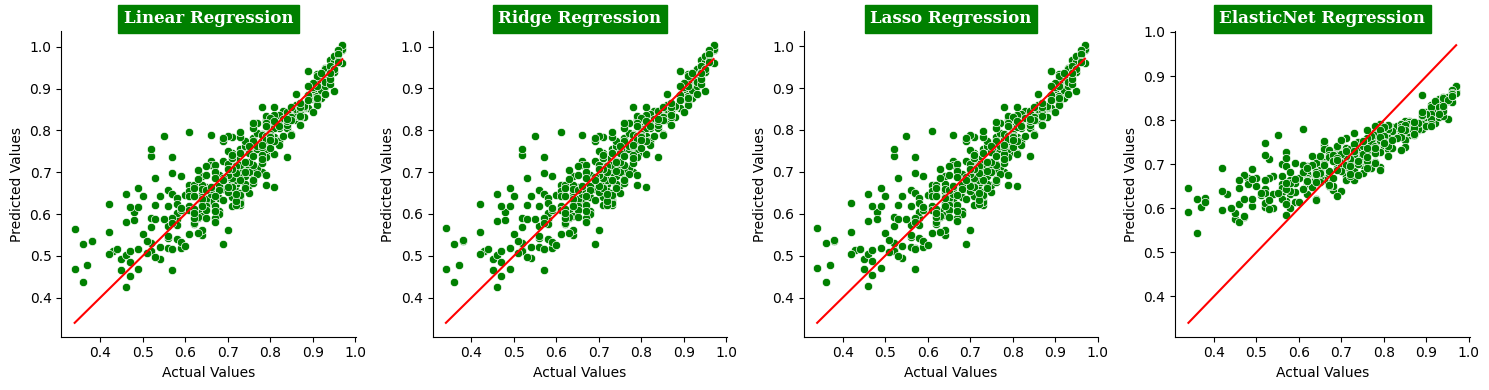

In [182]:
actual_values = y_train.values.reshape((-1,))
predicted_values = [y_pred_train.reshape((-1,)), y_pred_train_ridge.reshape((-1,)), 
                    y_pred_train_lasso.reshape((-1,)),y_pred_train_en.reshape((-1,))]
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression','ElasticNet Regression']
plt.figure(figsize=(15,4))
i=1
for preds in predicted_values:
    plt.subplot(1,4,i)
    sns.scatterplot(x=actual_values, y=preds,color='g')
    plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i-1],fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
plt.tight_layout()
sns.despine()
plt.show();

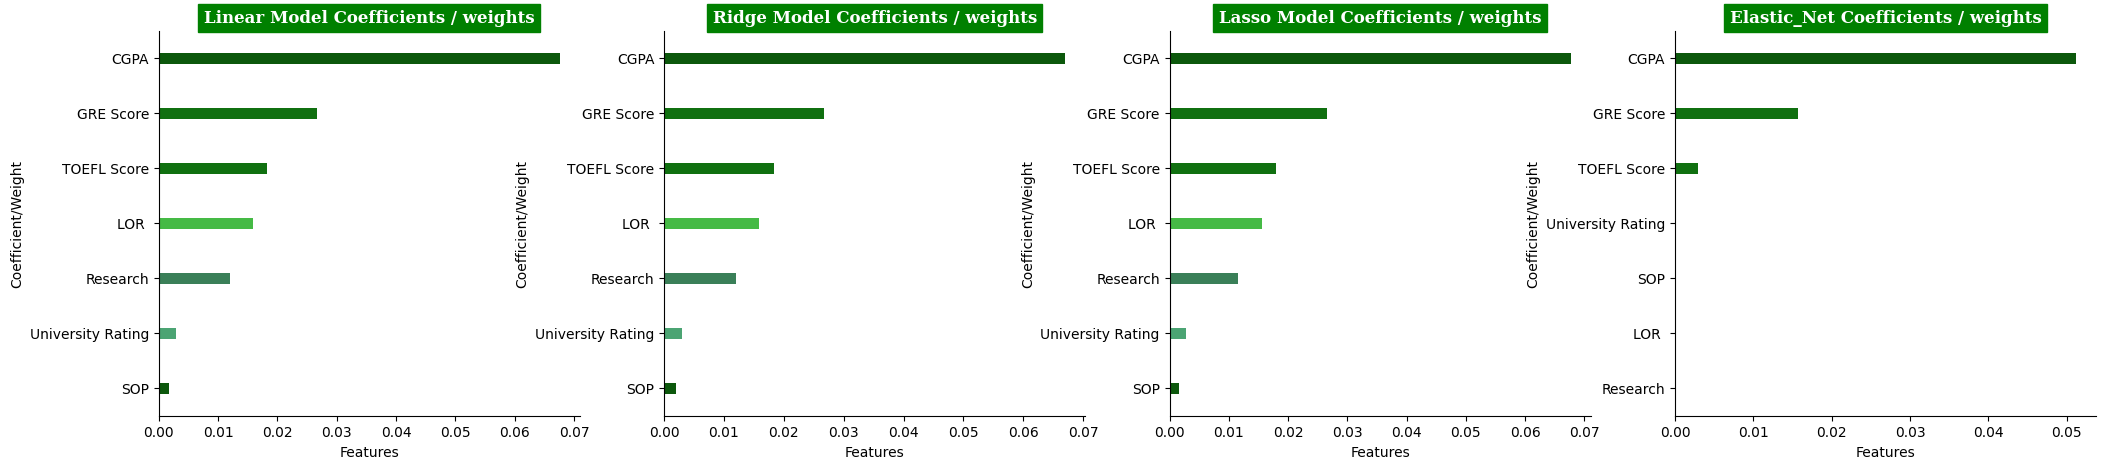

In [180]:
model_major_weights = {"Linear Model":lr_model_weights,
                       "Ridge Model":ridge_model_weights,
                       "Lasso Model":lasso_model_weights,
                       "Elastic_Net":en_model_weights}
# excluding w0-intercept
plt.figure(figsize=(25,5))
i=1
for model,data in model_major_weights.items():
    model_weights_data = data.melt()
    
    plt.subplot(1,4,i)
    sns.barplot(data=model_weights_data[:-1].sort_values(by='value',ascending=False),
                y='variable', x='value',width=0.2,palette=['darkgreen','g','green','limegreen','seagreen','mediumseagreen'])
    plt.xlabel('Features')
    plt.ylabel('Coefficient/Weight')
    plt.title(f'{model} Coefficients / weights',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
    i+=1
sns.despine()
plt.show()

### <font color="green">**Polynomial Regression💹**</font>

In [183]:
# Function for Adj. R2 Score
def adj_r(r_sq,X,Y):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1)) / (len(Y)-X.shape[1]-1))
  return adj_r1

def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y- y.mean())**2)
    score = (1- num/denom)
    return score

In [184]:
# Creating a pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degrees = 4
train_scores = []
test_scores = []

train_loss = []
test_loss = []

for degree in range(1, degrees):
    # Putting the classes like PolynomialFeatures(), StandardScaler(), LinearRegression() into a pipeline
    polyreg_scaled = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())
    polyreg_scaled.fit(x_train_scaled, y_train)

    # Calculate R2 Score for train and test data
    train_score = polyreg_scaled.score(x_train_scaled, y_train) # R2 TRAIN
    test_score = polyreg_scaled.score(x_test_scaled, y_test) # R2 TEST

    # Calculate Adj. R2 Score for train and test data
    train_scores.append(adj_r(train_score,x_train_scaled,y_train))
    test_scores.append(adj_r(test_score,x_test_scaled,y_test))

    # Calculate the y_pred for train and test data
    output1 = polyreg_scaled.predict(x_train_scaled)
    output2 = polyreg_scaled.predict(x_test_scaled)

    # Calculate the MSE for train and test data
    train_loss.append(mean_squared_error(y_train,output1)) # MSE train
    test_loss.append(mean_squared_error(y_test,output2)) # MSE test

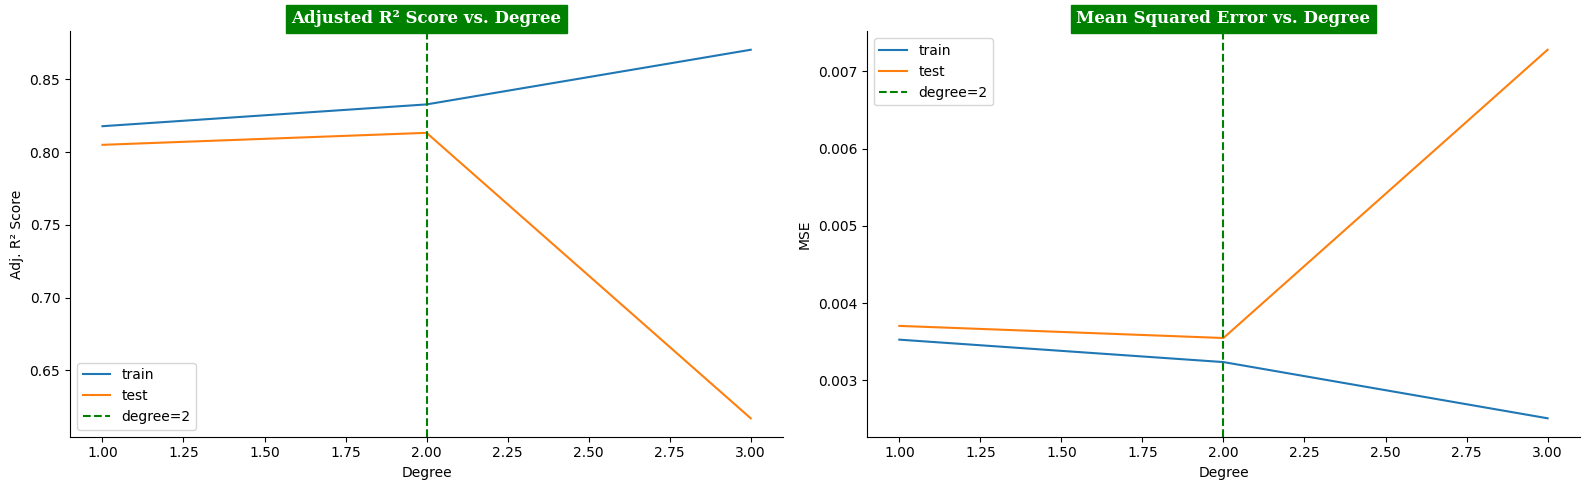

In [191]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot Adjusted R-scores
axes[0].plot(list(range(1, degrees)), train_scores, label="train")
axes[0].plot(list(range(1, degrees)), test_scores, label="test")
axes[0].axvline(x=2, color='g', linestyle='--', label="degree=2")
axes[0].legend(loc='lower left')
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Adj. R² Score")
axes[0].set_title("Adjusted R² Score vs. Degree", fontsize=12, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')

# Plot Mean Squared Errors
axes[1].plot(list(range(1, degrees)), train_loss, label="train")
axes[1].plot(list(range(1, degrees)), test_loss, label="test")
axes[1].axvline(x=2, color='g', linestyle='--', label="degree=2")
axes[1].legend(loc='upper left')
axes[1].set_xlabel("Degree")
axes[1].set_ylabel("MSE")
axes[1].set_title("Mean Squared Error vs. Degree", fontsize=12, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')

sns.despine()
plt.tight_layout()
plt.show()


In [192]:
rate_list = list(range(1, degrees))

In [193]:
# Best degree
index = np.argmax(test_scores)
best_degree = rate_list[index]
best_degree

2

**🔍OBSERVATION🔎**

- As we go in higher Degree, the model test performance drop significantly Which clearly indicates Overfitting
- The Test score is maximum at degree 2, There for the **best polynomial degree is 2**

In [194]:
# Polynomial Regression

# Transform the features into polynomial features
from sklearn.preprocessing import PolynomialFeatures
degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(x_train_scaled)
X_test_poly = poly.transform(x_test_scaled)

In [196]:
# Shape of X_train and X_test
x_train_scaled.shape, x_test_scaled.shape

((400, 7), (100, 7))

In [197]:
# Polynomial features been created
X_train_poly.shape, X_test_poly.shape

((400, 36), (100, 36))

In [198]:
# Standardize the polynomial features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

In [199]:
# Import the required library
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
Polynomial_Reg_model = LinearRegression()

# Train the model
Polynomial_Reg_model.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [200]:
# Predicting values for the test data
y_pred_train_poly = Polynomial_Reg_model.predict(X_train_poly_scaled)
y_pred_test_poly = Polynomial_Reg_model.predict(X_test_poly_scaled)

In [202]:
# Performance of Polynomial Regression
print("Performance of Polynomial Regression")
print("-"*36)
print("Performance of Train data")
print("-"*26)
model_evaluation(y_train, y_pred_train_poly, Polynomial_Reg_model,x_test_scaled)
print()
print("Performance of Test data")
print("-"*26)
model_evaluation(y_test, y_pred_test_poly, Polynomial_Reg_model,x_test_scaled)

Performance of Polynomial Regression
------------------------------------
Performance of Train data
--------------------------
Model: LinearRegression()
R2 Score: 0.8357962945524071
Adjusted R2 Score: 0.8328640855265572
Mean Absolute Error: 0.04004455671536485
Mean Squared Error: 0.003236261171372311
Root Mean Squared Error: 0.0568881461411102


Performance of Test data
--------------------------
Model: LinearRegression()
R2 Score: 0.8265115552643363
Adjusted R2 Score: 0.8133113475127096
Mean Absolute Error: 0.040565639521672796
Mean Squared Error: 0.0035478386948443238
Root Mean Squared Error: 0.05956373640768621



**🔍OBSERVATION🔎**

- Polynomial Regression provides a slight improvement over Linear Regression in terms of training data performance with an R-squared value of 0.84.
- There is slight drop in the Adjusted R-squared value for the test data (0.81), indicating the model fits the data well but also does generalize as well to unseen data.


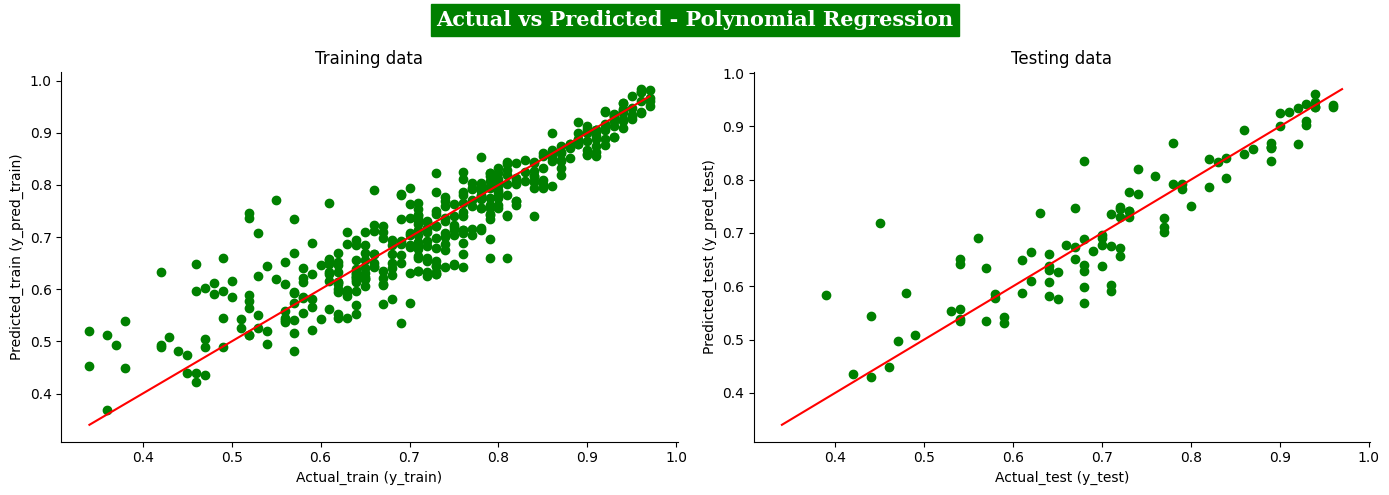

In [229]:
# Actual vs Predicted
plt.figure(figsize=(14, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_poly,color="green")
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_poly, color="green")
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - Polynomial Regression", fontsize = 15, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
sns.despine()
plt.tight_layout()
plt.show()

### <font color="green">**Regularization**</font>

In [208]:
X_train = x_train_scaled
X_test = x_test_scaled

In [216]:
# Hyperparameter Tuning: find the best regularization strength
from sklearn.linear_model import Lasso, Ridge

# To find best lambda
degree = 2 # is best

train_scores = []
test_scores = []

rate_list = np.linspace(0,0.003,50)

for rate in rate_list:

  # Creating pipeline()
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  # Calculate R2 Score for train and test data
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)

  # Calculate Adj. R2 Score for train and test data
  train_scores.append(adj_r(train_score,X_train,y_train))
  test_scores.append(adj_r(test_score,X_test,y_test))


In [212]:
# Best Lambda (or) alpha
index = np.argmax(test_scores)
best_lambda = rate_list[index]
best_lambda

0.0019591836734693877

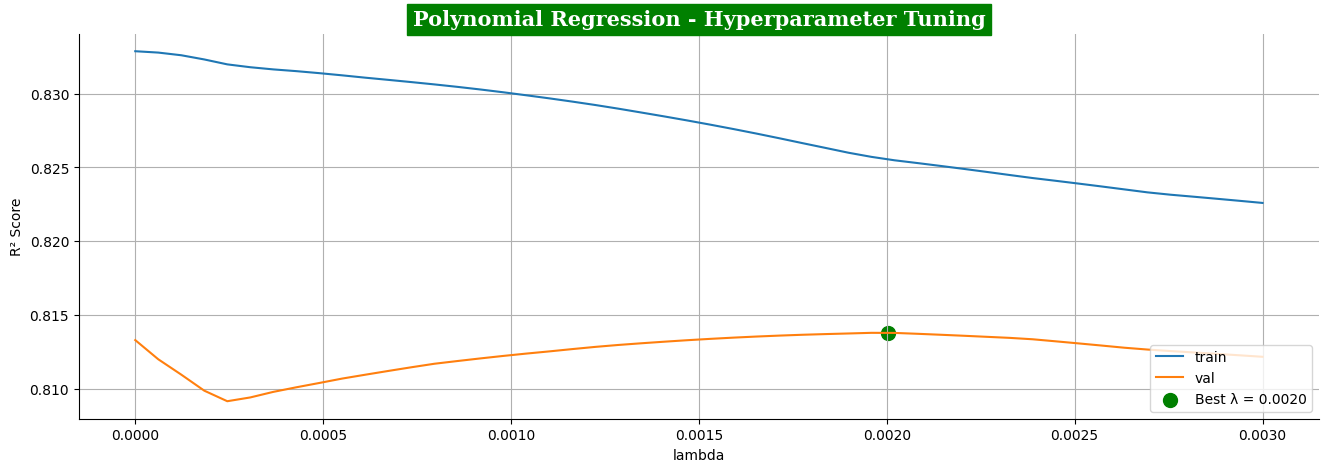

In [225]:
plt.figure(figsize=(16, 5))

# Plot train and test scores
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")

# Scatter plot for the best lambda
plt.scatter(best_lambda + 0.000034, test_scores[index], color='g', s=100, label=f"Best λ = {best_lambda:.4f}")
# plt.annotate(f"Best λ = {best_lambda:.4f}",
#              xy=(best_lambda, test_scores[index]),
#              xytext=(best_lambda + 0.0001, test_scores[index] - 0.02),
#              arrowprops=dict(facecolor='red', arrowstyle='->'),
#              fontsize=12, color='red')

# Styling and labels
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R² Score")
plt.title("Polynomial Regression - Hyperparameter Tuning", 
          fontsize=15, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
plt.grid()
sns.despine()

plt.show()


In [227]:
# Final Lasso model
# degree 2 and lambda :0.0019591836734693877
final_lasso_model_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler(), Lasso(alpha=best_lambda))
final_lasso_model_pipe.fit(X_train, y_train)

# Predicting values for the train and test data
y_pred_train_lasso = final_lasso_model_pipe.predict(X_train)
y_pred_test_lasso = final_lasso_model_pipe.predict(X_test)

# Performance of Lasso Regression
print("Performance of Lasso Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
model_evaluation(y_train, y_pred_train_lasso, final_lasso_model_pipe,x_train_scaled)
print()
print("Performance of Test data")
print("-"*26)
model_evaluation(y_test, y_pred_test_lasso, final_lasso_model_pipe,x_train_scaled)

Performance of Lasso Regression
------------------------------------
Performance of Train data
--------------------------
Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.00197))])
R2 Score: 0.8287249849186963
Adjusted R2 Score: 0.8256665025065302
Mean Absolute Error: 0.0410755405169229
Mean Squared Error: 0.003375628335687816
Root Mean Squared Error: 0.05810015779400101


Performance of Test data
--------------------------
Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.00197))])
R2 Score: 0.8269755282514599
Adjusted R2 Score: 0.8138106227923319
Mean Absolute Error: 0.04109351242203707
Mean Squared Error: 0.003538350447257645
Root Mean Squared Error: 0.059484035230115695



**🔍OBSERVATION🔎**

- Lasso Regression performs similarly to Linear Regression with a slight improvement in the training data R-squared value (0.83).
- The model maintains a consistent Adjusted R-squared value of 0.81 on the test data, suggesting a good balance between model complexity and generalization.



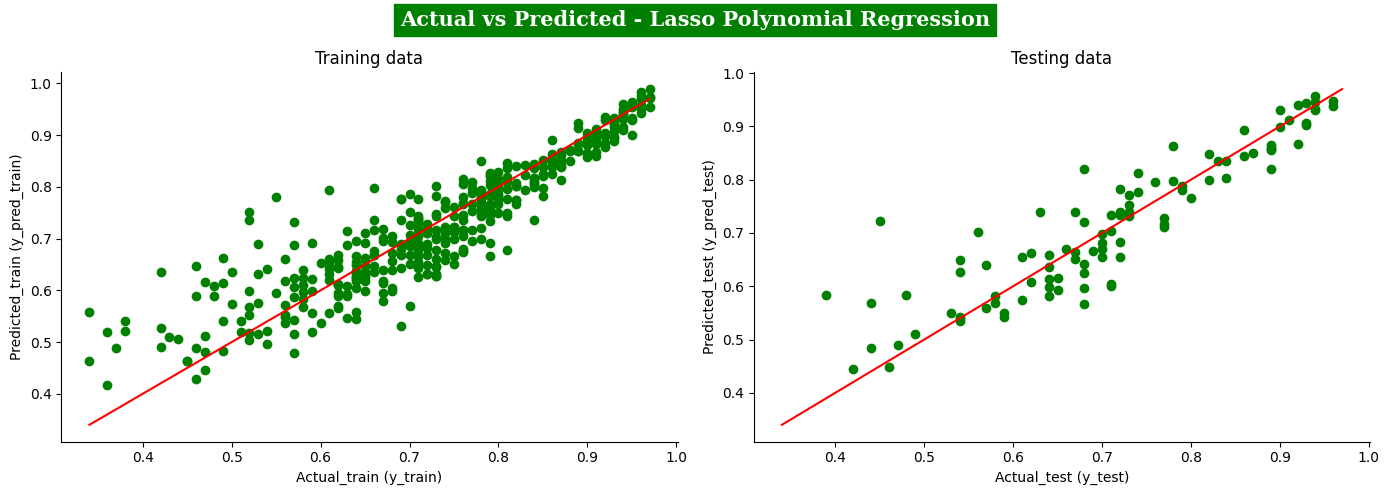

In [233]:
# Actual vs Predicted
plt.figure(figsize=(14, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_lasso,color="g")
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_lasso, color="green")
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - Lasso Polynomial Regression", fontsize = 15, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
sns.despine()
plt.tight_layout()
plt.show()


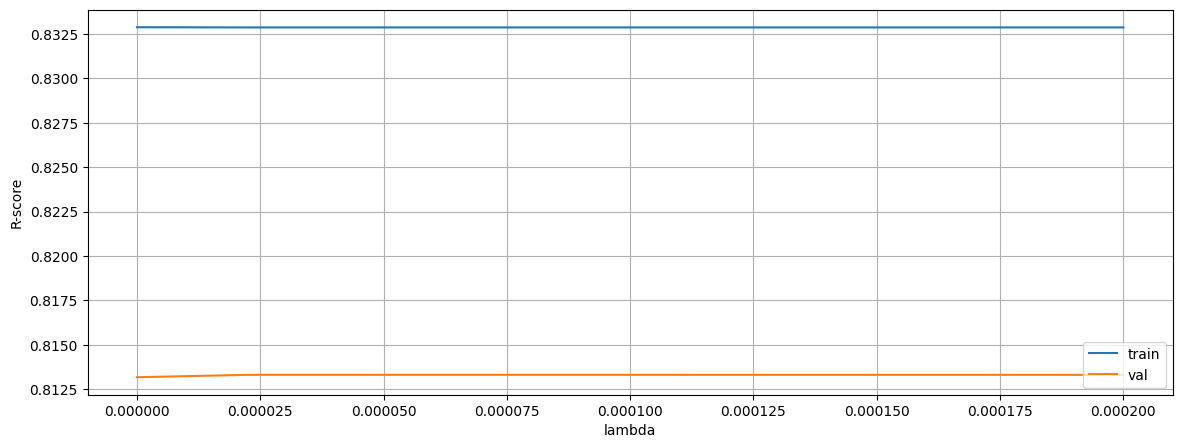

In [234]:
# Hyperparameter Tuning: find the best regularization strength
from sklearn.linear_model import Lasso, Ridge

# To find best lambda
degree = 2 # is best

train_scores = []
test_scores = []

rate_list = np.linspace(0,0.0002,10)

for rate in rate_list:

  # Creating pipeline()
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  # Calculate R2 Score for train and test data
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)

  # Calculate Adj. R2 Score for train and test data
  train_scores.append(adj_r(train_score,X_train,y_train))
  test_scores.append(adj_r(test_score,X_test,y_test))

# Plote
plt.figure(figsize=(14, 5))
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R-score")
plt.grid()
plt.show()

In [235]:
# Best Lambda (or) alpha
index = np.argmax(test_scores)
best_lambda_Ridge = rate_list[index]
best_lambda_Ridge

2.2222222222222223e-05

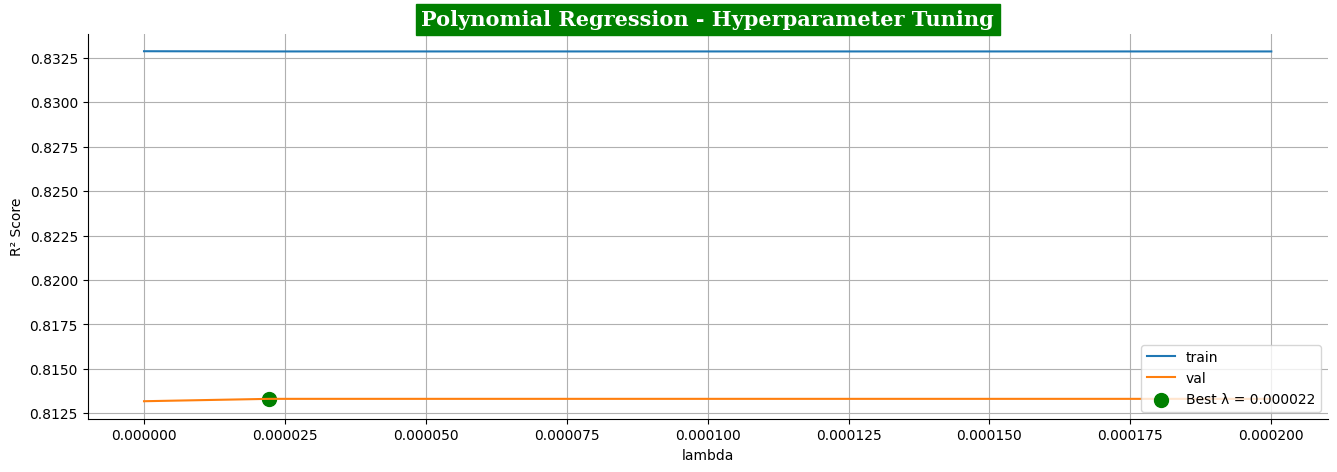

In [238]:
plt.figure(figsize=(16, 5))

# Plot train and test scores
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")

# Scatter plot for the best lambda
plt.scatter(best_lambda_Ridge, test_scores[index], color='g', s=100, label=f"Best λ = {best_lambda_Ridge:.6f}")
# plt.annotate(f"Best λ = {best_lambda:.4f}",
#              xy=(best_lambda, test_scores[index]),
#              xytext=(best_lambda + 0.0001, test_scores[index] - 0.02),
#              arrowprops=dict(facecolor='red', arrowstyle='->'),
#              fontsize=12, color='red')

# Styling and labels
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R² Score")
plt.title("Polynomial Regression - Hyperparameter Tuning", 
          fontsize=15, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
plt.grid()
sns.despine()

plt.show()


In [239]:
# Final Lasso model
# degree: 2 and lambda :2.2222222222222223e-05
final_ridge_model_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=best_lambda_Ridge))
final_ridge_model_pipe.fit(X_train, y_train)

# Predicting values for the train and test data
y_pred_train_ridge = final_ridge_model_pipe.predict(X_train)
y_pred_test_ridge = final_ridge_model_pipe.predict(X_test)

# Performance of Ridge Regression
print("Performance of Ridge Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
model_evaluation(y_train, y_pred_train_ridge, final_ridge_model_pipe,x_train_scaled)
print()
print("Performance of Test data")
print("-"*26)
model_evaluation(y_test, y_pred_test_ridge, final_ridge_model_pipe,x_train_scaled)

Performance of Ridge Regression
------------------------------------
Performance of Train data
--------------------------
Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=2.2222222222222223e-05))])
R2 Score: 0.8357962945523949
Adjusted R2 Score: 0.8328640855265448
Mean Absolute Error: 0.040044556851990355
Mean Squared Error: 0.0032362611713725527
Root Mean Squared Error: 0.056888146141112324


Performance of Test data
--------------------------
Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=2.2222222222222223e-05))])
R2 Score: 0.8265115453992045
Adjusted R2 Score: 0.81331133689697
Mean Absolute Error: 0.04056564180943708
Mean Squared Error: 0.0035478388965862685
Root Mean Squared Error: 0.059563738101182574



**🔍OBSERVATION🔎**
- Ridge Regression shows the best performance in terms of training R-squared (0.84) and maintains a good performance on test data with an Adjusted R-squared of 0.81.
- The model demonstrates good generalization with low MSE, MAE, and RMSE values.

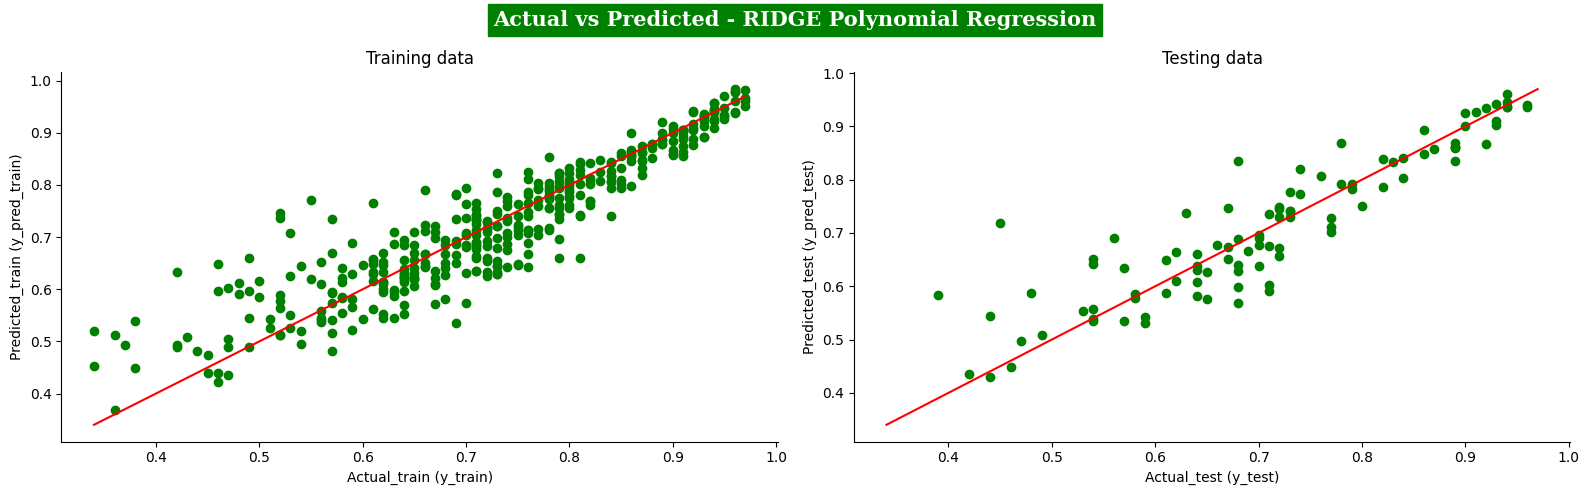

In [240]:
# Actual vs Predicted
plt.figure(figsize=(16, 5))

# Actual vs Predicted Plot
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train_ridge,color="g")
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
plt.xlabel('Actual_train (y_train)')
plt.ylabel('Predicted_train (y_pred_train)')
plt.title('Training data')

# Actual vs Predicted Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_test_ridge, color="green")
plt.plot([np.min(actual_values), np.max(actual_values)], [np.min(actual_values), np.max(actual_values)], 'r-')
plt.xlabel('Actual_test (y_test)')
plt.ylabel('Predicted_test (y_pred_test)')
plt.title('Testing data')

plt.suptitle("Actual vs Predicted - RIDGE Polynomial Regression", fontsize = 15, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
sns.despine()
plt.tight_layout()
plt.show()

best_lambda_ElasticNet : 0.004


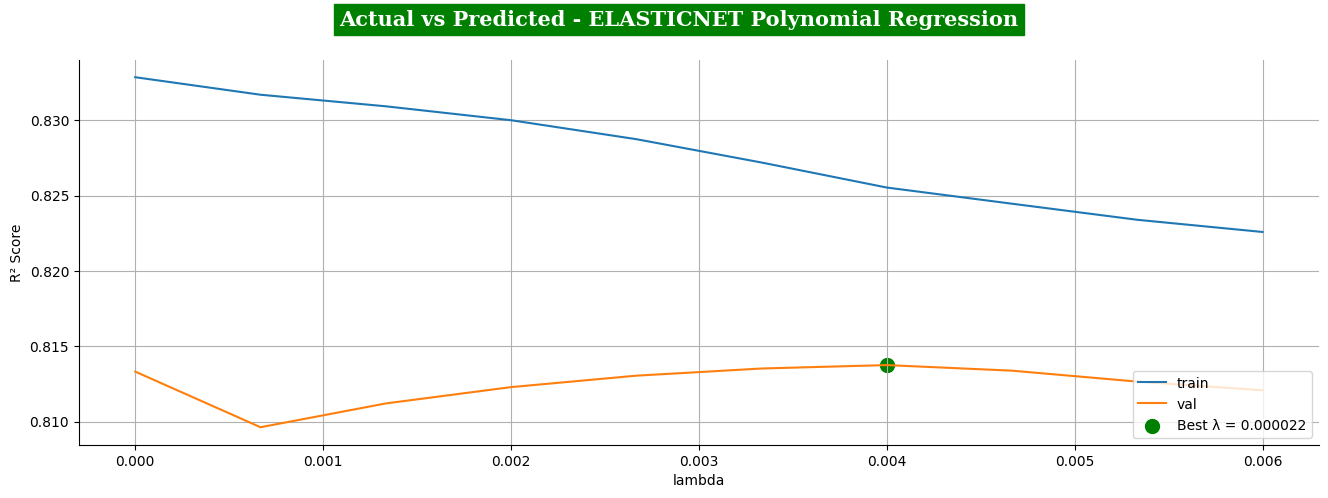

In [242]:
# Hyperparameter Tuning: find the best regularization strength
from sklearn.linear_model import ElasticNet

# To find best lambda
degree = 2 # is best

train_scores = []
test_scores = []

rate_list = np.linspace(0,0.006,10)

for rate in rate_list:

  # Creating pipeline()
  polyreg_scaled = make_pipeline(PolynomialFeatures(2), StandardScaler(), ElasticNet(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)

  # Calculate R2 Score for train and test data
  train_score = polyreg_scaled.score(X_train, y_train)
  test_score = polyreg_scaled.score(X_test, y_test)

  # Calculate Adj. R2 Score for train and test data
  train_scores.append(adj_r(train_score,X_train,y_train))
  test_scores.append(adj_r(test_score,X_test,y_test))
  
  # Best Lambda (or) alpha
index = np.argmax(test_scores)
best_lambda_ElasticNet = rate_list[index]
print(f"best_lambda_ElasticNet : {best_lambda_ElasticNet}")


plt.figure(figsize=(16, 5))

# Plot train and test scores
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, test_scores, label="val")

# Scatter plot for the best lambda
plt.scatter(best_lambda_ElasticNet, test_scores[index], color='g', s=100, label=f"Best λ = {best_lambda_Ridge:.6f}")
# plt.annotate(f"Best λ = {best_lambda:.4f}",
#              xy=(best_lambda, test_scores[index]),
#              xytext=(best_lambda + 0.0001, test_scores[index] - 0.02),
#              arrowprops=dict(facecolor='red', arrowstyle='->'),
#              fontsize=12, color='red')

# Styling and labels
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("R² Score")
plt.suptitle("Actual vs Predicted - ELASTICNET Polynomial Regression", fontsize = 15, fontfamily='serif', fontweight='bold', backgroundcolor='g', color='w')
plt.grid()
sns.despine()

plt.show()


In [243]:
# Final ElasticNet model
# degree: 2 and lambda :0.004
final_ElasticNet_model_pipe = make_pipeline(PolynomialFeatures(2), StandardScaler(), Ridge(alpha=best_lambda_ElasticNet))
final_ElasticNet_model_pipe.fit(X_train, y_train)

# Predicting values for the train and test data
y_pred_train_ElasticNet = final_ElasticNet_model_pipe.predict(X_train)
y_pred_test_ElasticNet = final_ElasticNet_model_pipe.predict(X_test)

# Performance of ElasticNet Regression
print("Performance of ElasticNet Regression")
print("-"*36)
# Metrix for train and test data
print("Performance of Train data")
print("-"*26)
model_evaluation(y_train, y_pred_train_ElasticNet, final_ElasticNet_model_pipe,x_test_scaled)
print()
print("Performance of Test data")
print("-"*26)
model_evaluation(y_test, y_pred_test_ElasticNet, final_ElasticNet_model_pipe,x_test_scaled)

Performance of ElasticNet Regression
------------------------------------
Performance of Train data
--------------------------
Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.004))])
R2 Score: 0.8357962941552433
Adjusted R2 Score: 0.8328640851223011
Mean Absolute Error: 0.04004458129901899
Mean Squared Error: 0.003236261179199942
Root Mean Squared Error: 0.05688814620990863


Performance of Test data
--------------------------
Model: Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.004))])
R2 Score: 0.8265097796419723
Adjusted R2 Score: 0.8133094367886441
Mean Absolute Error: 0.040566051216521404
Mean Squared Error: 0.0035478750063216687
Root Mean Squared Error: 0.05956404121885677



**🔍OBSERVATION🔎**
- ElasticNet Regression also performs well with the highest training R-squared (0.83) and a consistent Adjusted R-squared (0.81) on the test data.
- The performance metrics are similar to Ridge Regression, indicating a strong balance between bias and variance.

### **Lasso Regression, Ridge Regression and ElasticNet Regression** are recommended for their strong performance and balance between model complexity and generalization. All models have demonstrated consistent metrics across training and test data, indicating their robustness for predicting the chance of admission. bcuz we have done the Hyperparameter tuning at it best using all the possible way and found the best lambda & alpha values.

## 🤔 ***suggestion - since data is very small can use K-fold cross validation for better efficiency &  Also consider ADJ R2 score for all polynomial Regression as it make more sense when it comes to additional feature Importance. Similarly could have tried RFE (Recursive feature elimination).***

## 🤔💭📣<span style="color:seagreen"><strong>Regression Analysis Summary:</strong></span>📣💭🤔

> * Upon conducting regression analysis, it's evident that CGPA emerges as the most influential feature in predicting admission chances.

> * Additionally, GRE and TOEFL scores also exhibit significant importance in the predictive model.

> * Following the initial regression model, a thorough check for multicollinearity was performed, revealing VIF scores consistently below 5, indicative of low multicollinearity among predictors.

> * Despite the absence of high multicollinearity, it's noteworthy that the residuals do not conform perfectly to a normal distribution. Furthermore, the residual plots indicate some level of heteroscedasticity.

> * Subsequent exploration involving regularized models such as Ridge and Lasso regression showcased comparable results to the Linear Regression Model.

> * Moreover, employing ElasticNet (L1+L2) regression yielded results consistent with the other regression models, further reinforcing the predictive capabilities of the features under consideration.

## ✴️⚡<span style="color:mediumseagreen"><strong>Business Insights & Recommendations</strong></span>⚡✴️

### <span style="color:seagreen"><strong>Insights:</strong></span>

> <span style="color:lawngreen"><strong>Model Predictors:</strong></span>   
- Our analysis identified several key predictors strongly correlated with admission chances. Notably, **GRE score, TOEFL score, and CGPA** emerged as significant factors influencing admission probabilities.

> <span style="color:lawngreen"><strong>Multicollinearity Check:</strong></span>  
- Assessing multicollinearity revealed no significant issues, indicating the robustness of our model despite high correlations among predictors.

> <span style="color:lawngreen"><strong>Model Performance:</strong></span> 
- Both Linear Regression and Ridge Regression models exhibited promising performance, capturing up to 82% of the variance in admission probabilities.

> <span style="color:lawngreen"><strong>Data Distribution:</strong></span> 
- Exploratory data analysis uncovered left-skewed distributions in admission probabilities and strong positive correlations between exam scores and admission chances.


### <span style="color:seagreen"><strong>Recommendations:</strong></span>

> <span style="color:lawngreen"><strong>Feature Enhancement:</strong></span> 
- Encourage students to focus on improving GRE scores, CGPA, and the quality of Letters of Recommendation (LOR), as these factors significantly influence admission chances.

> <span style="color:lawngreen"><strong>Data Augmentation:</strong></span> 
- Collect a wider range of data beyond academic metrics to capture applicants' holistic profiles, including extracurricular achievements, personal statements, and diversity factors.


> <span style="color:lawngreen"><strong>Additional Features:</strong></span> 
- Given the strong correlation among CGPA, we can enrich the predictive model with additional diverse features such as Research, work experience, internships, or extracurricular activities.


By implementing these recommendations, we can further enhance our admissions process, providing valuable insights and support to both applicants and educational institutions.

-----

<h2 align='center'>Analysed by : <font color='green'><b> KASI</b></font></h2>